In [1]:
import gemma_utils
import simple_acdc
import importlib

model, _ = gemma_utils.load_gemma_model()

/Users/andrewgomes/Documents/LLMConstructions/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All required packages imported successfully!
Loading Gemma 2 model and tokenizer...


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 51.89it/s]


Loaded pretrained model google/gemma-2-2b into HookedTransformer
✅ Model and tokenizer loaded successfully!


In [24]:
importlib.reload(gemma_utils)
importlib.reload(simple_acdc)

All required packages imported successfully!


<module 'simple_acdc' from '/Users/andrewgomes/Documents/LLMConstructions/simple_acdc.py'>

# Kicked the Bucket

In [21]:
original_text = "He kicked the bucket"
min_token_pos = 2
target_text="He died"
print(f"Original text tokens: {gemma_utils.detokenize(model, original_text)}")
print(f"Token at position {min_token_pos}: '{gemma_utils.detokenize(model, original_text)[min_token_pos]}'")

_ = gemma_utils.find_similar_tokens_by_embedding(model, ' kicked', top_k=50)
_ = gemma_utils.find_similar_tokens_by_embedding(model, ' bucket', top_k=50)

Original text tokens: ['<bos>', 'He', ' kicked', ' the', ' bucket']
Token at position 2: ' kicked'
Target token: ' kicked' (ID: 38621)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 50 tokens most similar to ' kicked':
------------------------------------------------------------
 1. Token ID  38621: ' kicked' (similarity: 1.0000)
 2. Token ID  47971: ' kicks' (similarity: 0.7766)
 3. Token ID  57692: ' kicking' (similarity: 0.7603)
 4. Token ID  12656: ' kick' (similarity: 0.7388)
 5. Token ID  41926: 'kick' (similarity: 0.7089)
 6. Token ID  43486: ' Kick' (similarity: 0.6677)
 7. Token ID 231188: ' KICK' (similarity: 0.6665)
 8. Token ID  59477: 'Kick' (similarity: 0.6664)
 9. Token ID 201584: 'kicks' (similarity: 0.5935)
10. Token ID 197837: ' Kicks' (similarity: 0.5630)
11. Token ID 186808: ' booted' (similarity: 0.5117)
12. Token ID 165613: ' kickoff' (similarity: 0.5108)
13. Token ID 229633: 'キック' (similarity: 0.4933)
14. Token 

Analyzing similarities to target sentence: 'He died'
Comparing 7 sentences across layers...


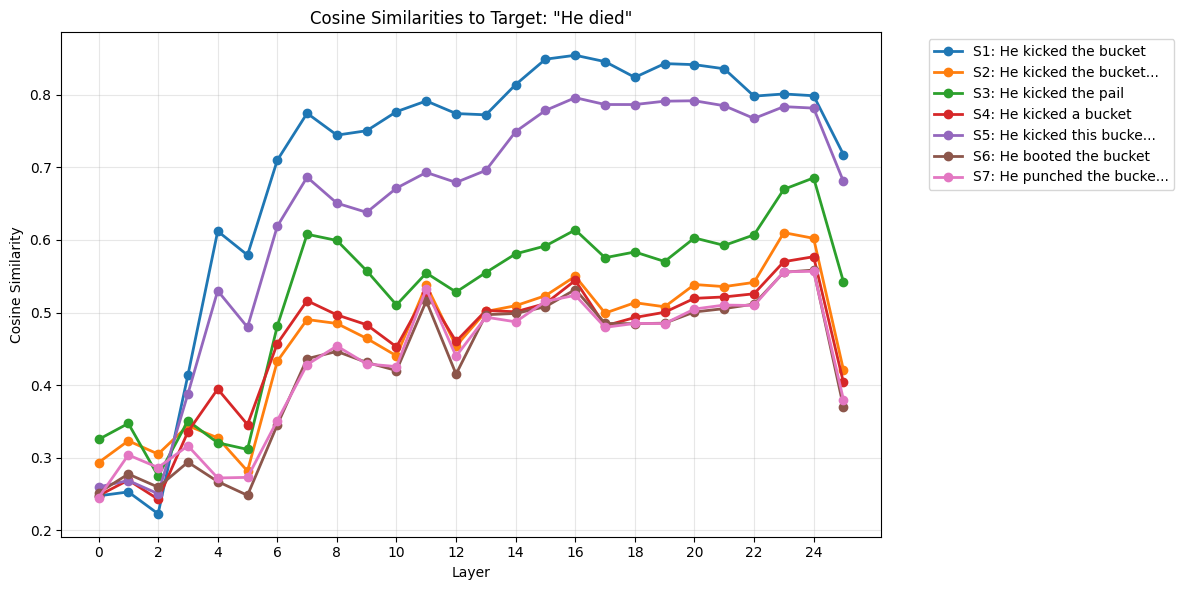

In [22]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["He kicked the bucket", "He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", "He booted the bucket", "He punched the bucket"],
                                     target_sentence=target_text)

In [23]:
max_layer = 4
corrupted_texts = ["He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", "He booted the bucket", "He punched the bucket"]

Threshold Sweep: 100%|██████████| 40/40 [02:40<00:00,  4.02s/it]


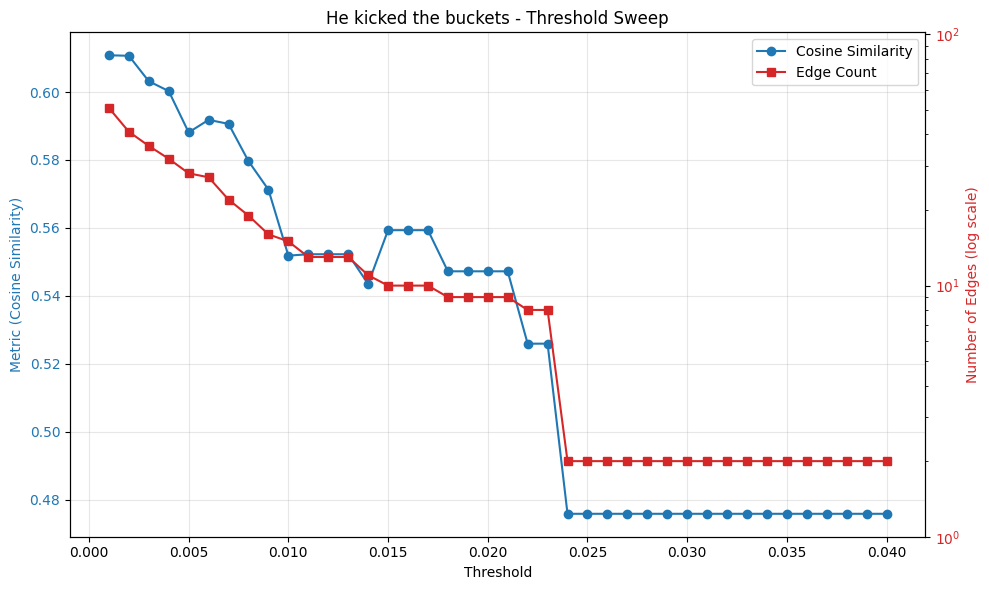

Threshold Sweep: 100%|██████████| 40/40 [02:29<00:00,  3.75s/it]


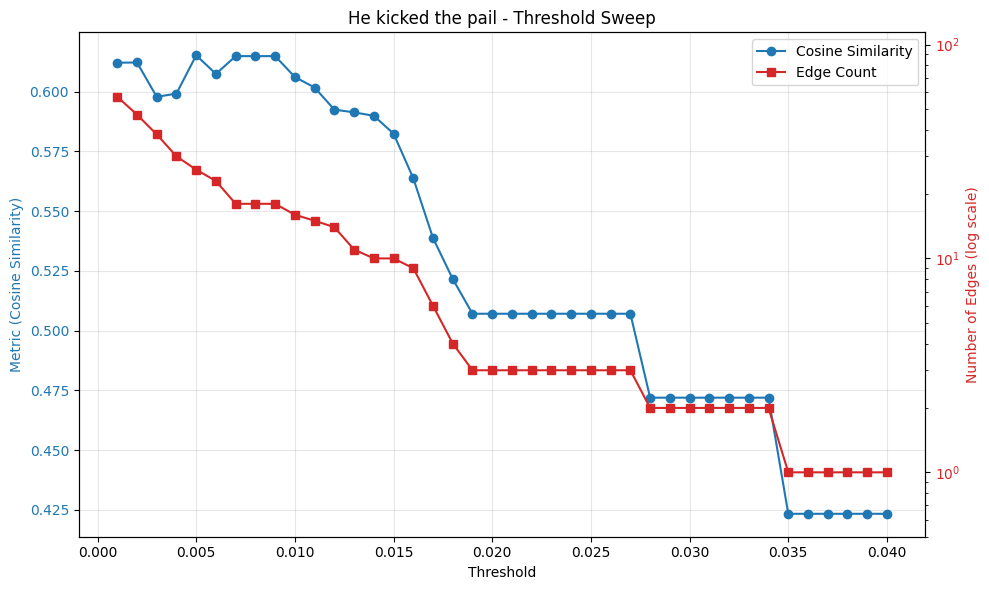

Threshold Sweep: 100%|██████████| 40/40 [03:15<00:00,  4.89s/it]


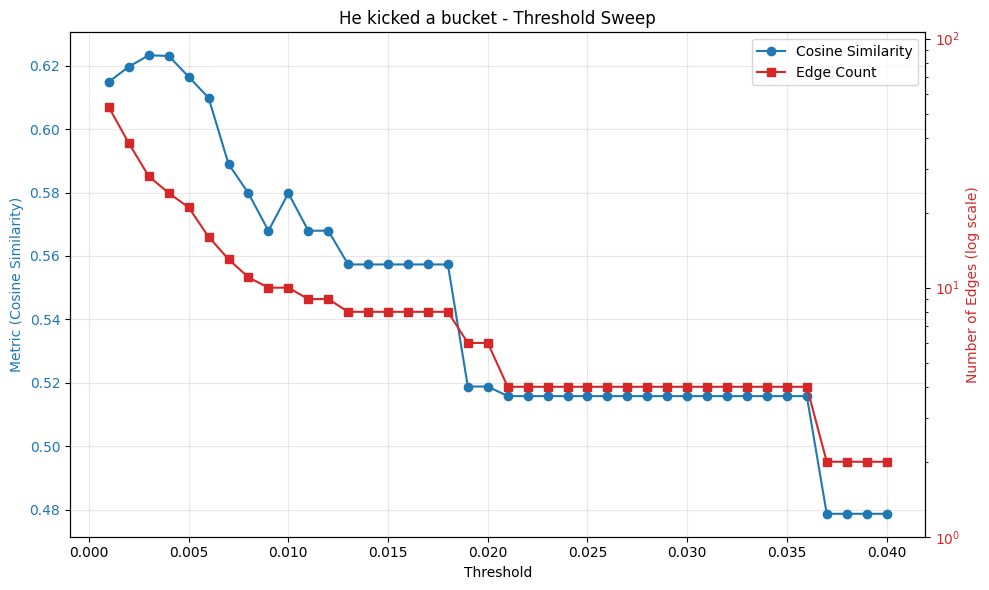

Threshold Sweep: 100%|██████████| 40/40 [02:20<00:00,  3.51s/it]


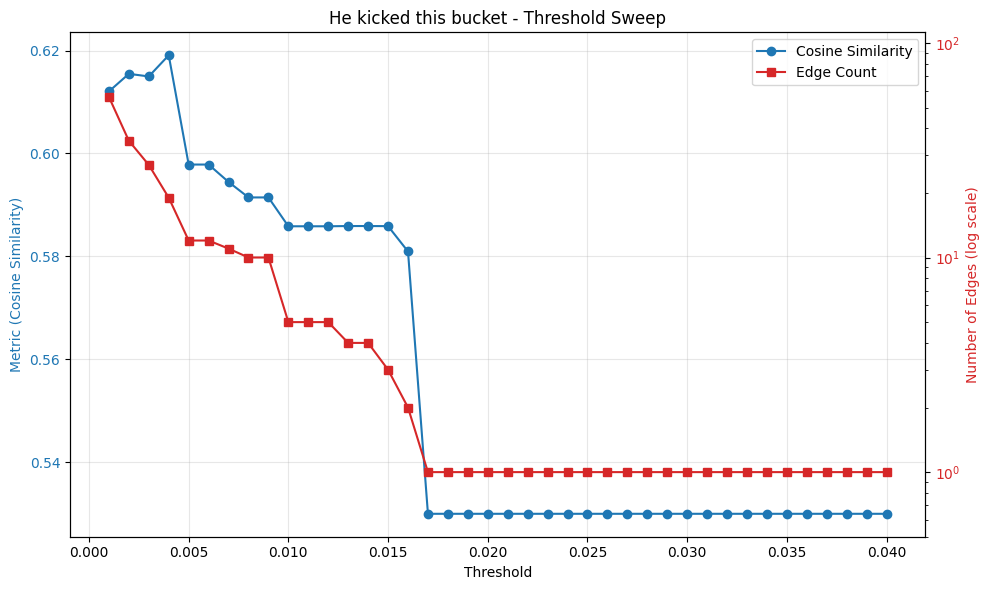

Threshold Sweep: 100%|██████████| 40/40 [04:10<00:00,  6.25s/it]


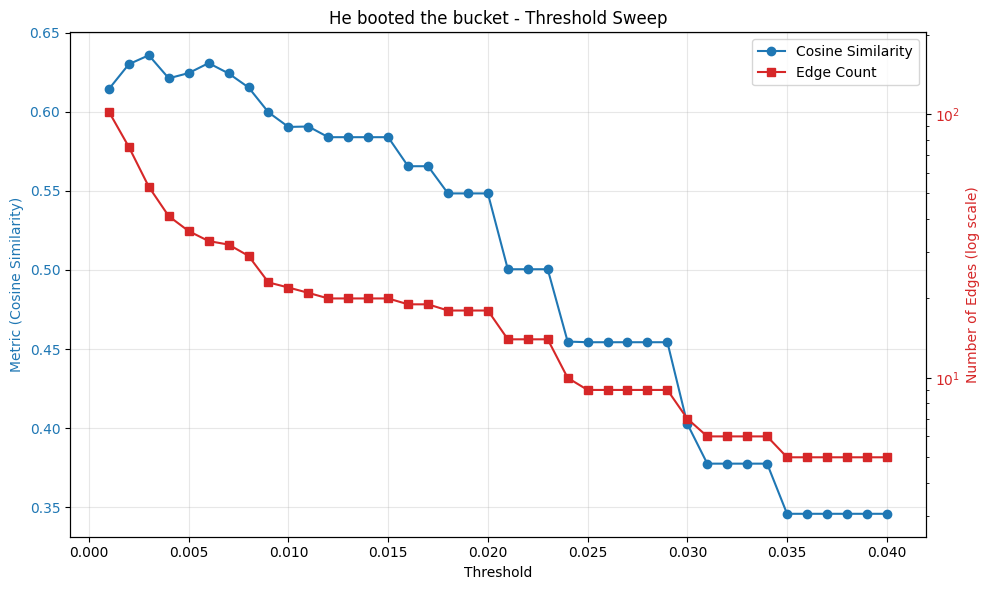

Threshold Sweep: 100%|██████████| 40/40 [04:35<00:00,  6.88s/it]


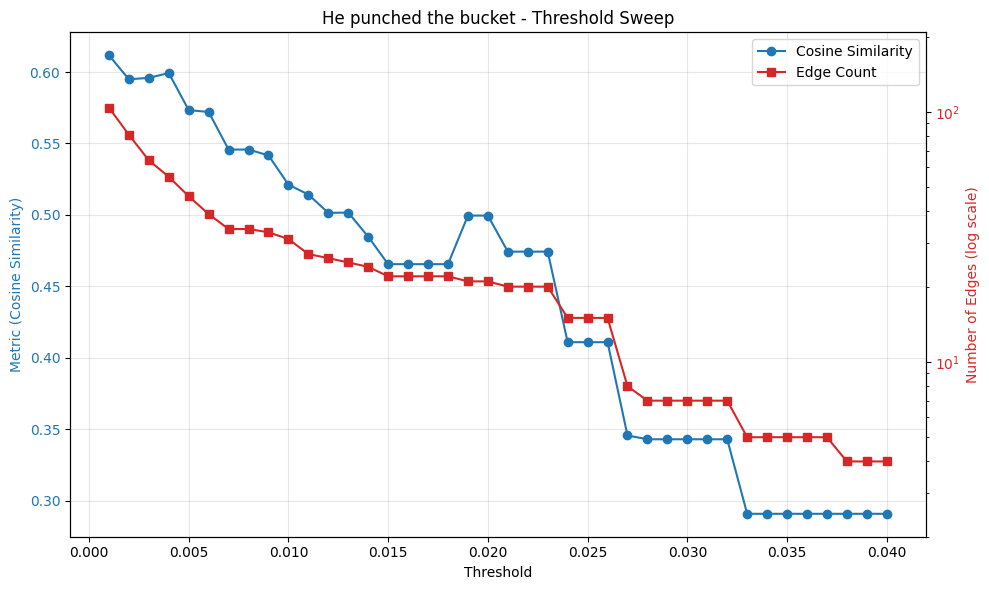

In [25]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=max_layer,
                                      original_text=original_text,
                                      corrupted_texts=corrupted_texts,
                                      target_text=target_text,
                                      min_token_pos=min_token_pos,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

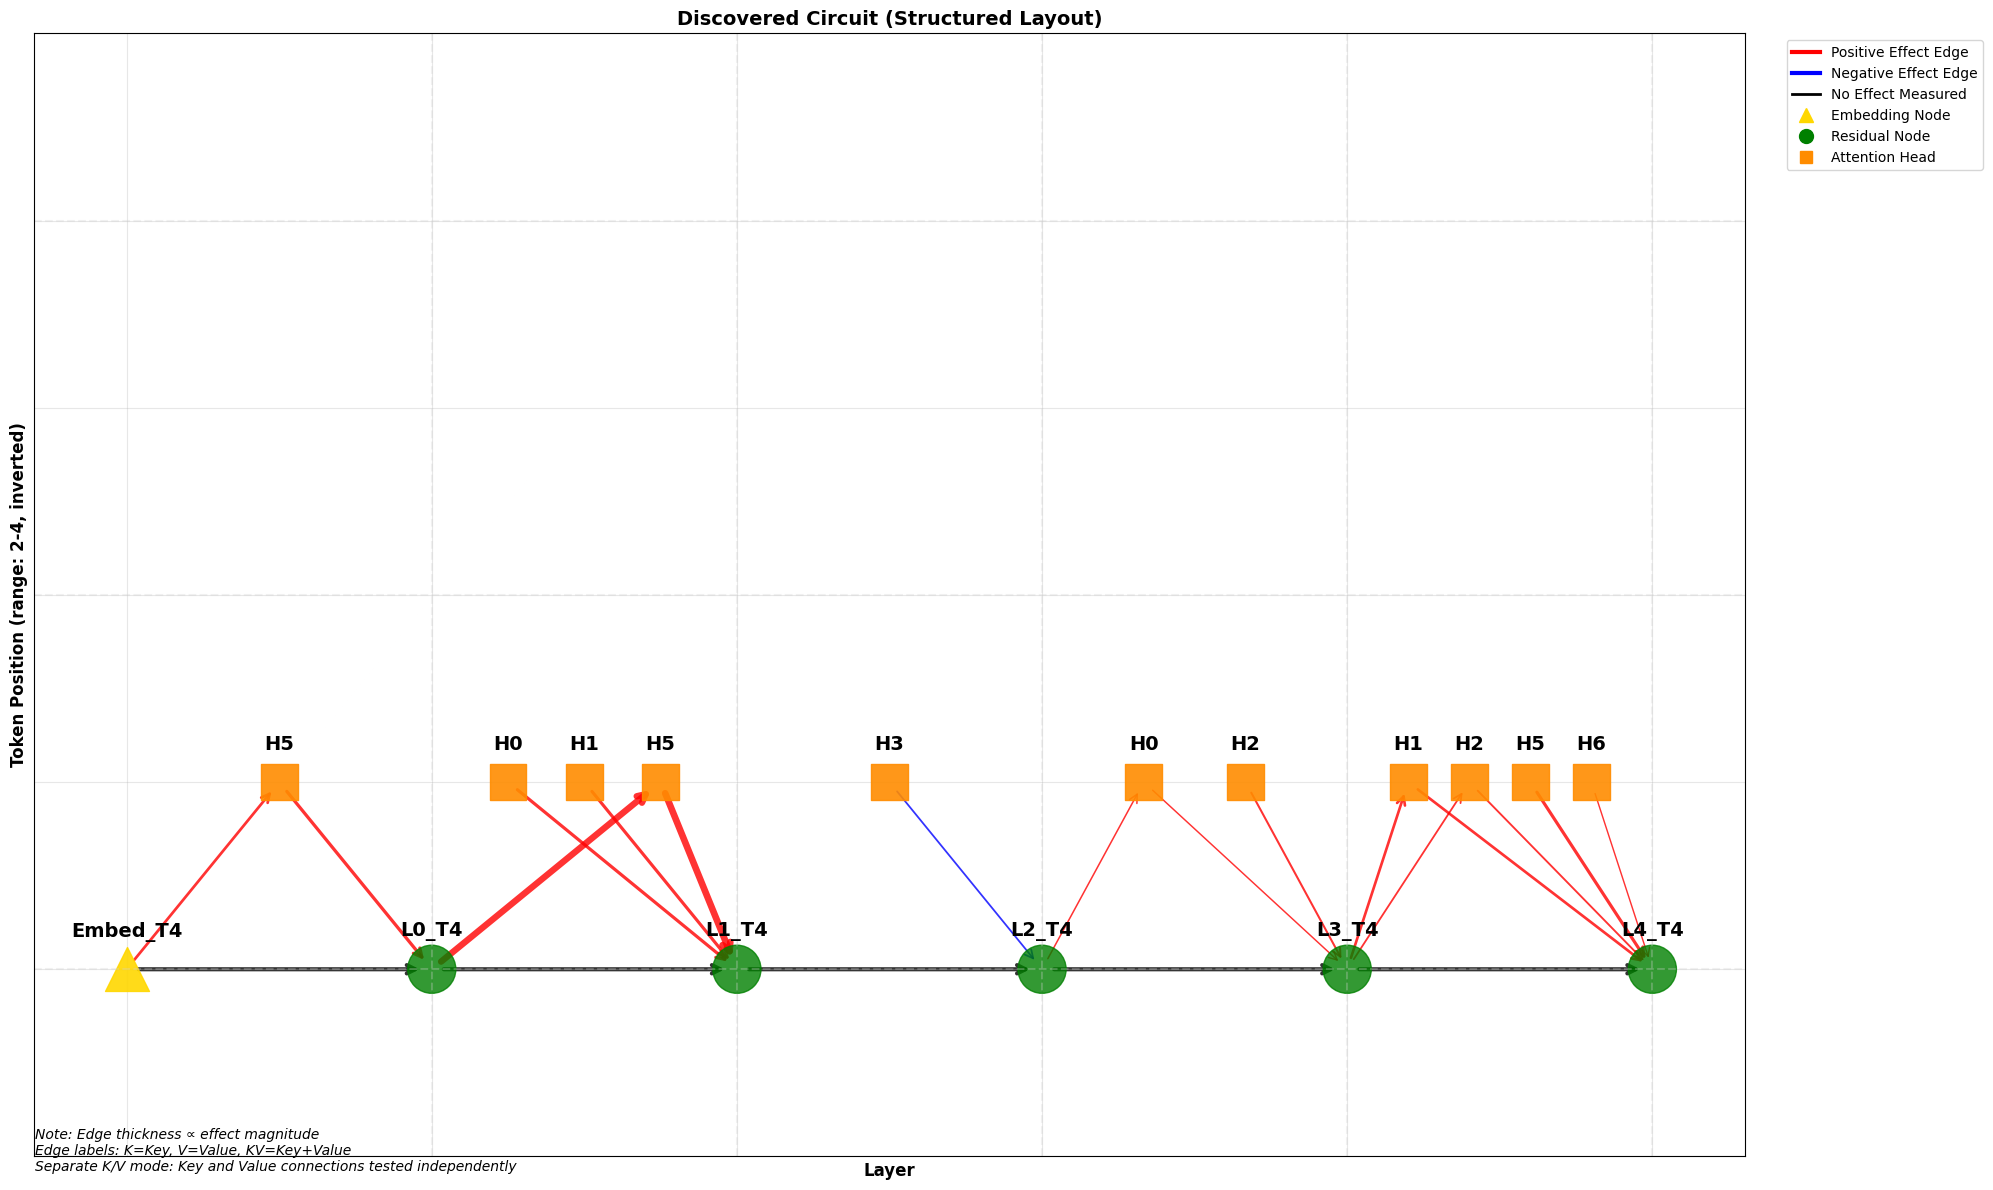

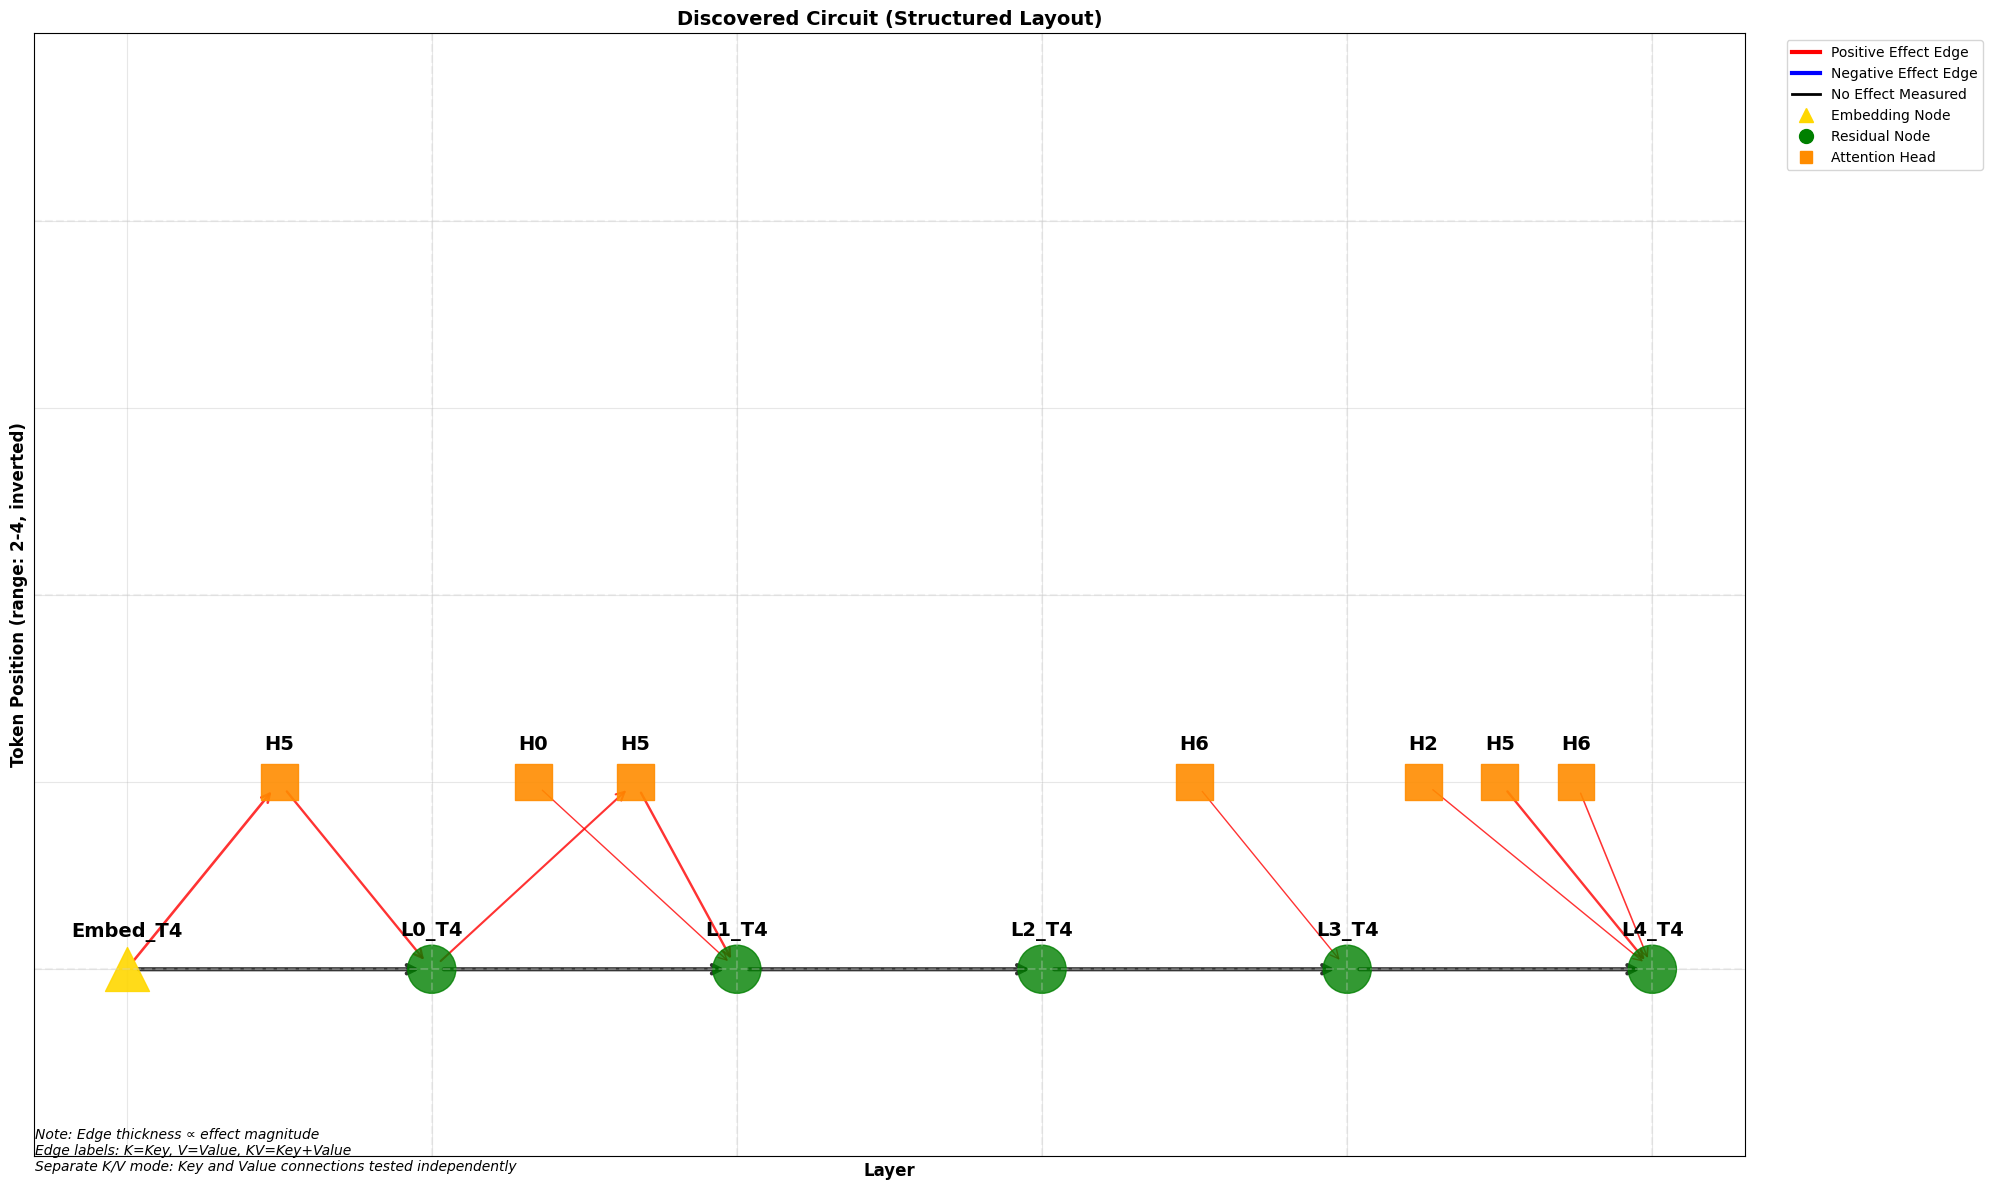

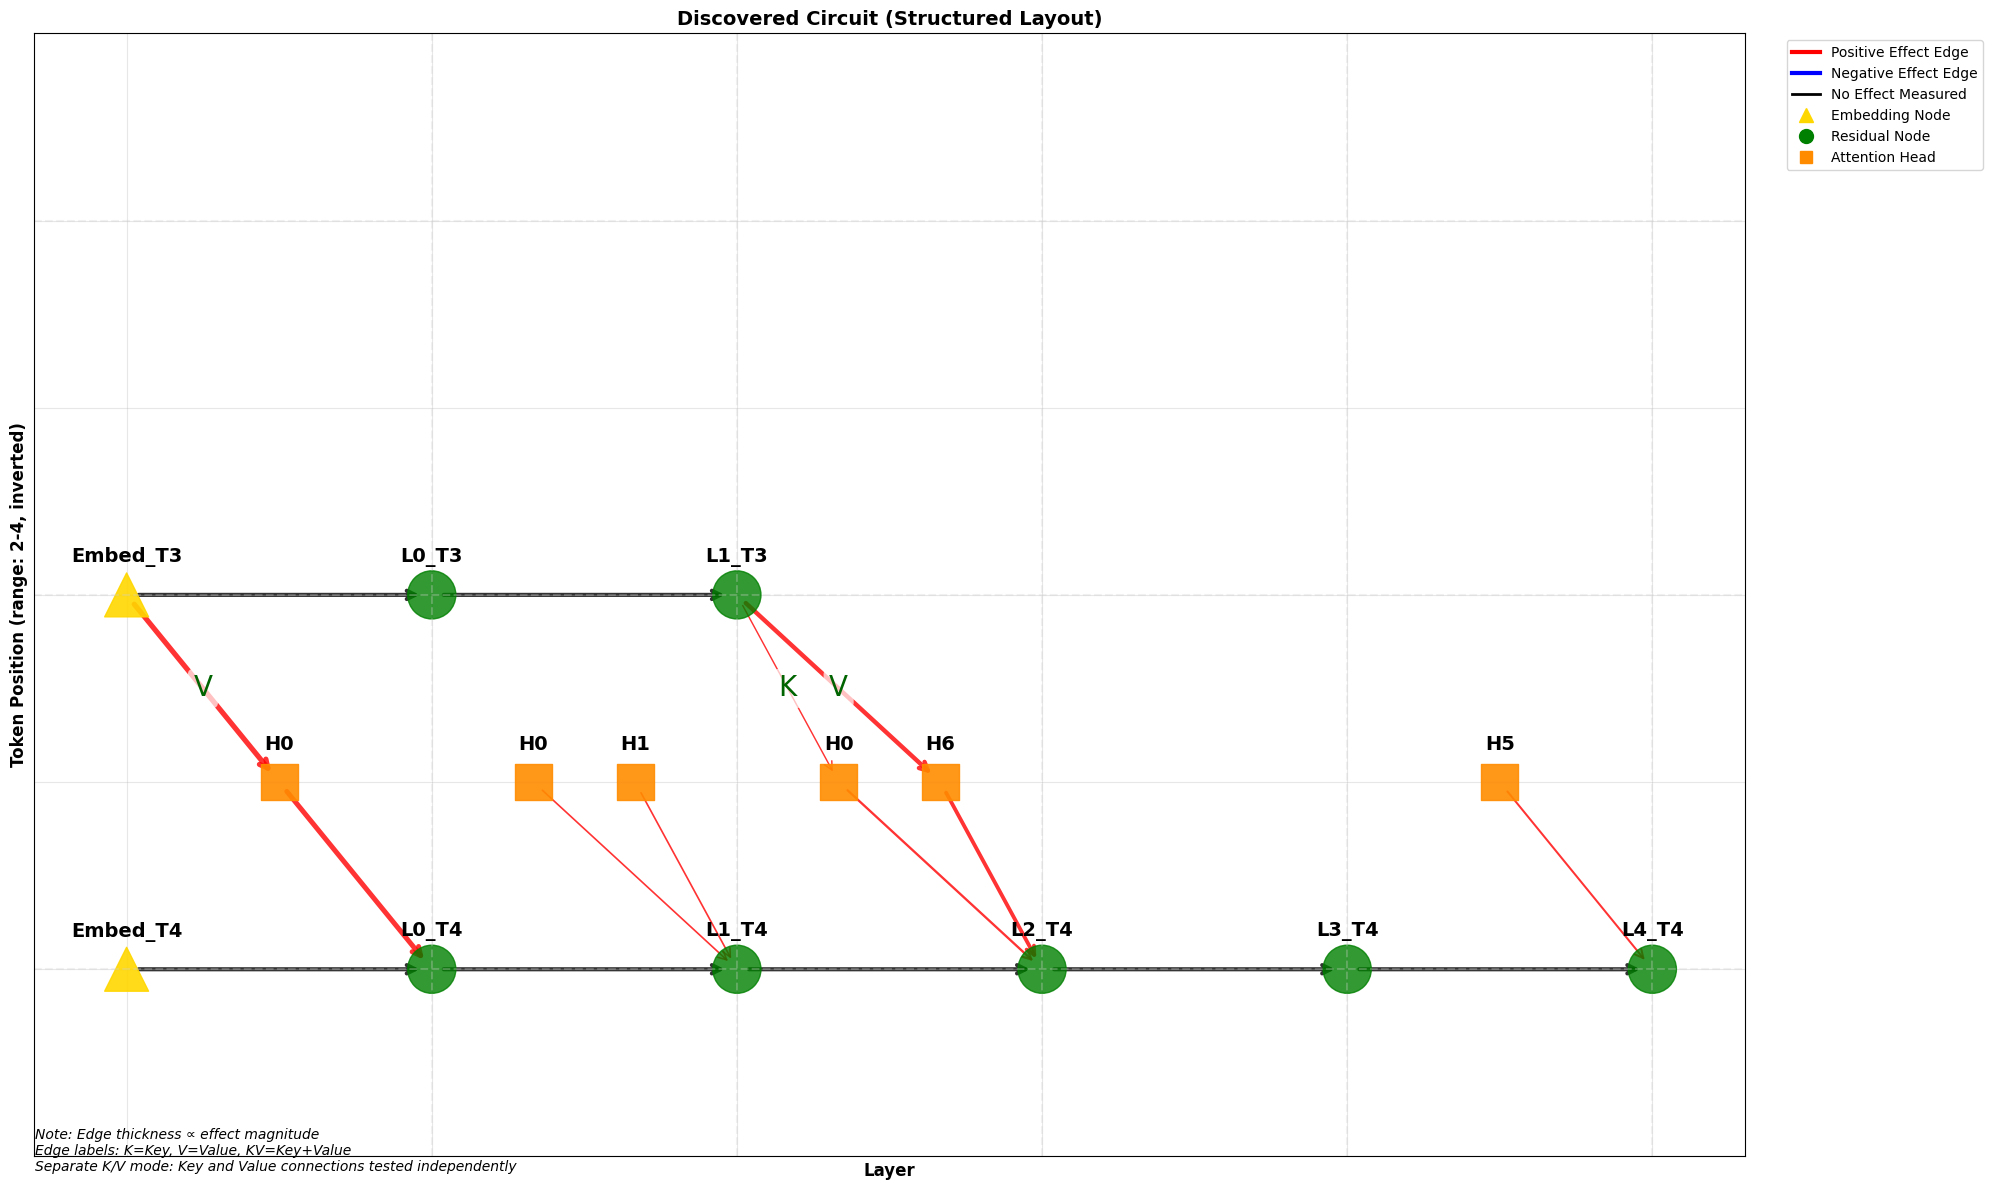

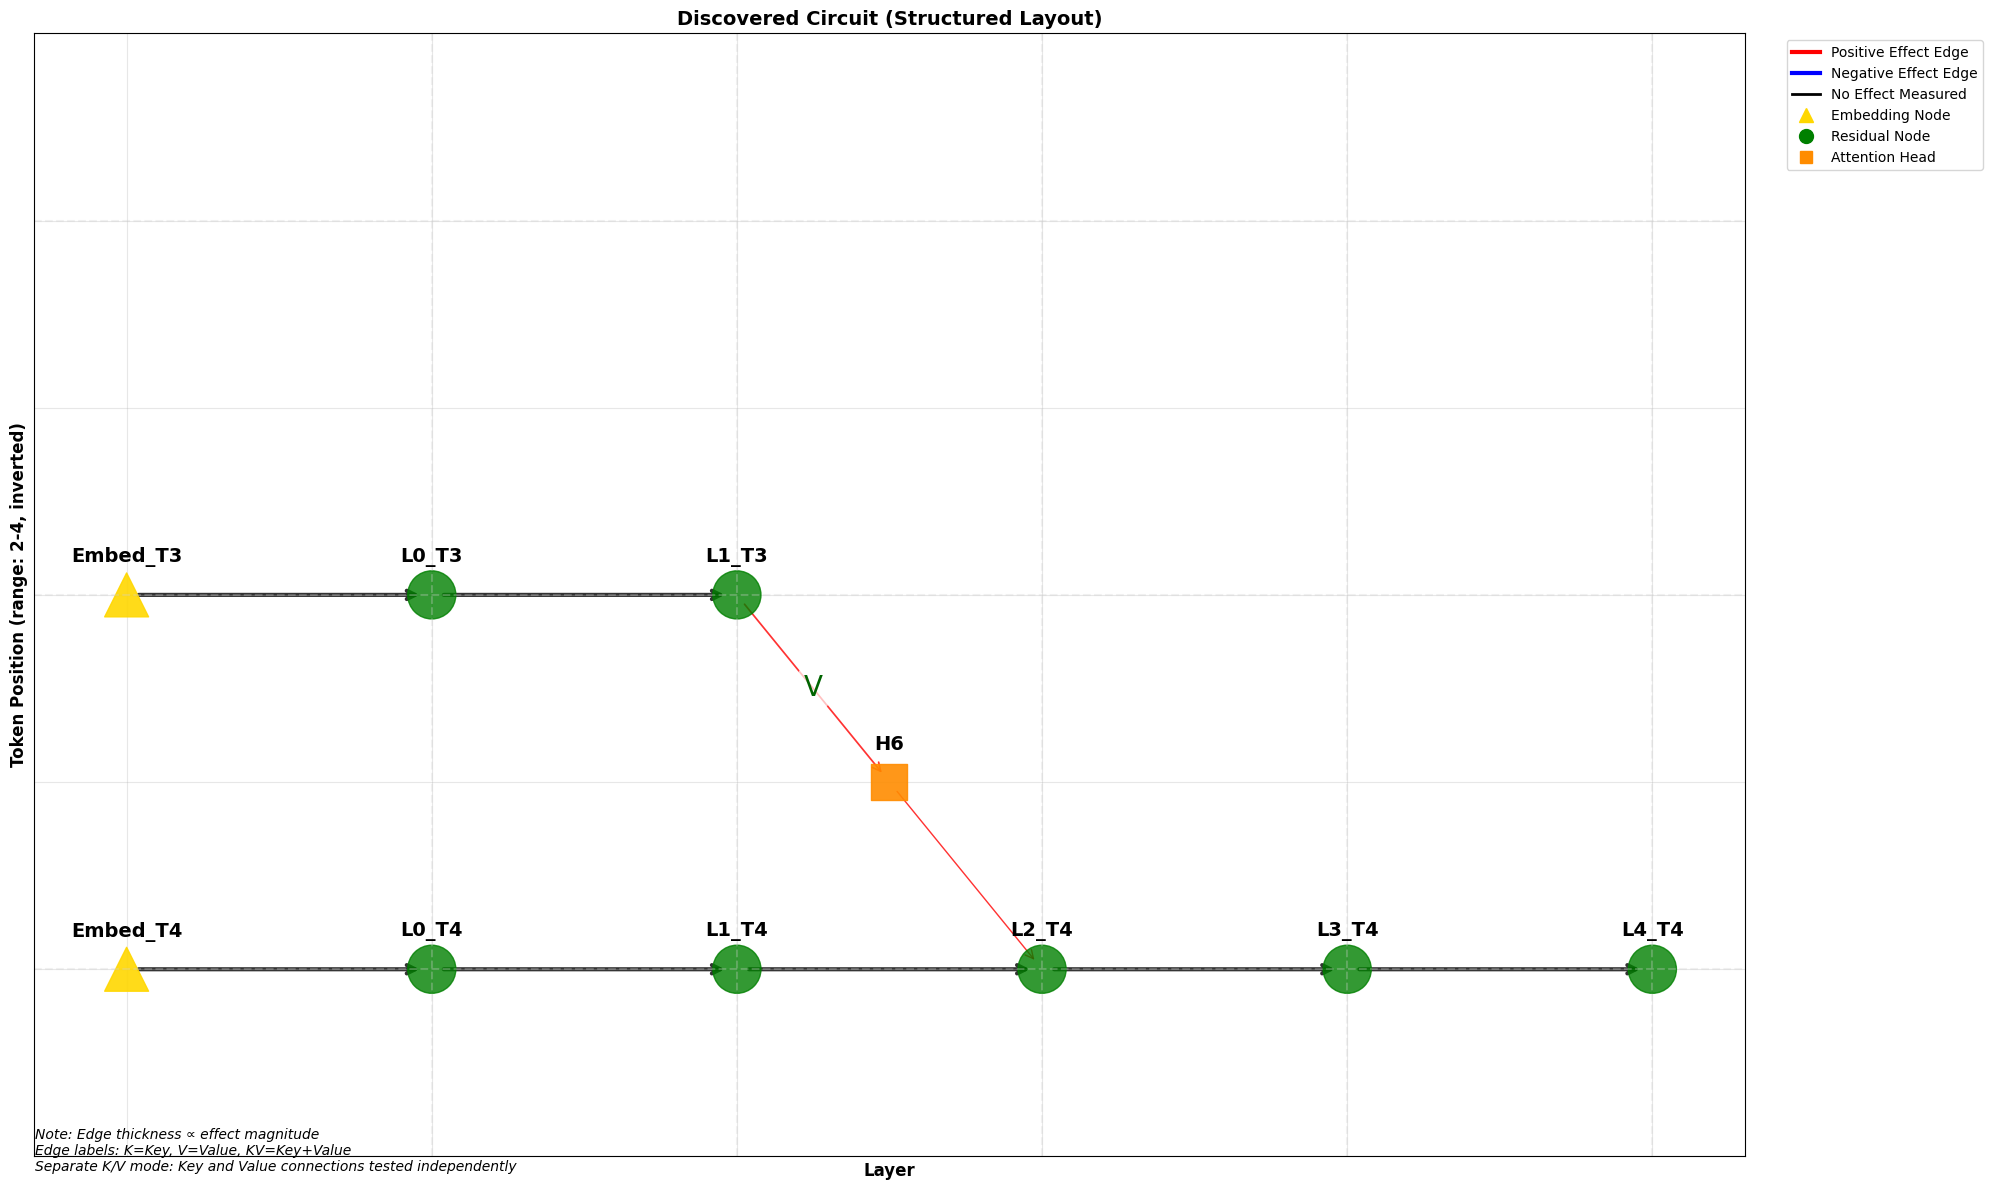

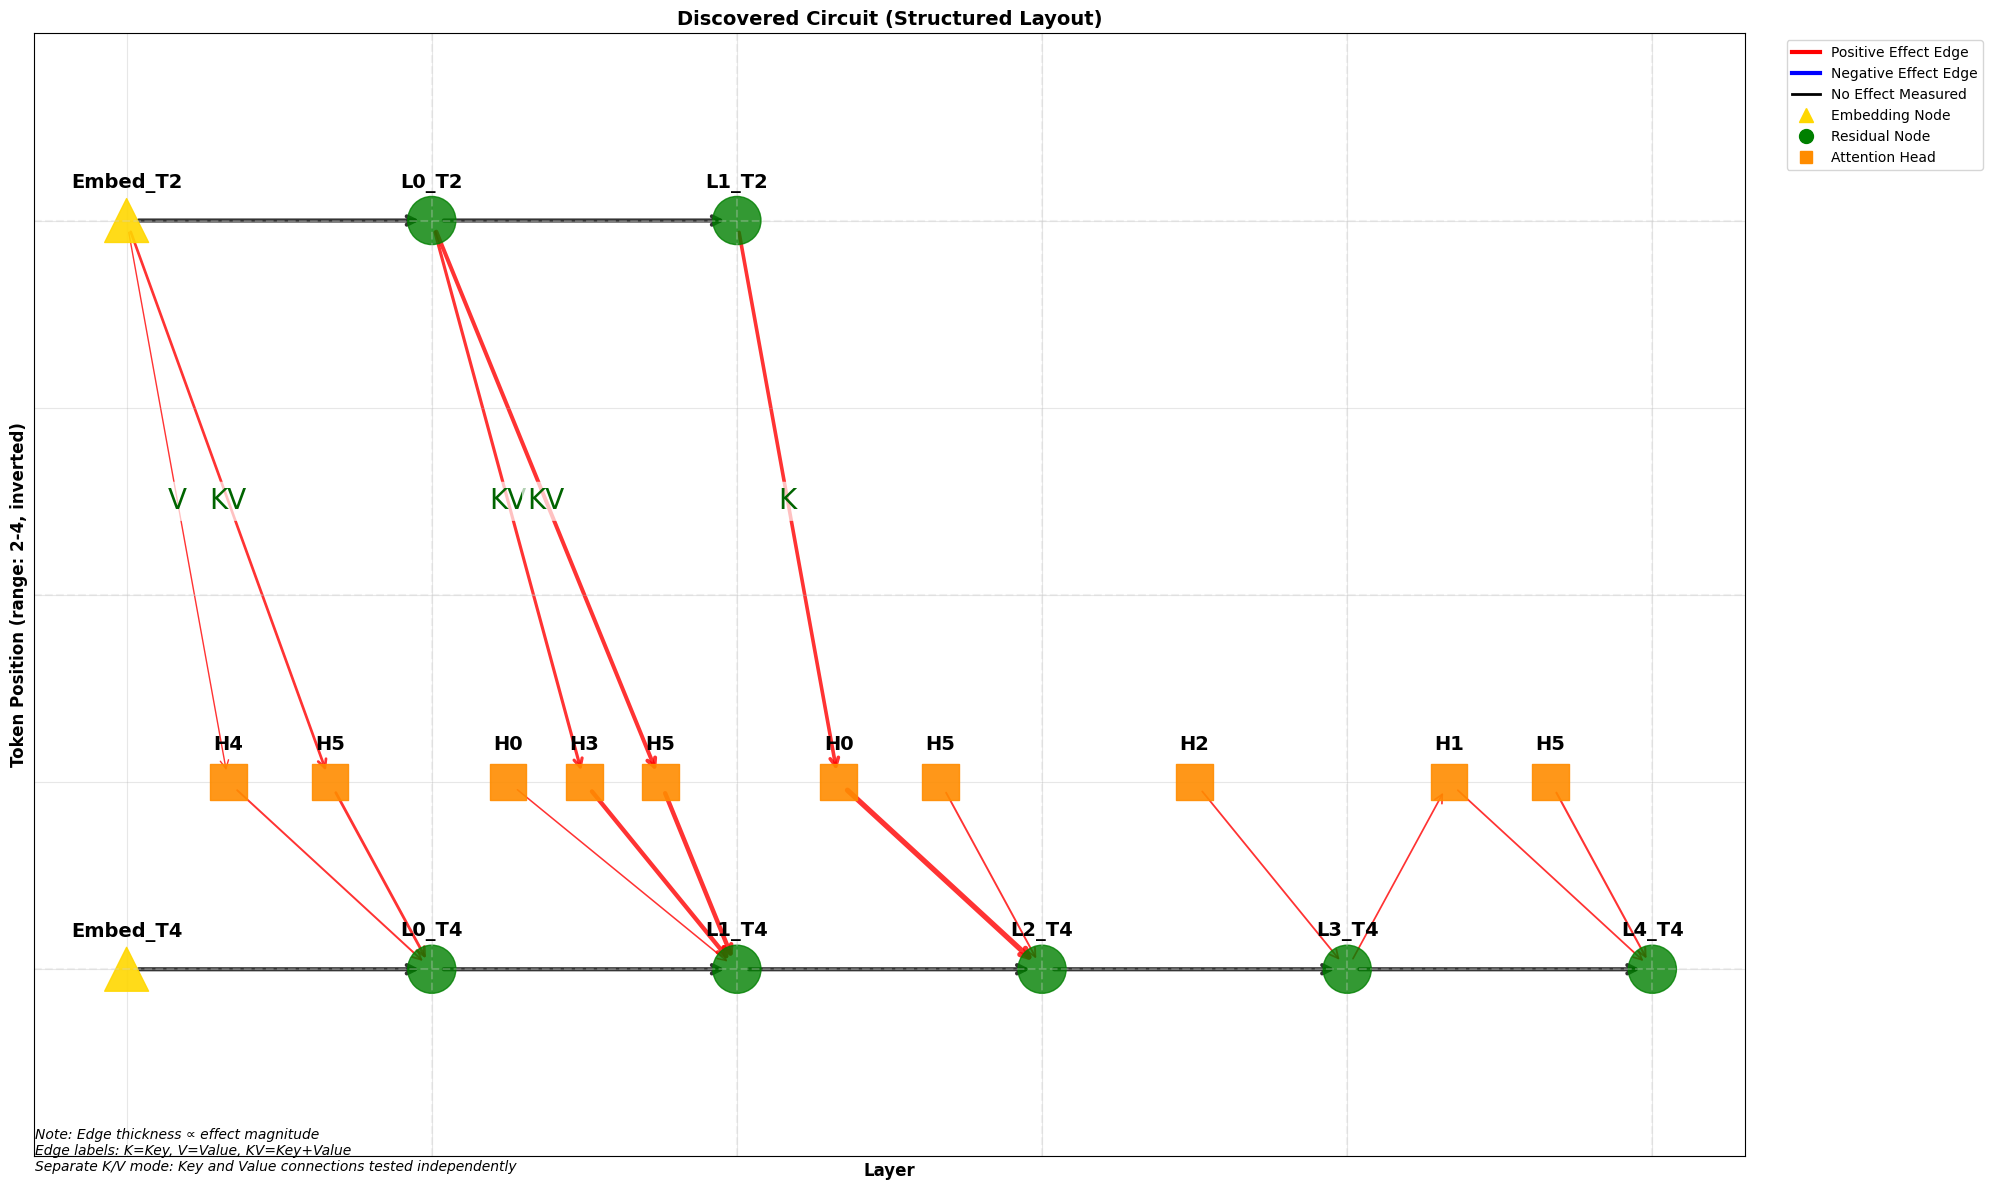

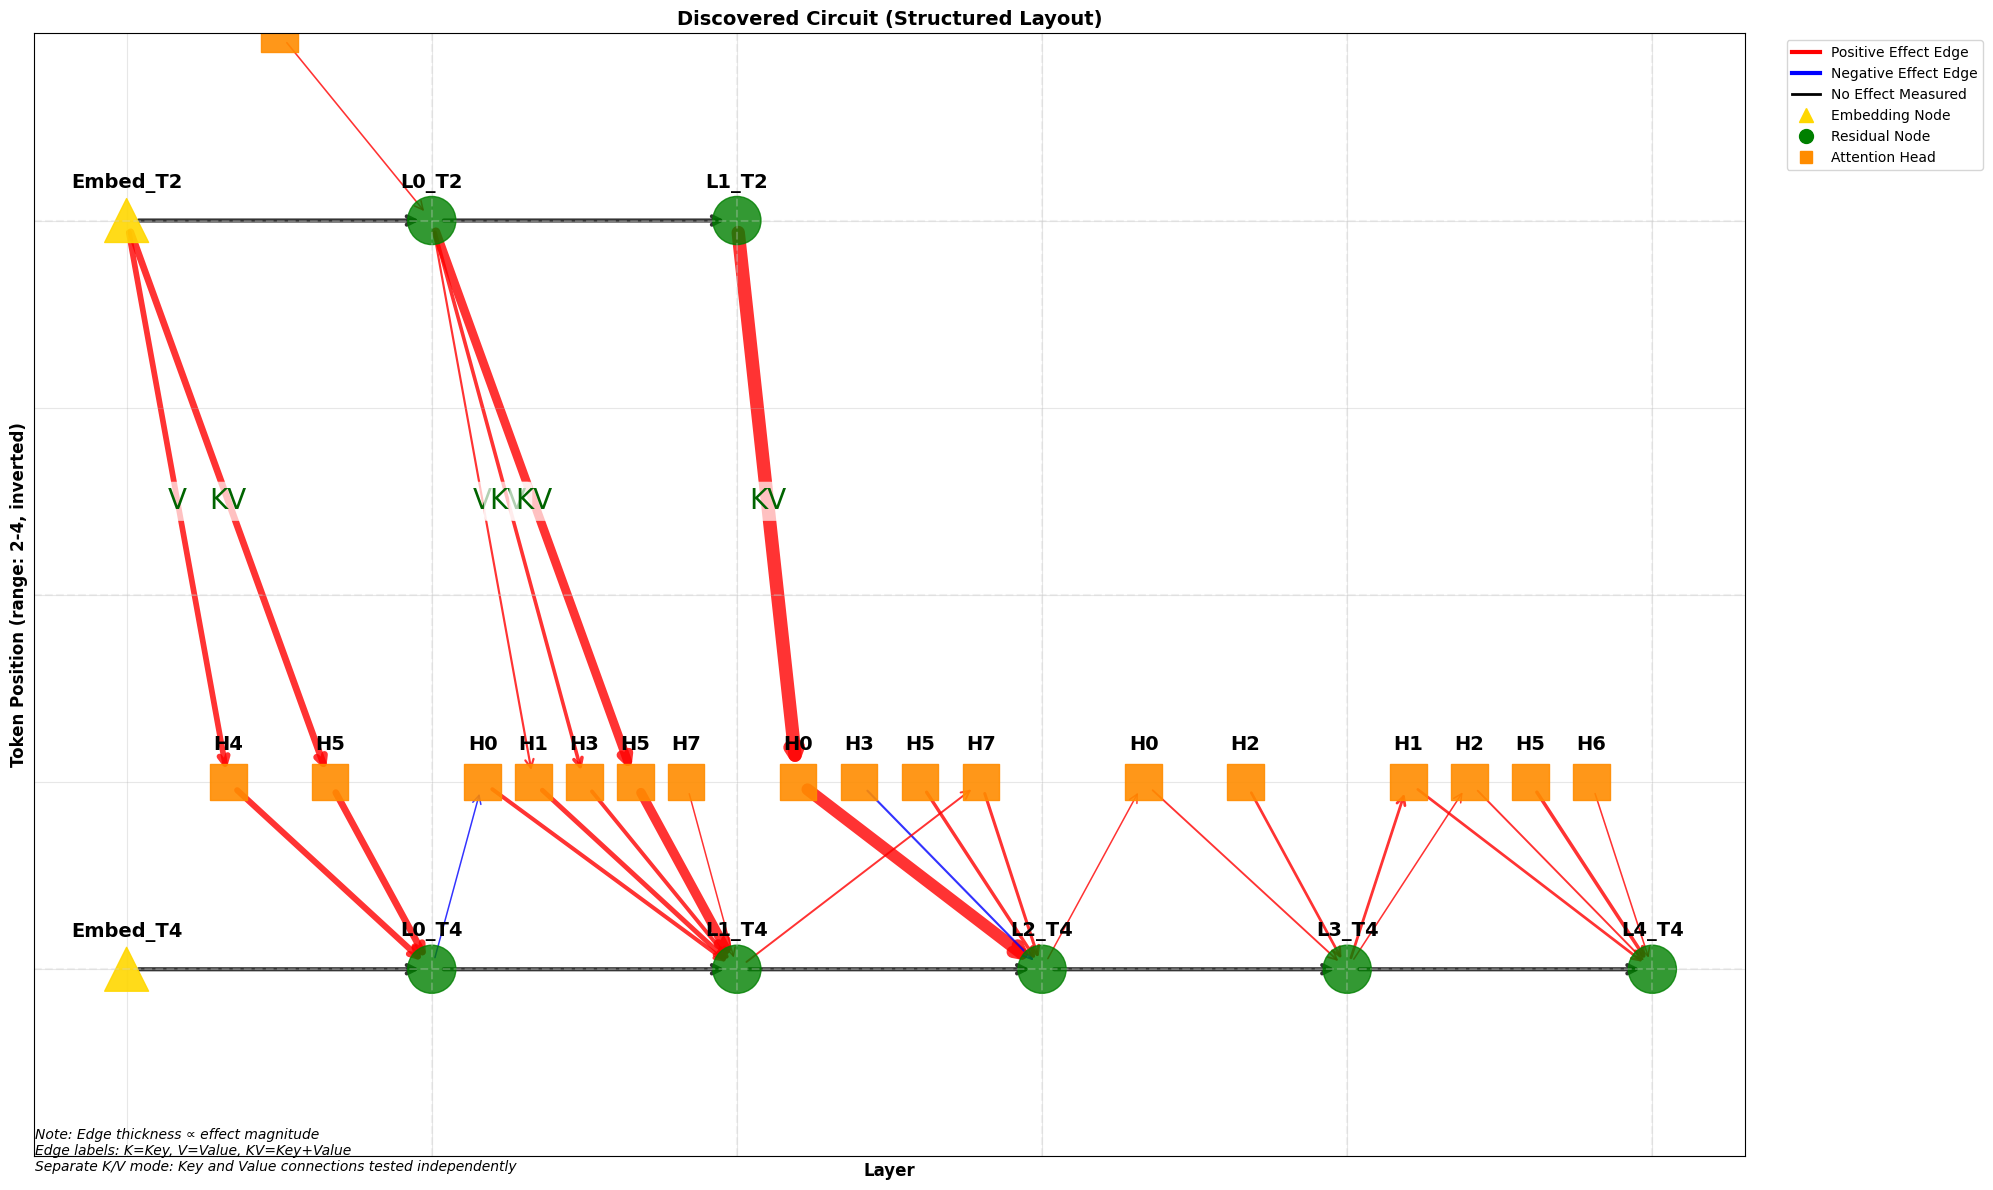

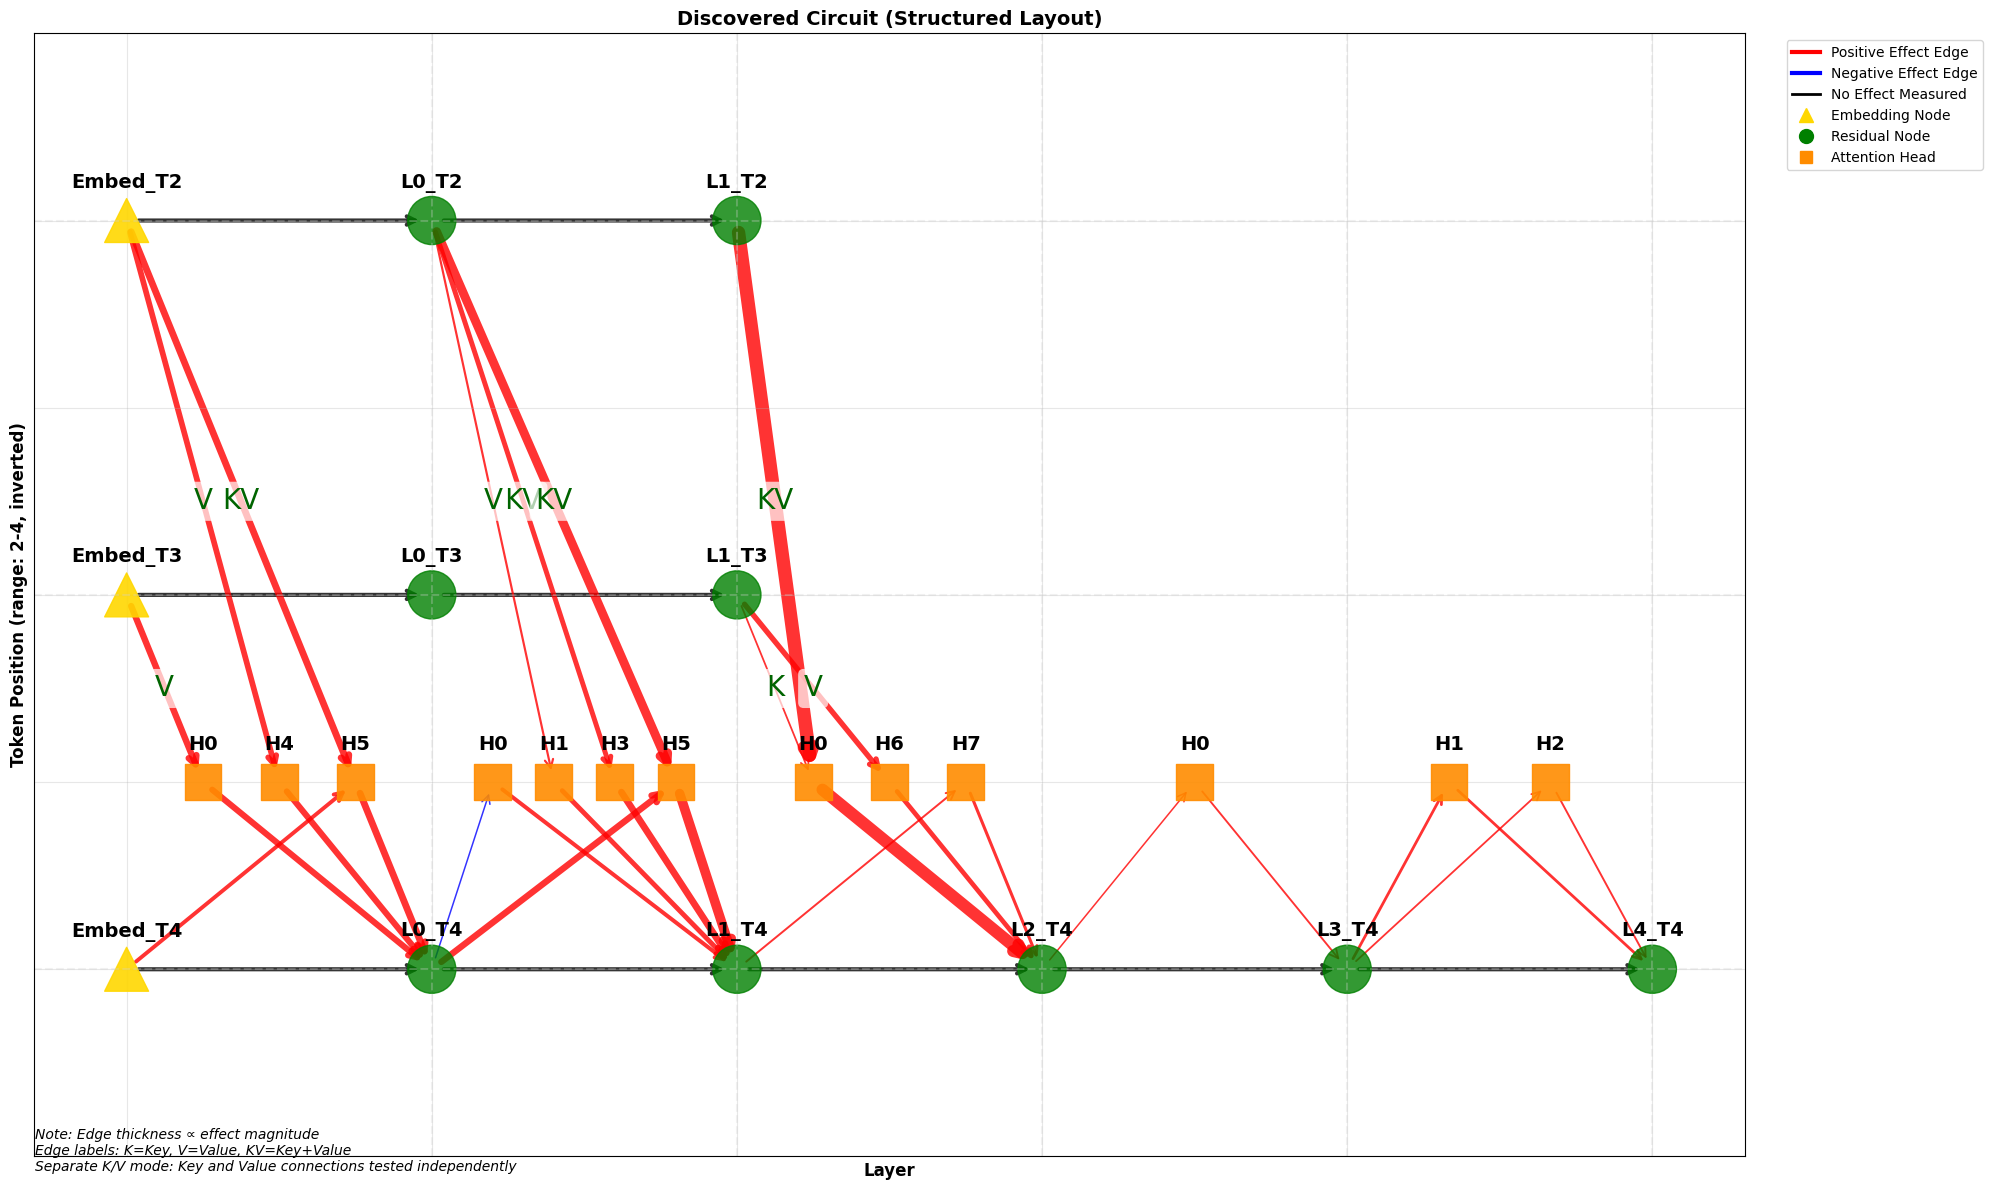


Circuit Summary:
Nodes: 25
Edges: 42

Edges by effect size:
  L1_T2 → L2H0_T4 (key): 0.2291
  L2H0_T4 → L2_T4 (attn_out): 0.1991
  L1H5_T4 → L1_T4 (attn_out): 0.1422
  L0_T2 → L1H5_T4 (key): 0.1261
  L0H5_T4 → L0_T4 (attn_out): 0.0872
  L1H3_T4 → L1_T4 (attn_out): 0.0869
  Embed_T2 → L0H5_T4 (value): 0.0865
  L0_T4 → L1H5_T4 (query): 0.0798
  Embed_T3 → L0H0_T4 (value): 0.0794
  L0H4_T4 → L0_T4 (attn_out): 0.0750
  L0H0_T4 → L0_T4 (attn_out): 0.0749
  Embed_T2 → L0H4_T4 (value): 0.0677
  L1_T3 → L2H6_T4 (value): 0.0625
  L0_T2 → L1H3_T4 (value): 0.0549
  L1H1_T4 → L1_T4 (attn_out): 0.0539
  Embed_T2 → L0H5_T4 (key): 0.0530
  L2H6_T4 → L2_T4 (attn_out): 0.0512
  L0_T2 → L1H3_T4 (key): 0.0503
  L1H0_T4 → L1_T4 (attn_out): 0.0411
  Embed_T4 → L0H5_T4 (query): 0.0395
  L1_T2 → L2H0_T4 (value): 0.0293
  L2H7_T4 → L2_T4 (attn_out): 0.0280
  L0_T2 → L1H5_T4 (value): 0.0267
  L4H1_T4 → L4_T4 (attn_out): 0.0243
  L3_T4 → L4H1_T4 (query): 0.0242
  L0_T2 → L1H1_T4 (value): 0.0171
  L1_T4 → L2H7_

In [11]:
thresholds = [0.009, 0.016, 0.012, 0.016, 0.017, 0.009]

merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=max_layer,
    original_text=original_text,
    corrupted_texts=corrupted_texts,
    target_text=target_text,
    thresholds=thresholds,
    min_token_pos=min_token_pos,
    corrupt_q=True,
    separate_kv=True,
    quiet=True,
    visualize_individual=True
    # save_individual_paths=[
    #     "circuits/individual_circuit_1.png",
    #     "circuits/individual_circuit_2.png"
    # ]
)

acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=max_layer, threshold=min(thresholds), corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=min_token_pos)

In [12]:
all_texts = [original_text] + corrupted_texts
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=4,
    k_index=2  
)

Computing Q-K dot products for Layer 0, Head 5 (Q@4, K@2):
Q token at position 4: ' bucket'
K token at position 2: ' kicked'
--------------------------------------------------------------------------------
'He kicked the bucket' -> 66.396858
'He kicked the buckets' -> 51.894302
'He kicked the pail' -> 32.166965
'He kicked a bucket' -> 66.396858
'He kicked this bucket' -> 66.396858
'He booted the bucket' -> 45.797302
'He punched the bucket' -> 44.199623
--------------------------------------------------------------------------------


# A Piece of Cake

In [25]:
original_text = "That was a piece of cake"
min_token_pos = 4
target_text="That was easy"
print(f"Original text tokens: {gemma_utils.detokenize(model, original_text)}")
print(f"Token at position {min_token_pos}: '{gemma_utils.detokenize(model, original_text)[min_token_pos]}'")

_ = gemma_utils.find_similar_tokens_by_embedding(model, ' piece', top_k=50)
_ = gemma_utils.find_similar_tokens_by_embedding(model, ' cake', top_k=50)

Original text tokens: ['<bos>', 'That', ' was', ' a', ' piece', ' of', ' cake']
Token at position 4: ' piece'
Target token: ' piece' (ID: 6431)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 50 tokens most similar to ' piece':
------------------------------------------------------------
 1. Token ID   6431: ' piece' (similarity: 1.0000)
 2. Token ID  17143: 'piece' (similarity: 0.7959)
 3. Token ID   9308: ' pieces' (similarity: 0.7638)
 4. Token ID  38669: ' Piece' (similarity: 0.7489)
 5. Token ID  36992: 'Piece' (similarity: 0.7231)
 6. Token ID 163978: ' PIECE' (similarity: 0.7213)
 7. Token ID  40192: 'pieces' (similarity: 0.6204)
 8. Token ID  66337: ' Pieces' (similarity: 0.5879)
 9. Token ID  94628: 'Pieces' (similarity: 0.5575)
10. Token ID  62800: ' pieza' (similarity: 0.5344)
11. Token ID 206148: 'PIECE' (similarity: 0.5160)
12. Token ID 150685: ' pezzo' (similarity: 0.4538)
13. Token ID  33382: ' piezas' (similarity: 0.436

Analyzing similarities to target sentence: 'That was easy'
Comparing 7 sentences across layers...


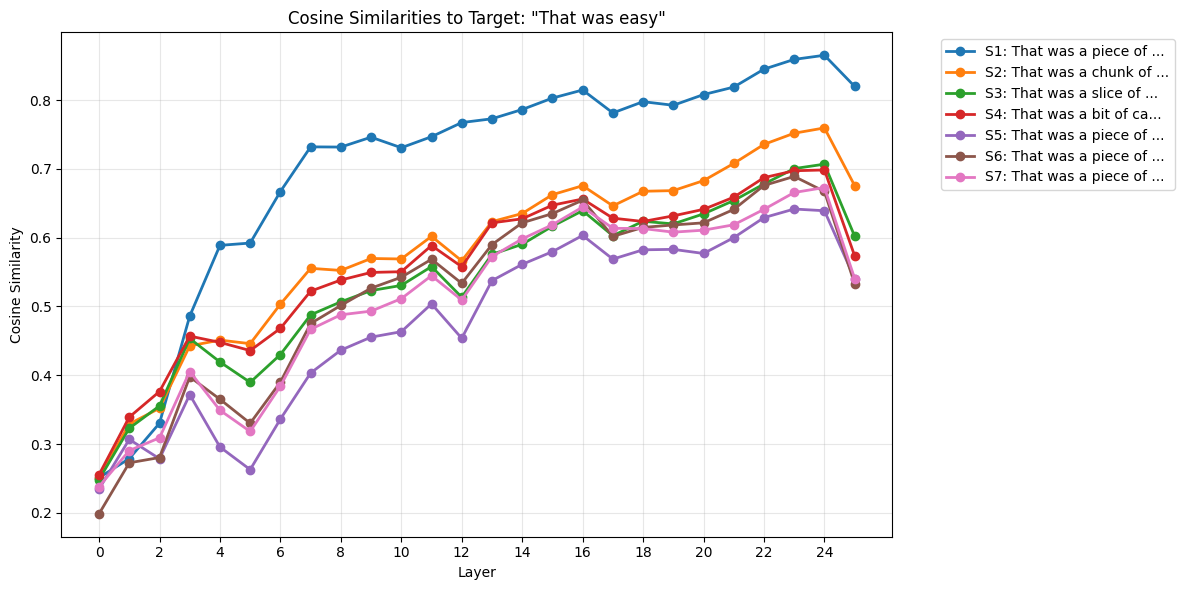

In [27]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["That was a piece of cake", "That was a chunk of cake", "That was a slice of cake", "That was a bit of cake", "That was a piece of cupcake", "That was a piece of pie", "That was a piece of pastry"],
                                     target_sentence=target_text)

In [ ]:
max_layer = 4
corrupted_texts = ["That was a chunk of cake", "That was a slice of cake", "That was a piece of cupcake", "That was a piece of pie"]

Threshold Sweep: 100%|██████████| 40/40 [01:35<00:00,  2.39s/it]


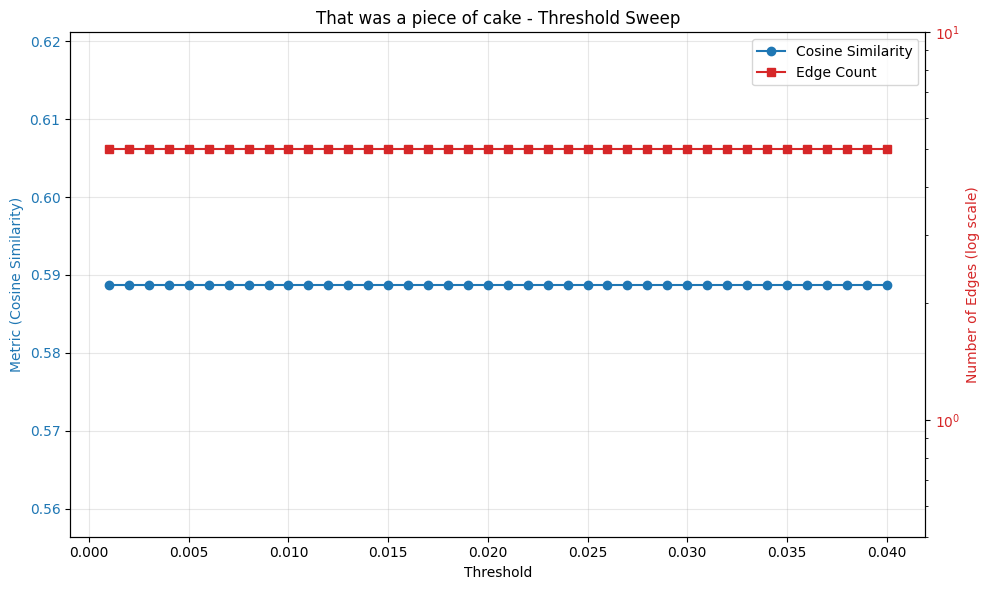

Threshold Sweep: 100%|██████████| 40/40 [02:41<00:00,  4.04s/it]


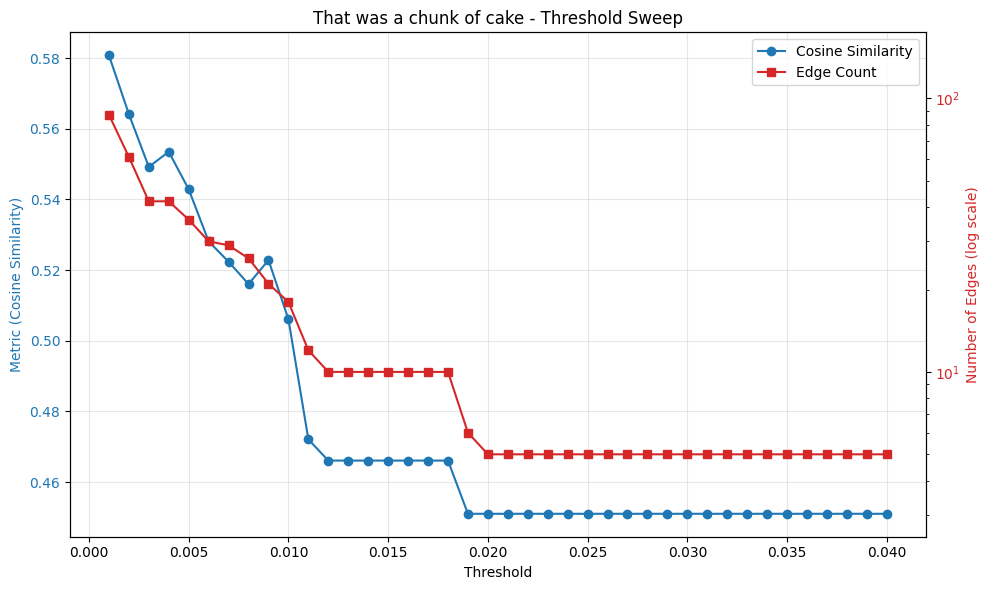

Threshold Sweep: 100%|██████████| 40/40 [02:32<00:00,  3.82s/it]


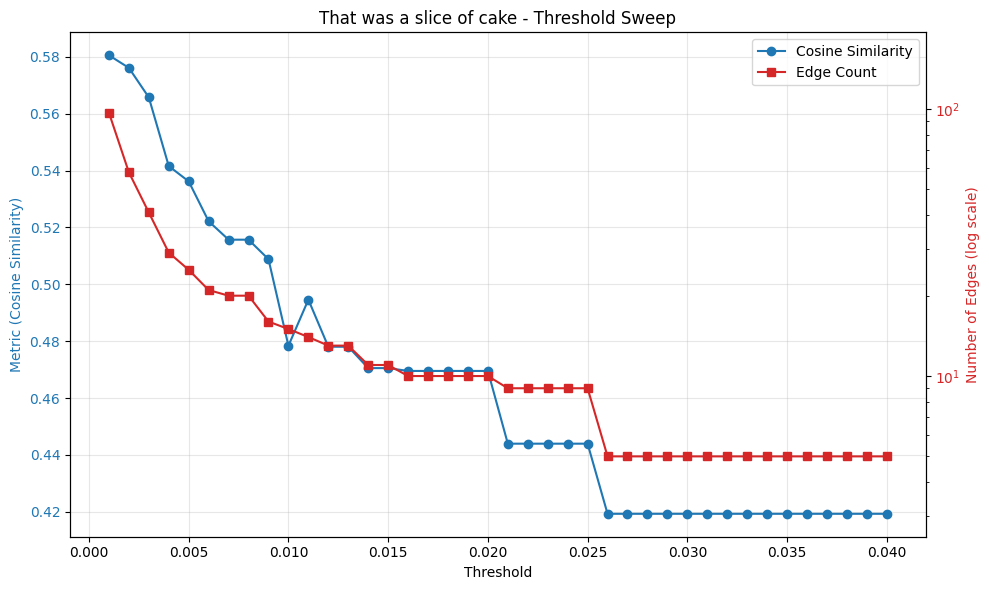

Threshold Sweep: 100%|██████████| 40/40 [02:28<00:00,  3.72s/it]


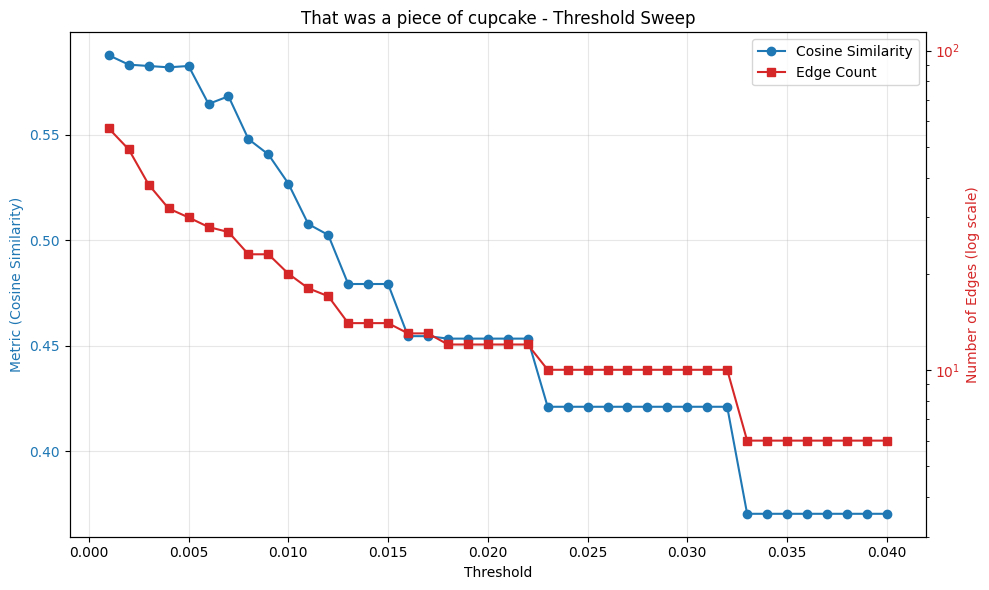

Threshold Sweep: 100%|██████████| 40/40 [02:09<00:00,  3.25s/it]


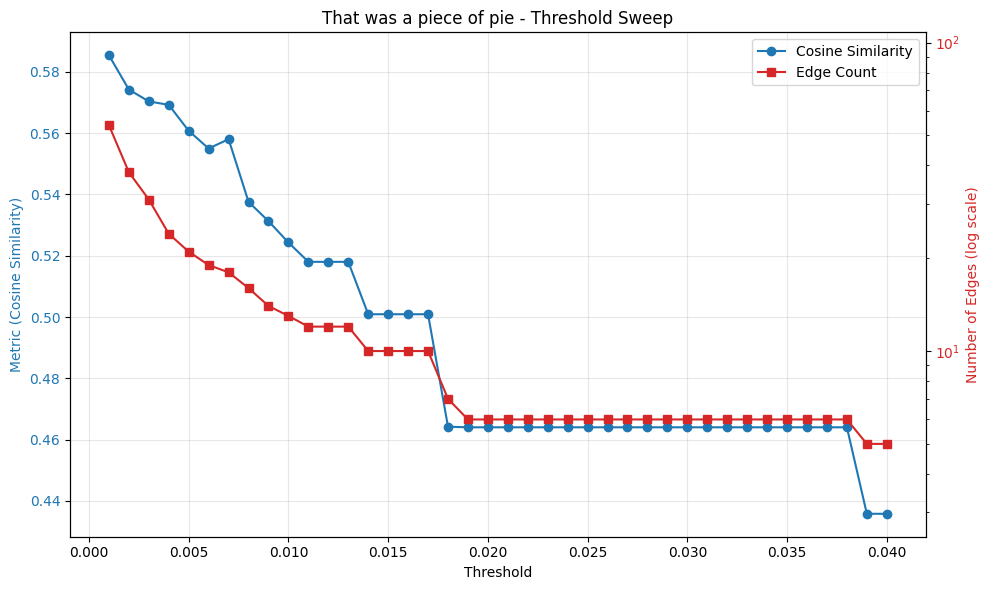

In [ ]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=max_layer,
                                      original_text=original_text,
                                      corrupted_texts=corrupted_texts,
                                      target_text=target_text,
                                      min_token_pos=min_token_pos,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

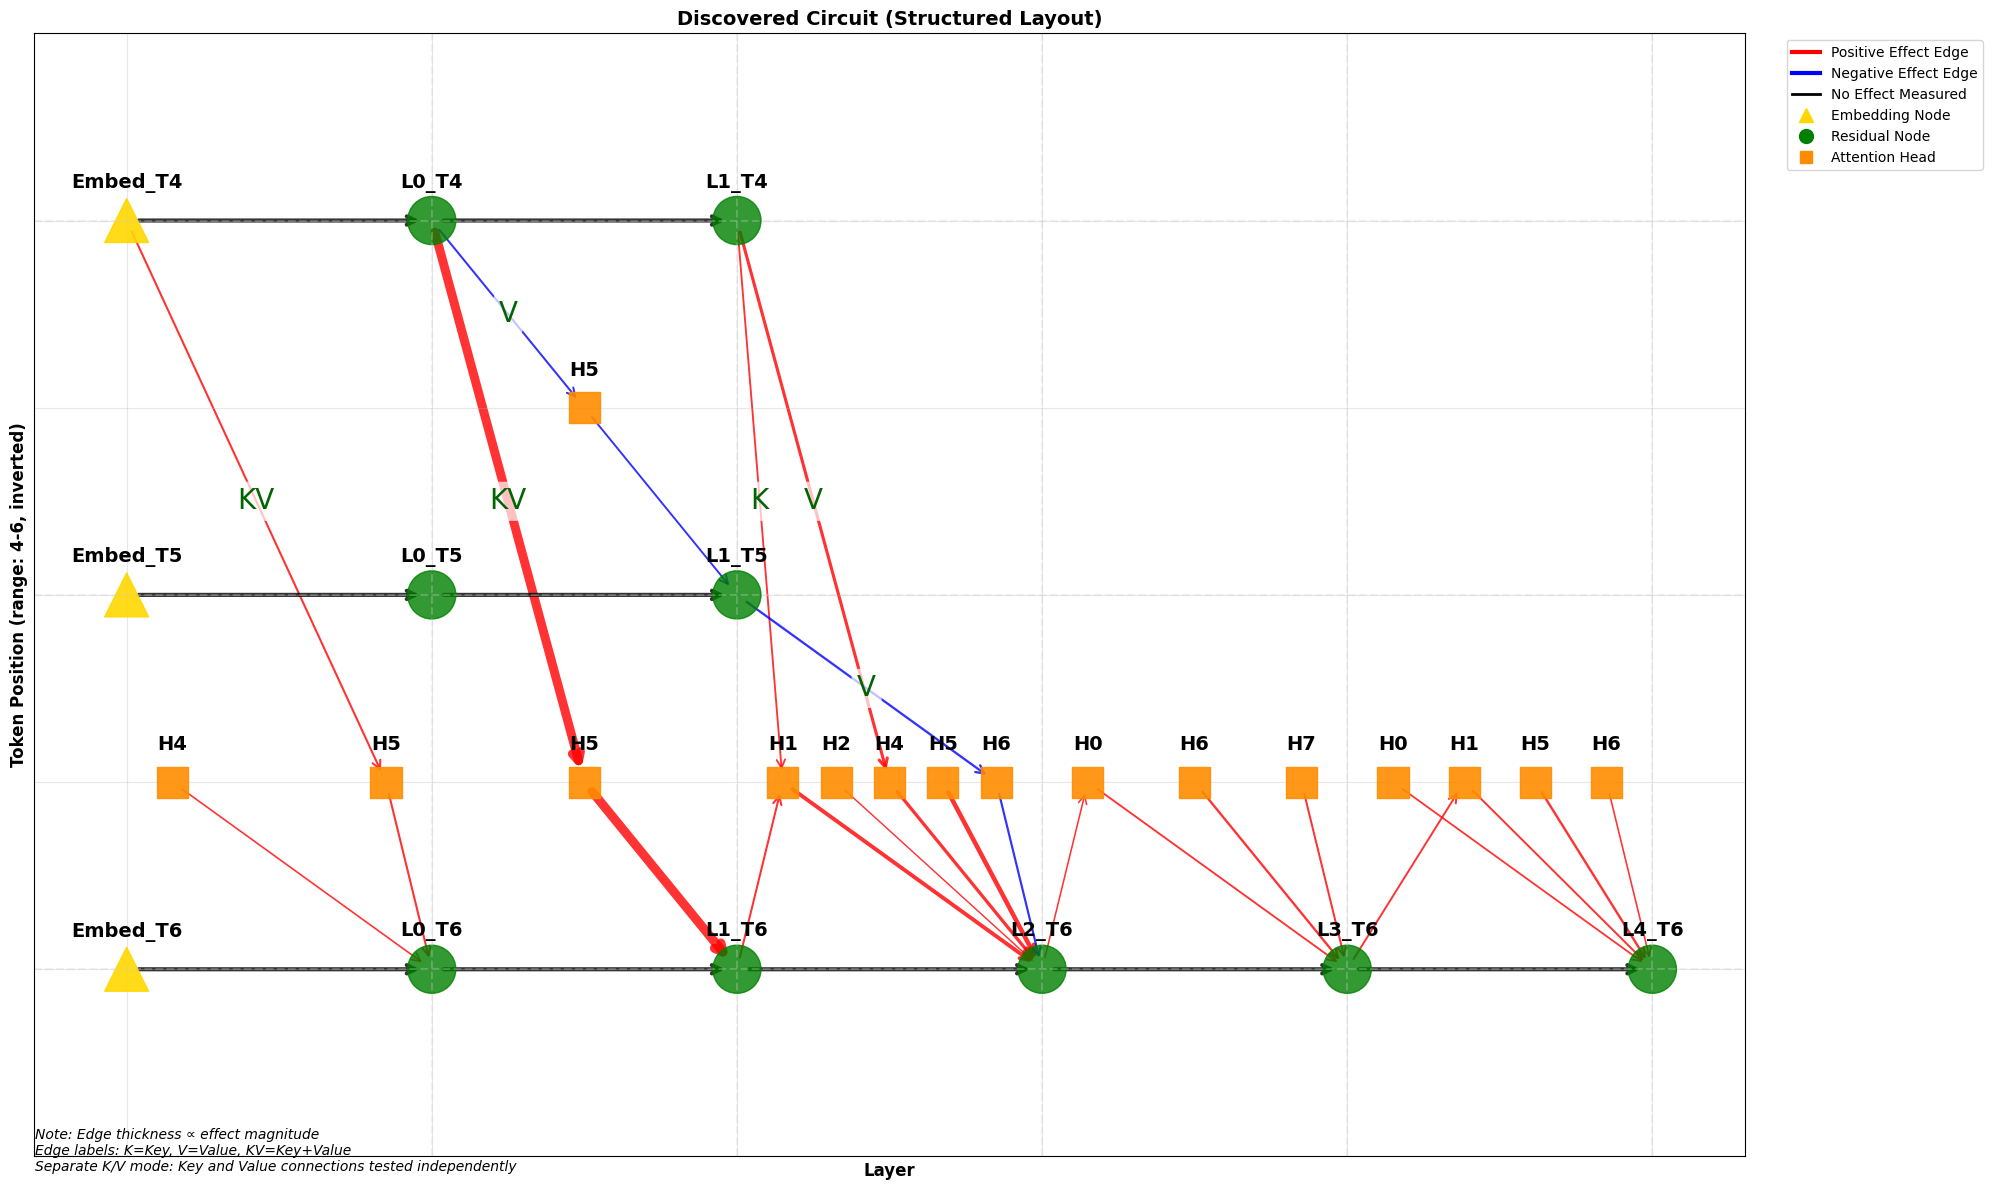

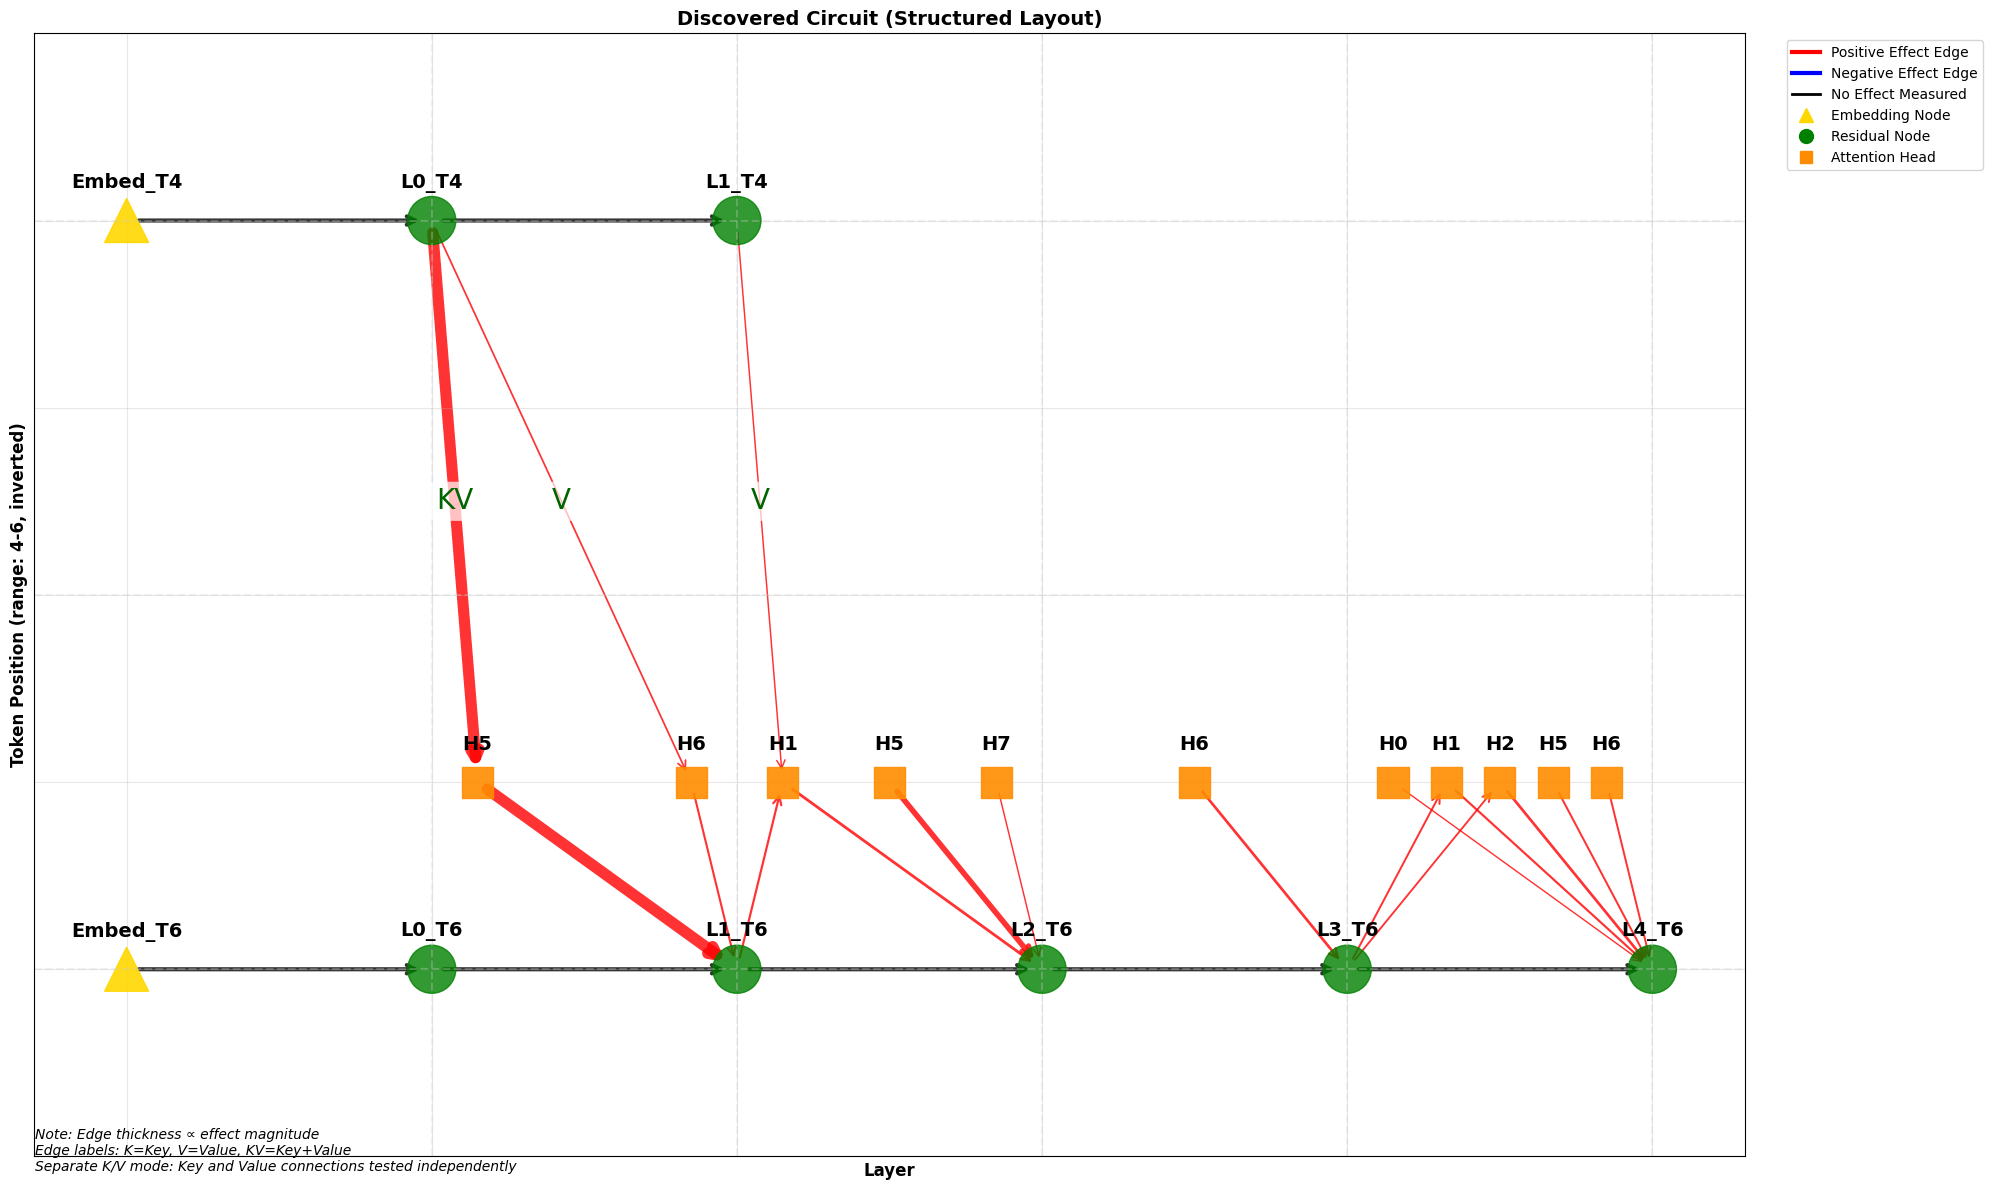

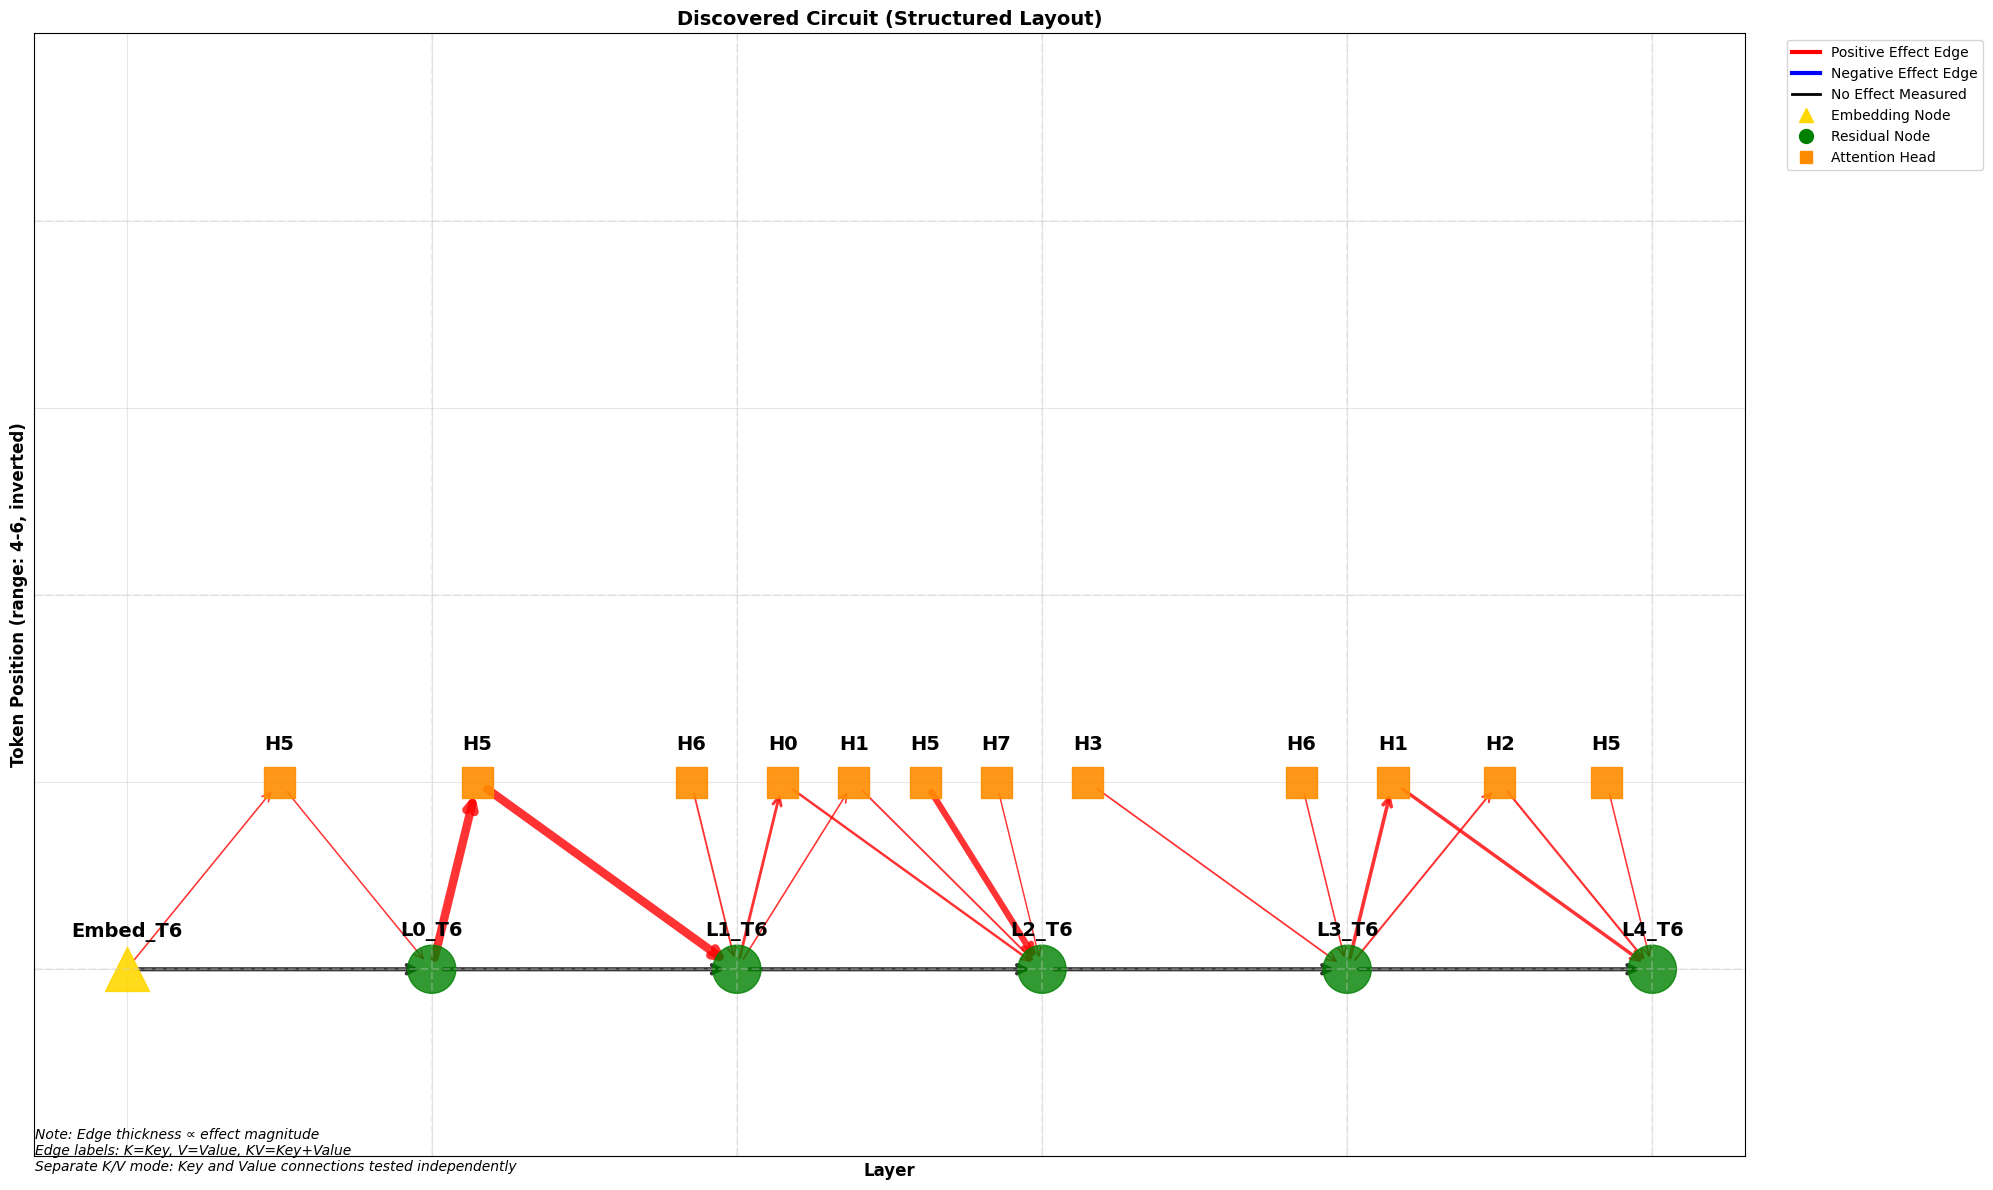

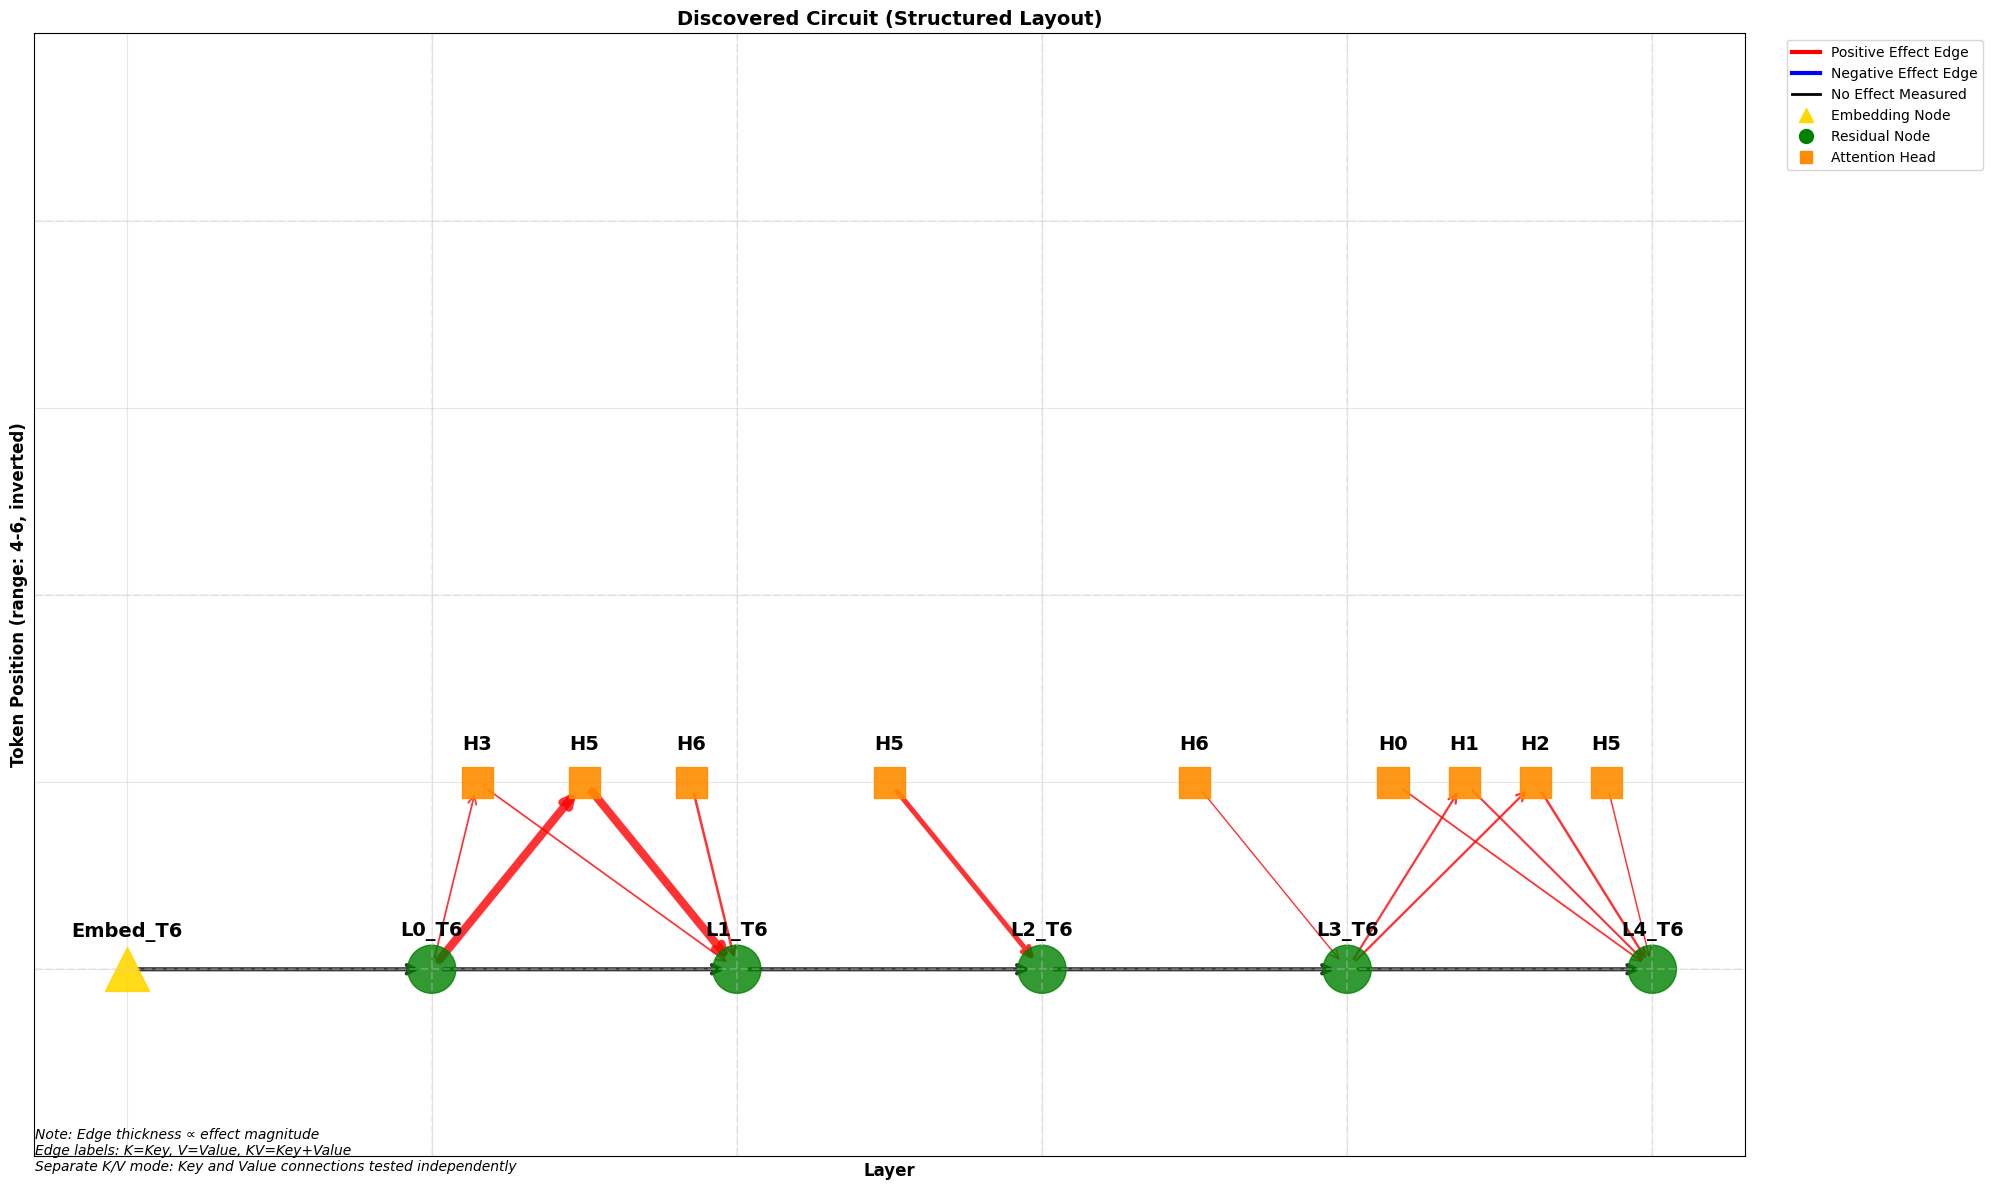

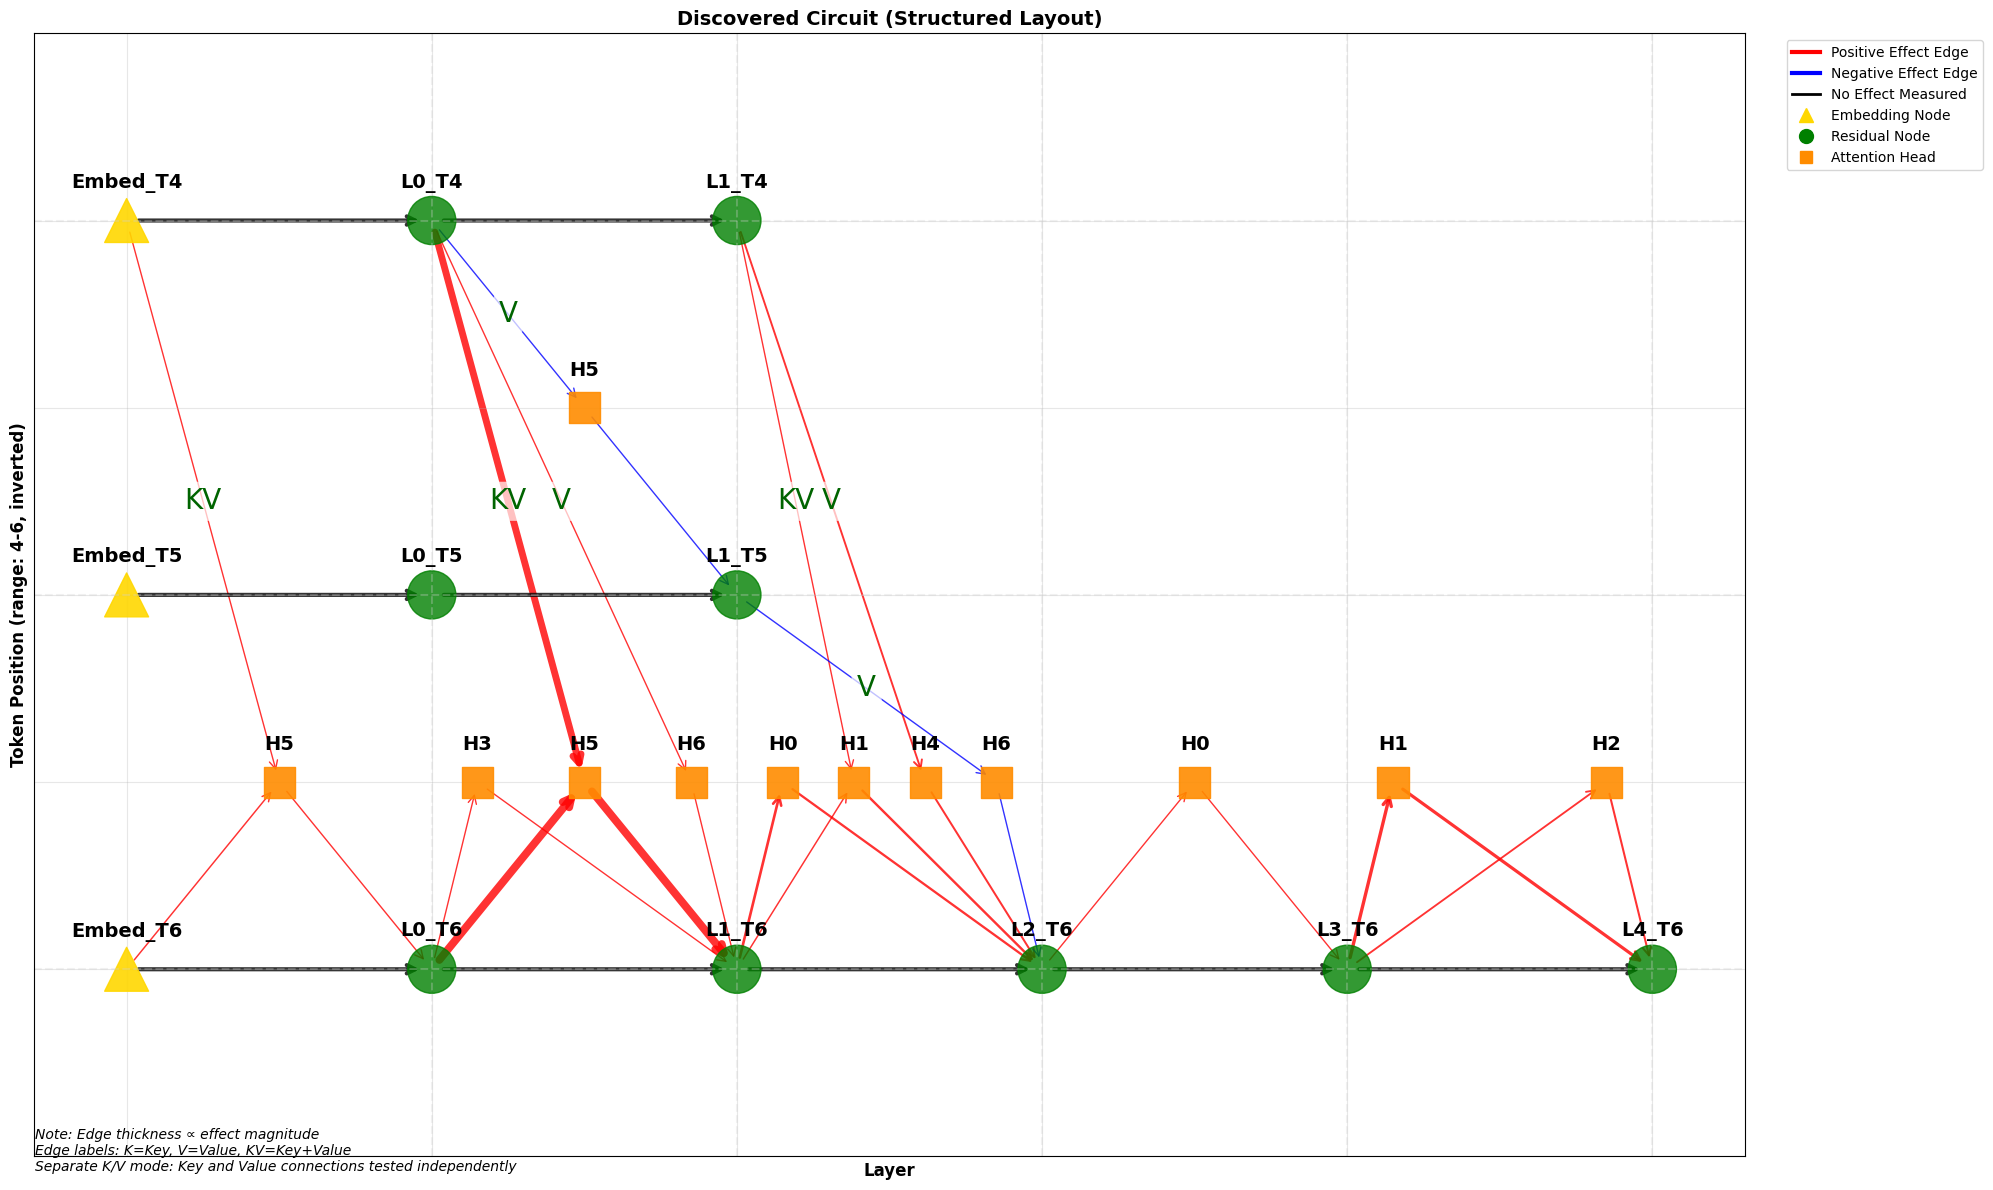


Circuit Summary:
Nodes: 24
Edges: 39

Edges by effect size:
  L1H5_T6 → L1_T6 (attn_out): 0.1191
  L0_T6 → L1H5_T6 (query): 0.1187
  L0_T4 → L1H5_T6 (key): 0.0980
  L0_T4 → L1H5_T6 (value): 0.0358
  L3_T6 → L4H1_T6 (query): 0.0353
  L4H1_T6 → L4_T6 (attn_out): 0.0328
  L1_T6 → L2H0_T6 (query): 0.0251
  L2H1_T6 → L2_T6 (attn_out): 0.0219
  L2H0_T6 → L2_T6 (attn_out): 0.0205
  L4H2_T6 → L4_T6 (attn_out): 0.0175
  L2H4_T6 → L2_T6 (attn_out): 0.0168
  L1_T4 → L2H4_T6 (value): 0.0158
  L3_T6 → L4H2_T6 (query): 0.0152
  L1_T6 → L2H1_T6 (query): 0.0112
  Embed_T6 → L0H5_T6 (query): 0.0110
  L0H5_T6 → L0_T6 (attn_out): 0.0102
  L1_T5 → L2H6_T6 (value): -0.0102
  L1H3_T6 → L1_T6 (attn_out): 0.0098
  L0_T6 → L1H3_T6 (query): 0.0097
  L2H6_T6 → L2_T6 (attn_out): -0.0096
  L1H6_T6 → L1_T6 (attn_out): 0.0090
  Embed_T4 → L0H5_T6 (value): 0.0088
  L0_T4 → L1H5_T5 (value): -0.0086
  L1H5_T5 → L1_T5 (attn_out): -0.0080
  L3H0_T6 → L3_T6 (attn_out): 0.0077
  L1_T4 → L2H1_T6 (key): 0.0076
  L0_T4 → L1H

In [ ]:
thresholds = [0.005, 0.005, 0.009, 0.007]

merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=max_layer,
    original_text=original_text,
    corrupted_texts=corrupted_texts,
    target_text=target_text,
    thresholds=thresholds,
    min_token_pos=min_token_pos,
    corrupt_q=True,
    separate_kv=True,
    quiet=True,
    visualize_individual=True
    # save_individual_paths=[
    #     "circuits/individual_circuit_1.png",
    #     "circuits/individual_circuit_2.png"
    # ]
)

acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=max_layer, threshold=min(thresholds), corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=min_token_pos)

In [ ]:
all_texts = [original_text] + corrupted_texts
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=6,
    k_index=4  
)

Computing Q-K dot products for Layer 0, Head 5 (Q@6, K@4):
Q token at position 6: ' cake'
K token at position 4: ' piece'
--------------------------------------------------------------------------------
'That was a piece of cake' -> 64.229492
'That was a chunk of cake' -> 22.625725
'That was a slice of cake' -> 45.721996
'That was a piece of cupcake' -> 21.520679
'That was a piece of pie' -> 39.675423
--------------------------------------------------------------------------------


In [ ]:
# mixing

all_texts = ["He kicked the bucket", "He kicked the cake", "He piece the bucket", "He piece the cake"]
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=4,
    k_index=2
)

Computing Q-K dot products for Layer 0, Head 5 (Q@4, K@2):
Q token at position 4: ' bucket'
K token at position 2: ' kicked'
--------------------------------------------------------------------------------
'He kicked the bucket' -> 66.396858
'He kicked the cake' -> 39.517879
'He piece the bucket' -> 9.725681
'He piece the cake' -> 64.229485
--------------------------------------------------------------------------------


# Hit the Sack

In [28]:
original_text = "He hit the sack"
min_token_pos = 2
target_text="He went to sleep"
print(f"Original text tokens: {gemma_utils.detokenize(model, original_text)}")
print(f"Token at position {min_token_pos}: '{gemma_utils.detokenize(model, original_text)[min_token_pos]}'")

_ = gemma_utils.find_similar_tokens_by_embedding(model, ' hit', top_k=50)
_ = gemma_utils.find_similar_tokens_by_embedding(model, ' sack', top_k=50)

Original text tokens: ['<bos>', 'He', ' hit', ' the', ' sack']
Token at position 2: ' hit'
Target token: ' hit' (ID: 4887)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 50 tokens most similar to ' hit':
------------------------------------------------------------
 1. Token ID   4887: ' hit' (similarity: 1.0000)
 2. Token ID  12580: 'hit' (similarity: 0.7744)
 3. Token ID  17403: ' hits' (similarity: 0.7373)
 4. Token ID  18076: ' Hit' (similarity: 0.7310)
 5. Token ID  20419: 'Hit' (similarity: 0.7224)
 6. Token ID  28571: ' hitting' (similarity: 0.6460)
 7. Token ID  96303: ' HIT' (similarity: 0.5372)
 8. Token ID  61534: 'hits' (similarity: 0.5230)
 9. Token ID  96685: 'HIT' (similarity: 0.5055)
10. Token ID  71770: ' Hits' (similarity: 0.4910)
11. Token ID 180040: 'hitting' (similarity: 0.4693)
12. Token ID  57162: 'Hits' (similarity: 0.4466)
13. Token ID 132313: 'ヒット' (similarity: 0.4394)
14. Token ID  20425: ' struck' (similarit

Analyzing similarities to target sentence: 'He went to sleep'
Comparing 5 sentences across layers...


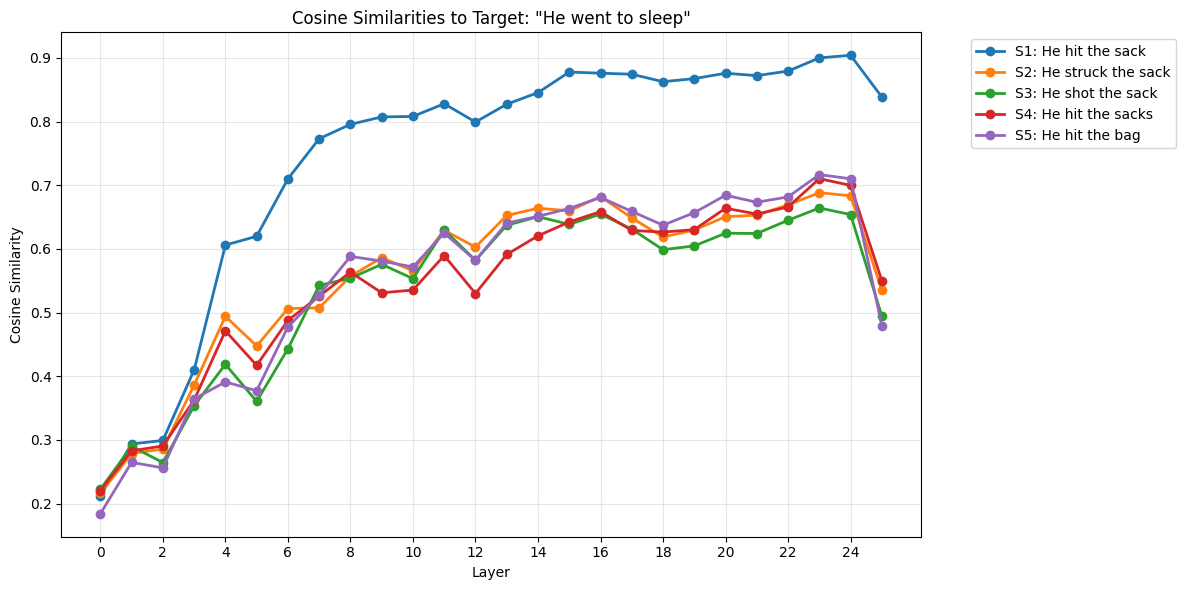

In [29]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["He hit the sack", "He struck the sack", "He shot the sack", "He hit the sacks", "He hit the bag"],
                                     target_sentence=target_text)

In [30]:
max_layer = 5
corrupted_texts = ["He struck the sack", "He shot the sack", "He hit the sacks", "He hit the bag"]

Threshold Sweep: 100%|██████████| 40/40 [04:04<00:00,  6.12s/it]


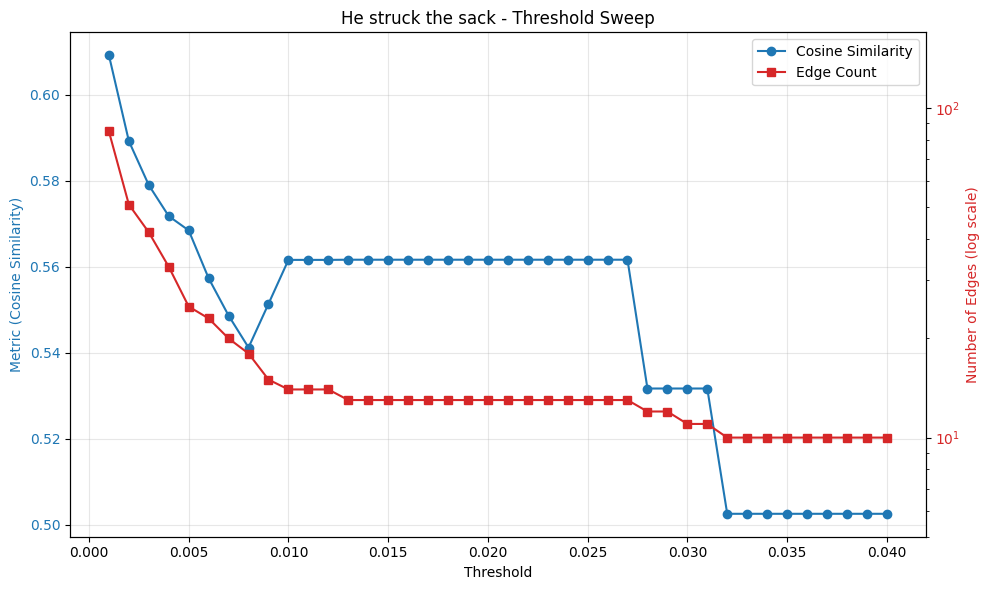

Threshold Sweep: 100%|██████████| 40/40 [04:33<00:00,  6.84s/it]


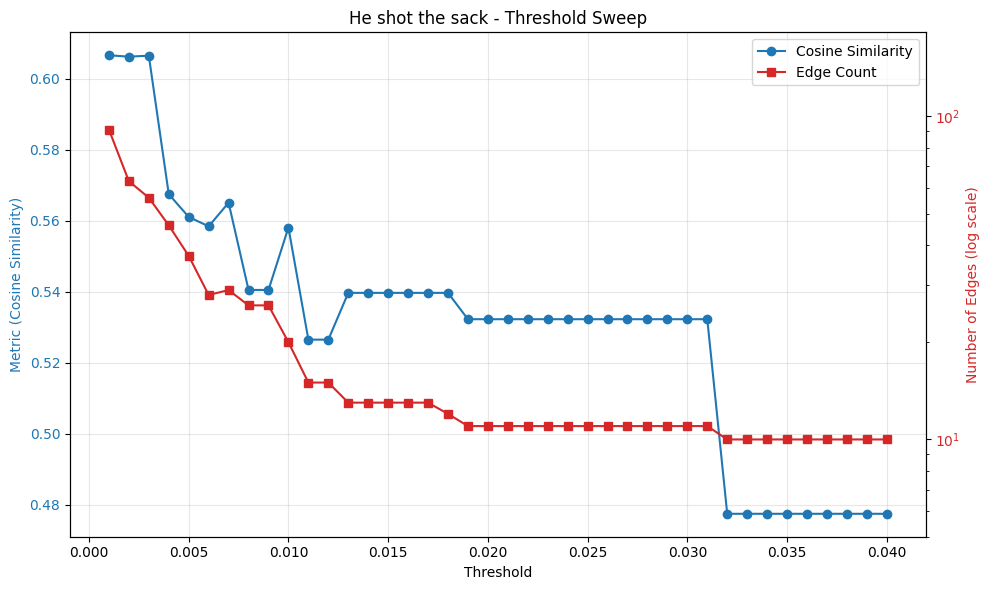

Threshold Sweep: 100%|██████████| 40/40 [03:01<00:00,  4.53s/it]


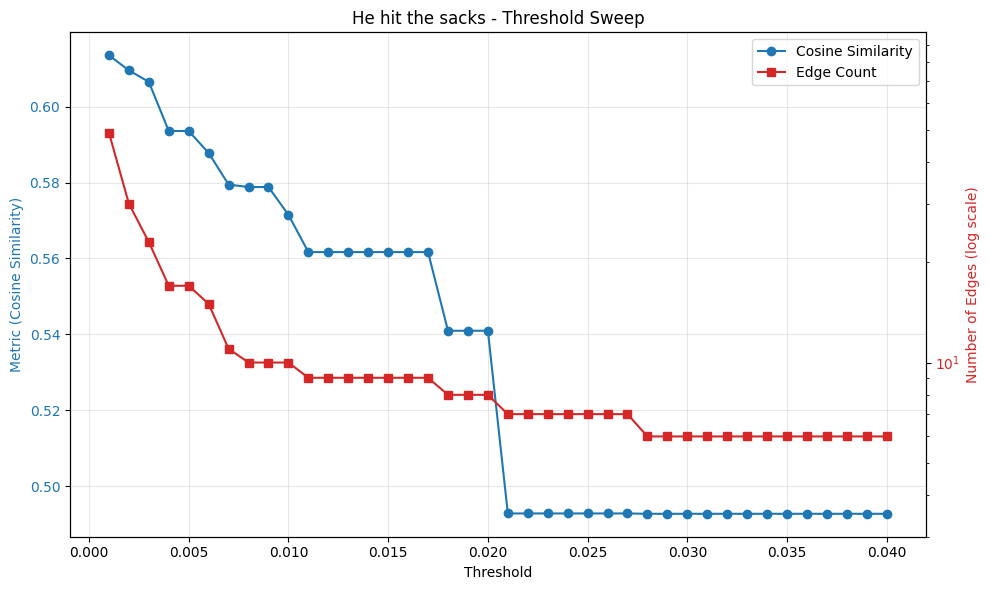

Threshold Sweep: 100%|██████████| 40/40 [03:24<00:00,  5.12s/it]


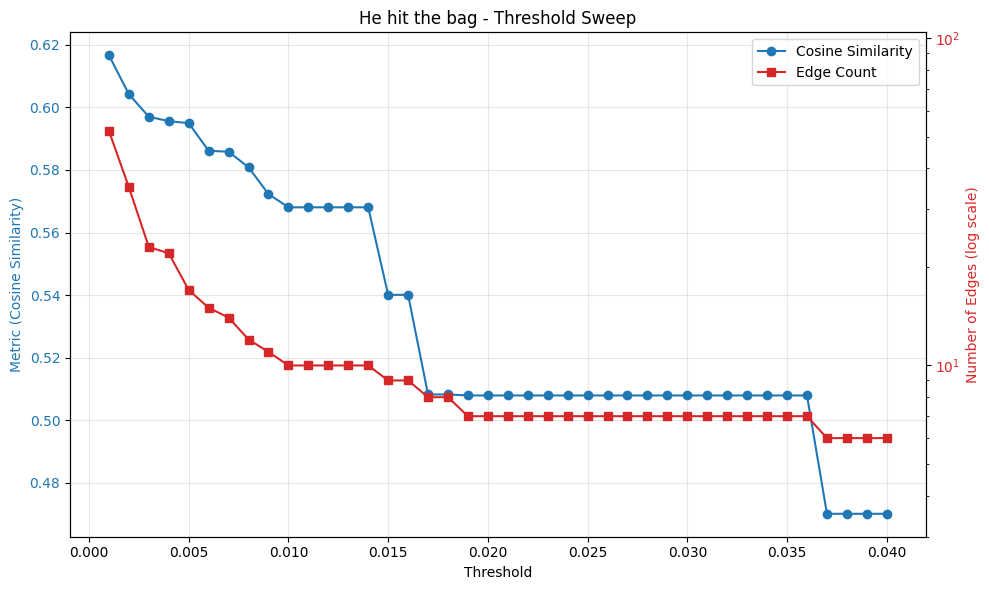

In [31]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=max_layer,
                                      original_text=original_text,
                                      corrupted_texts=corrupted_texts,
                                      target_text=target_text,
                                      min_token_pos=min_token_pos,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

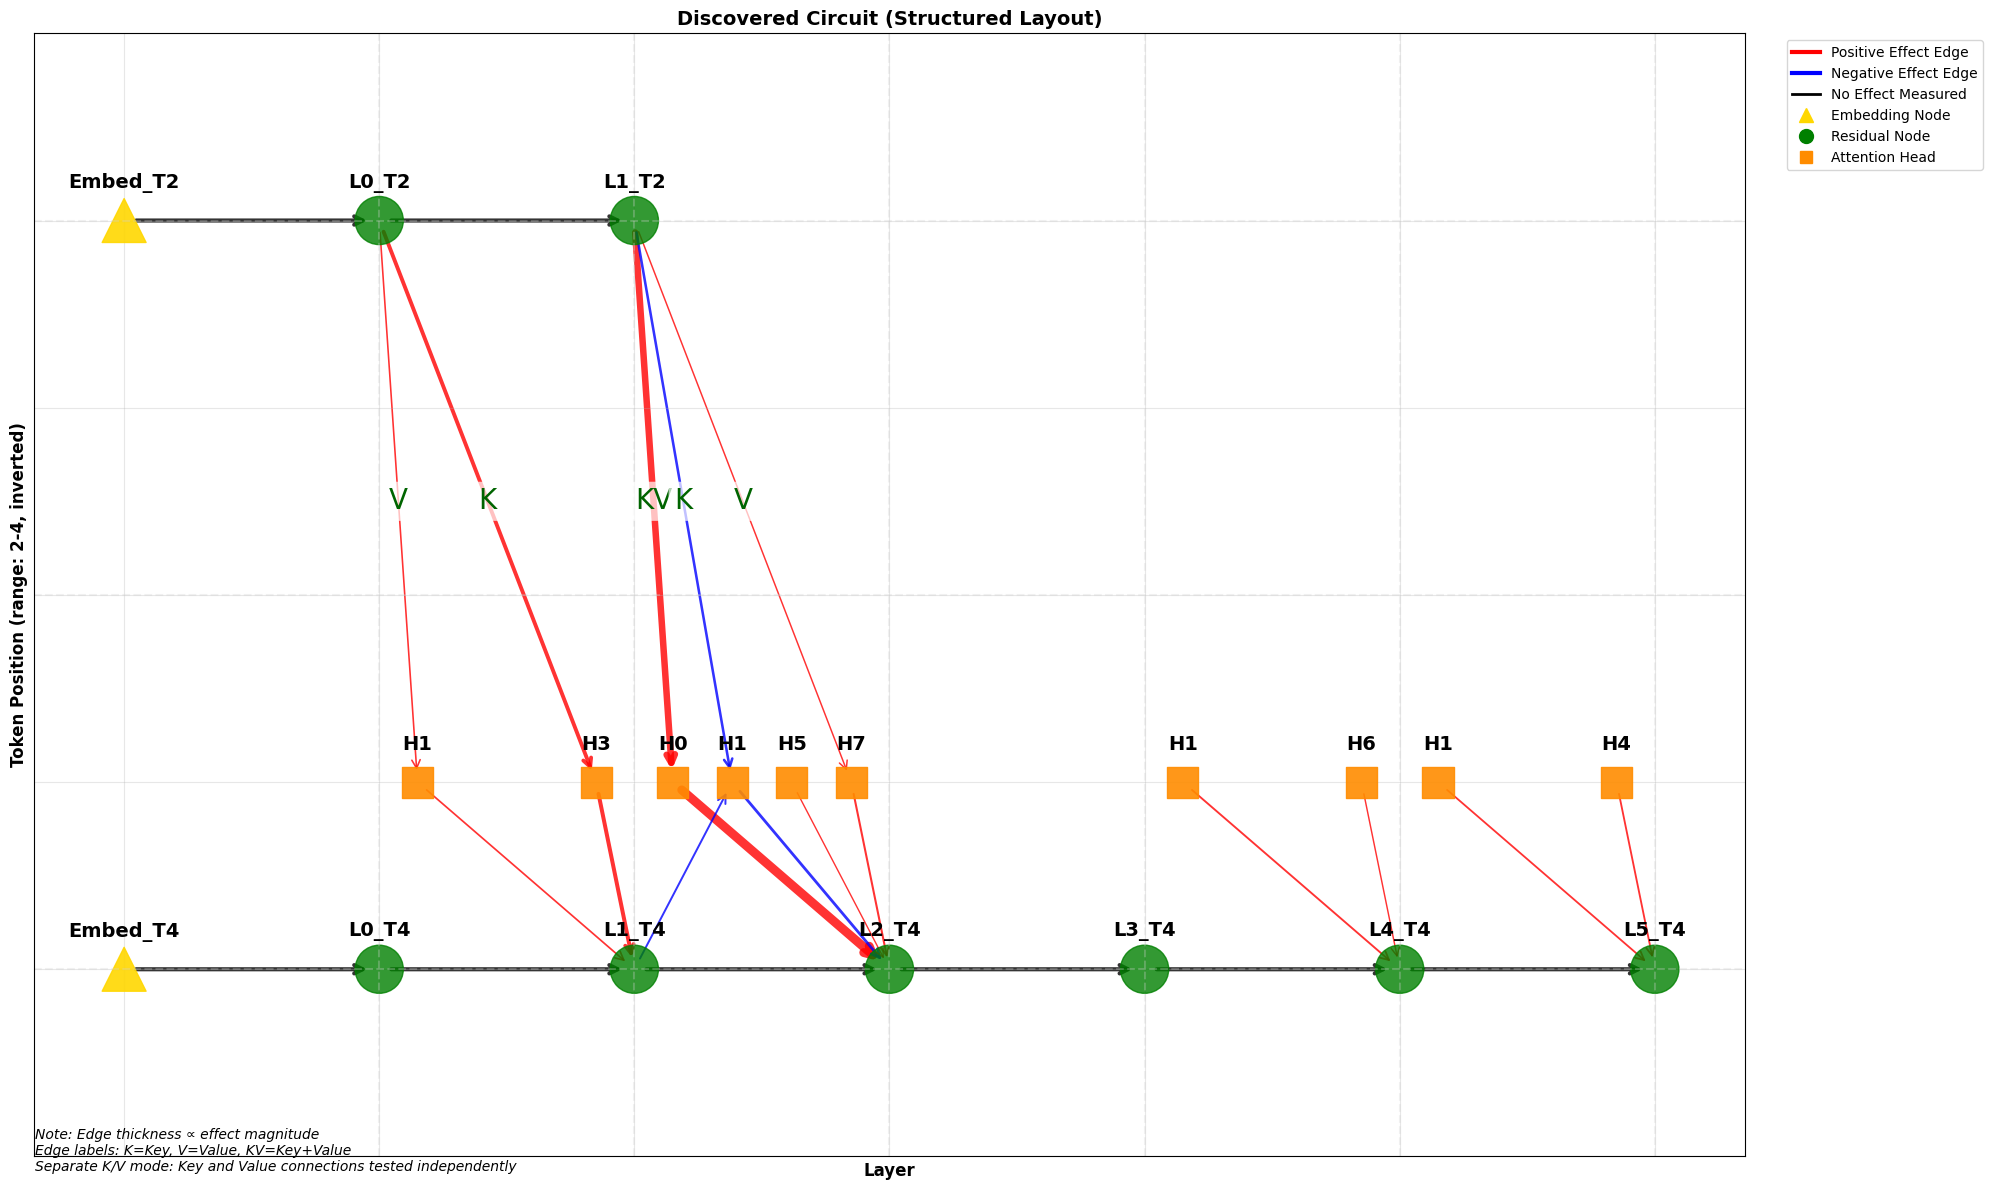

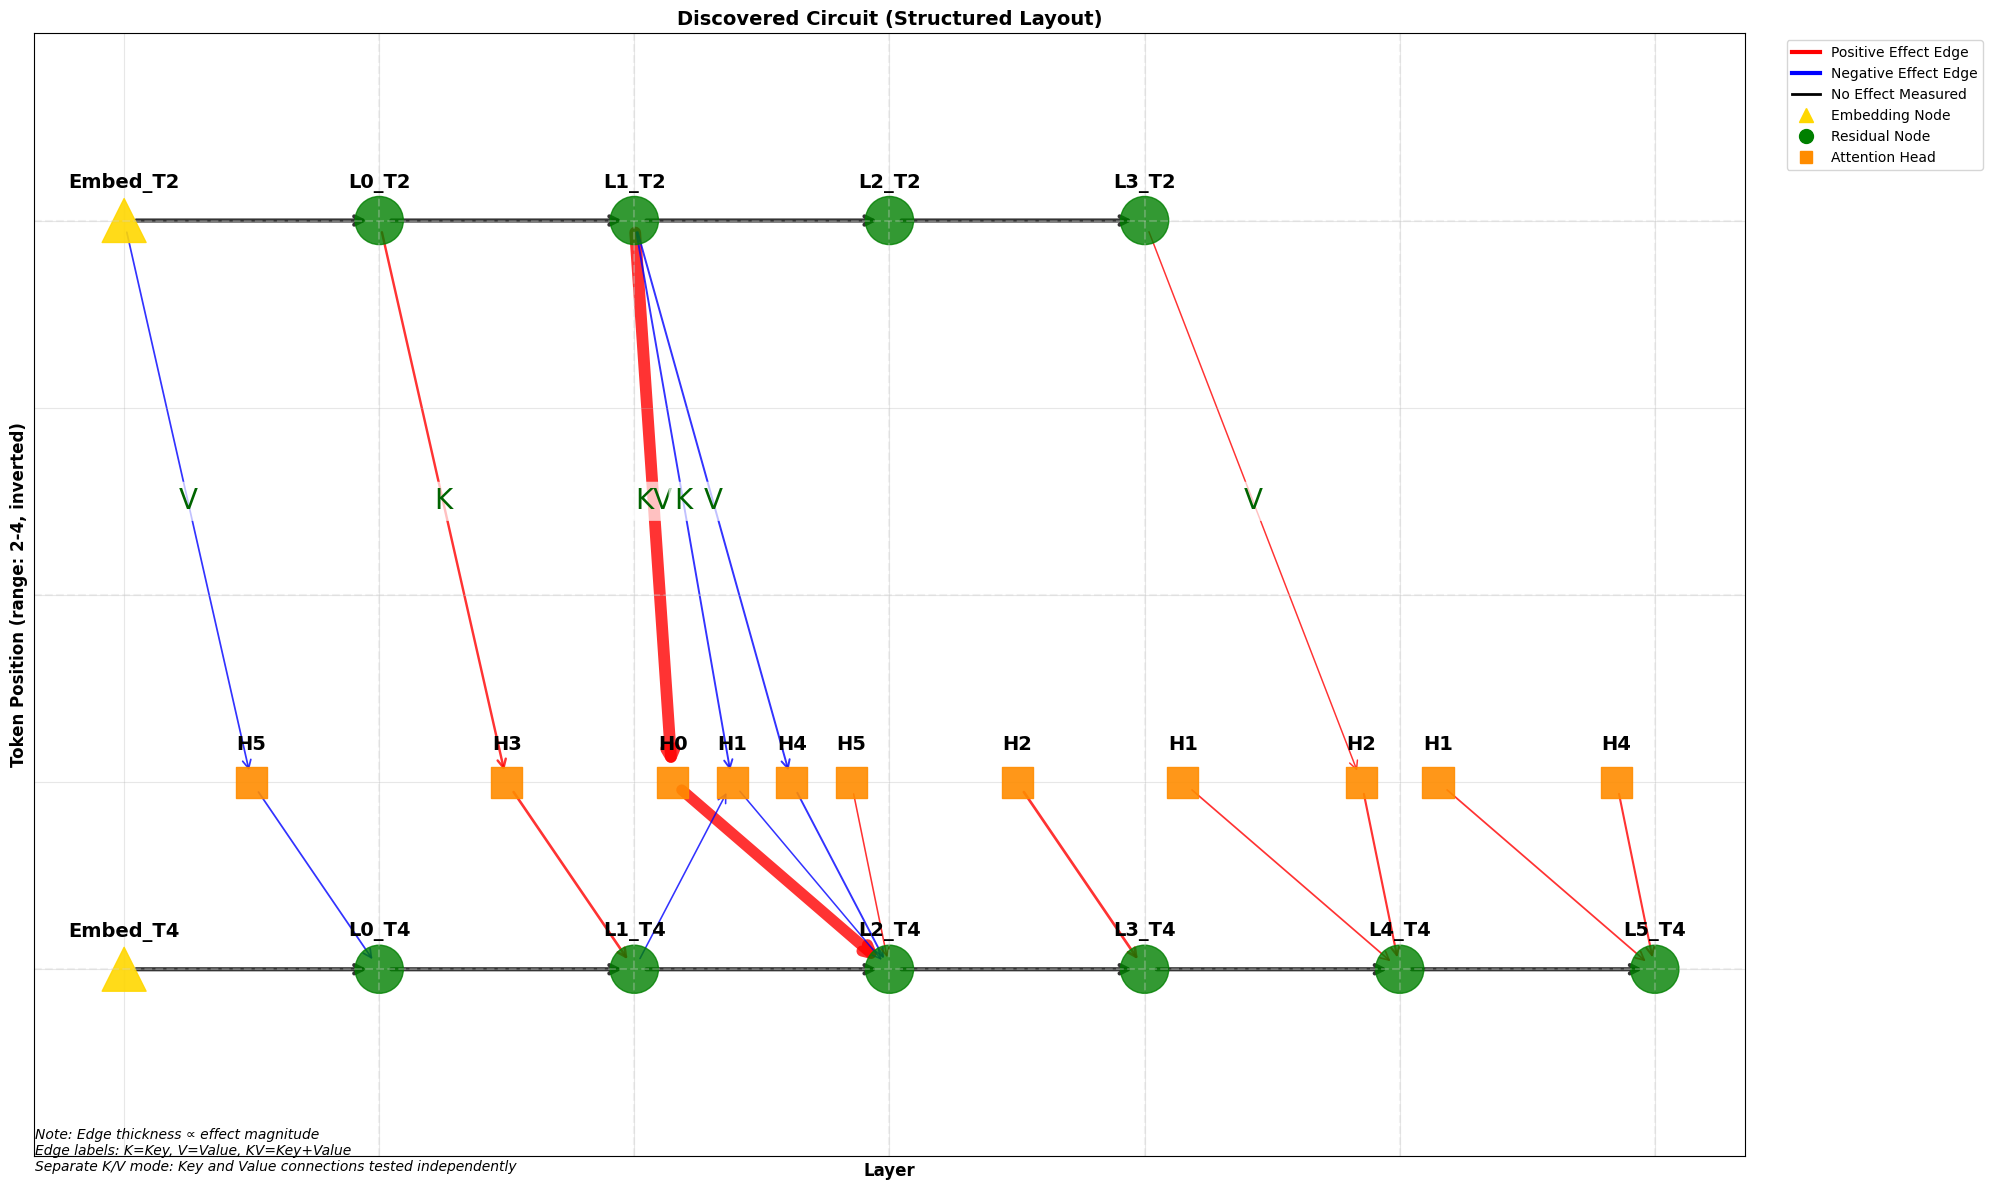

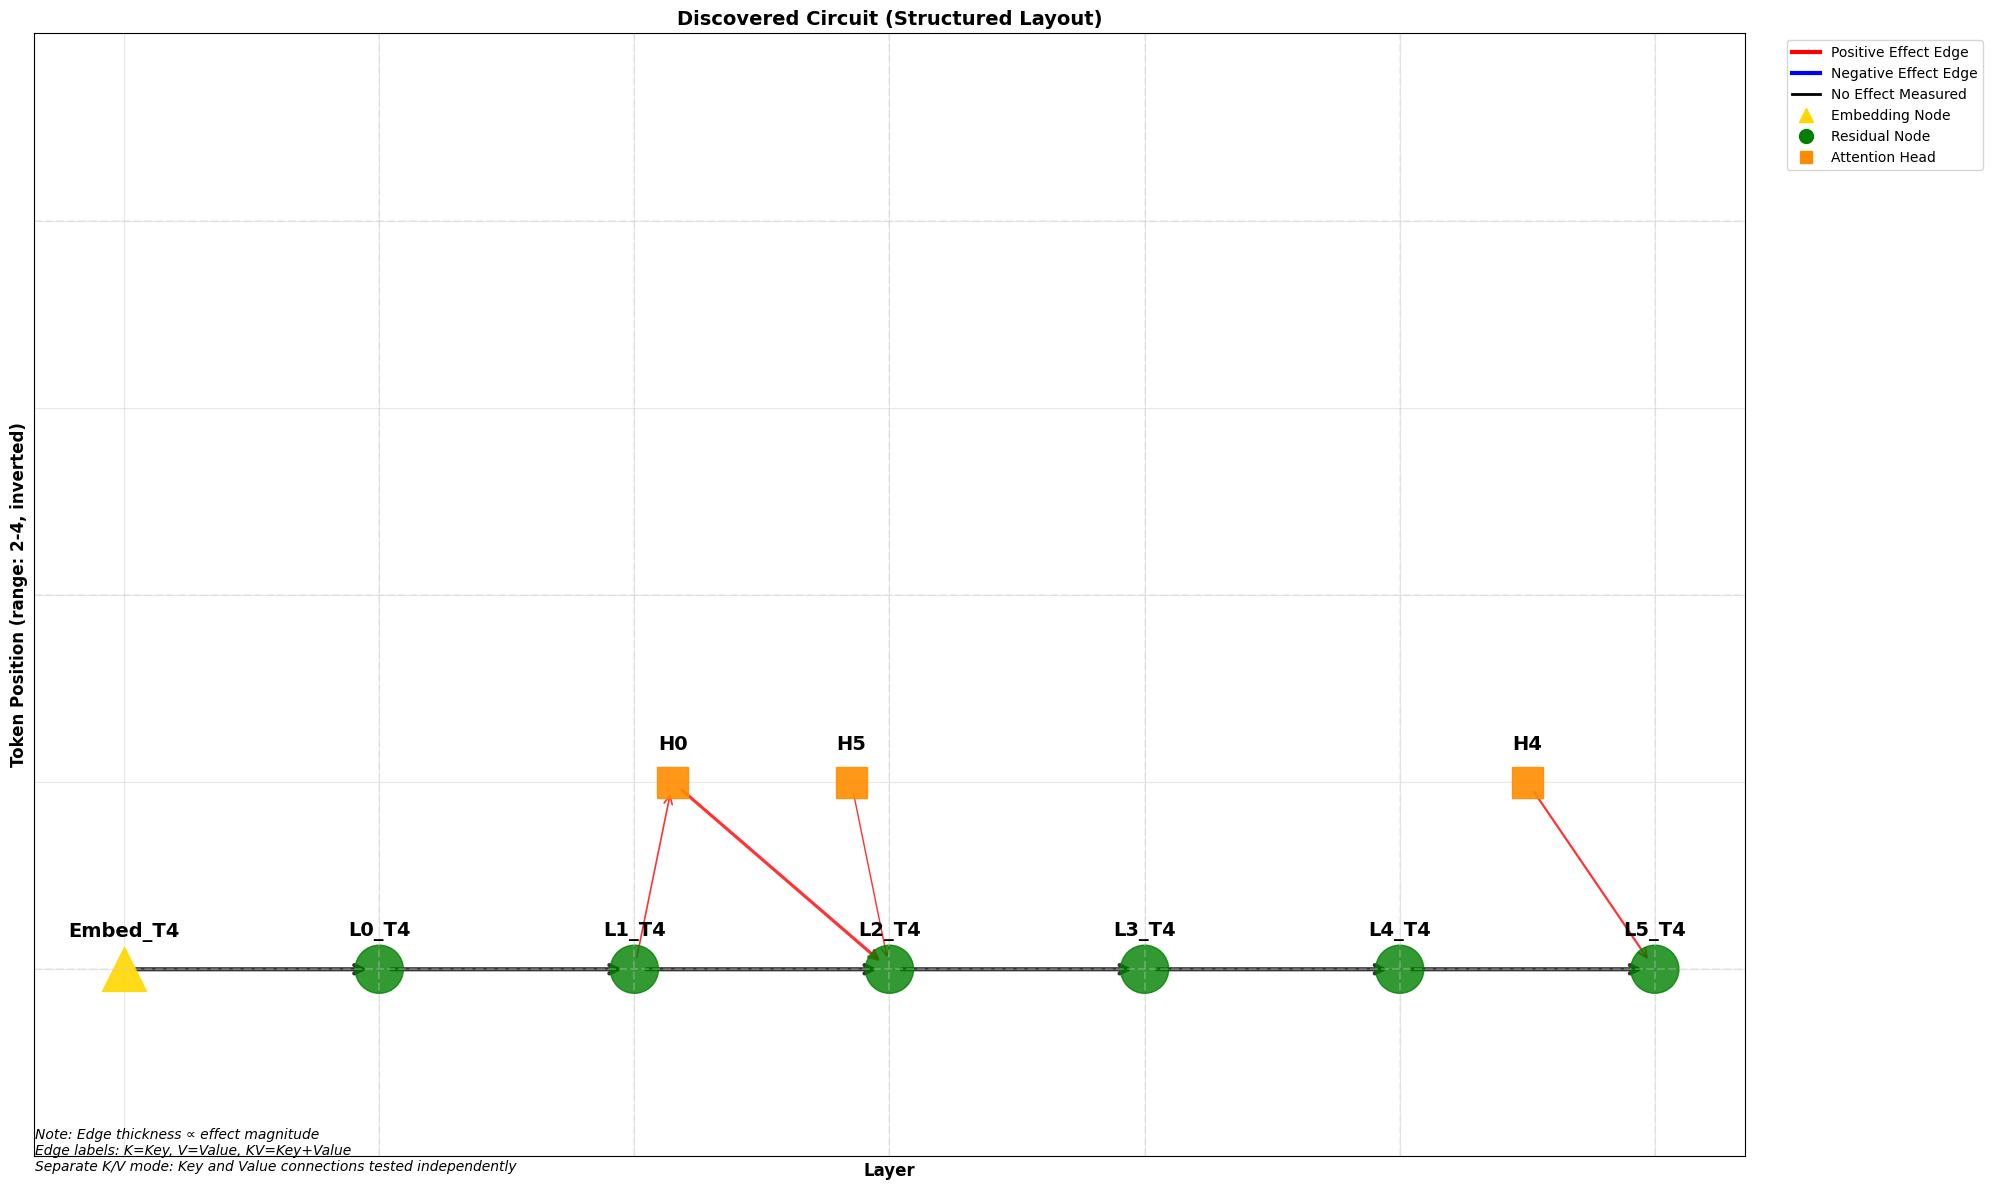

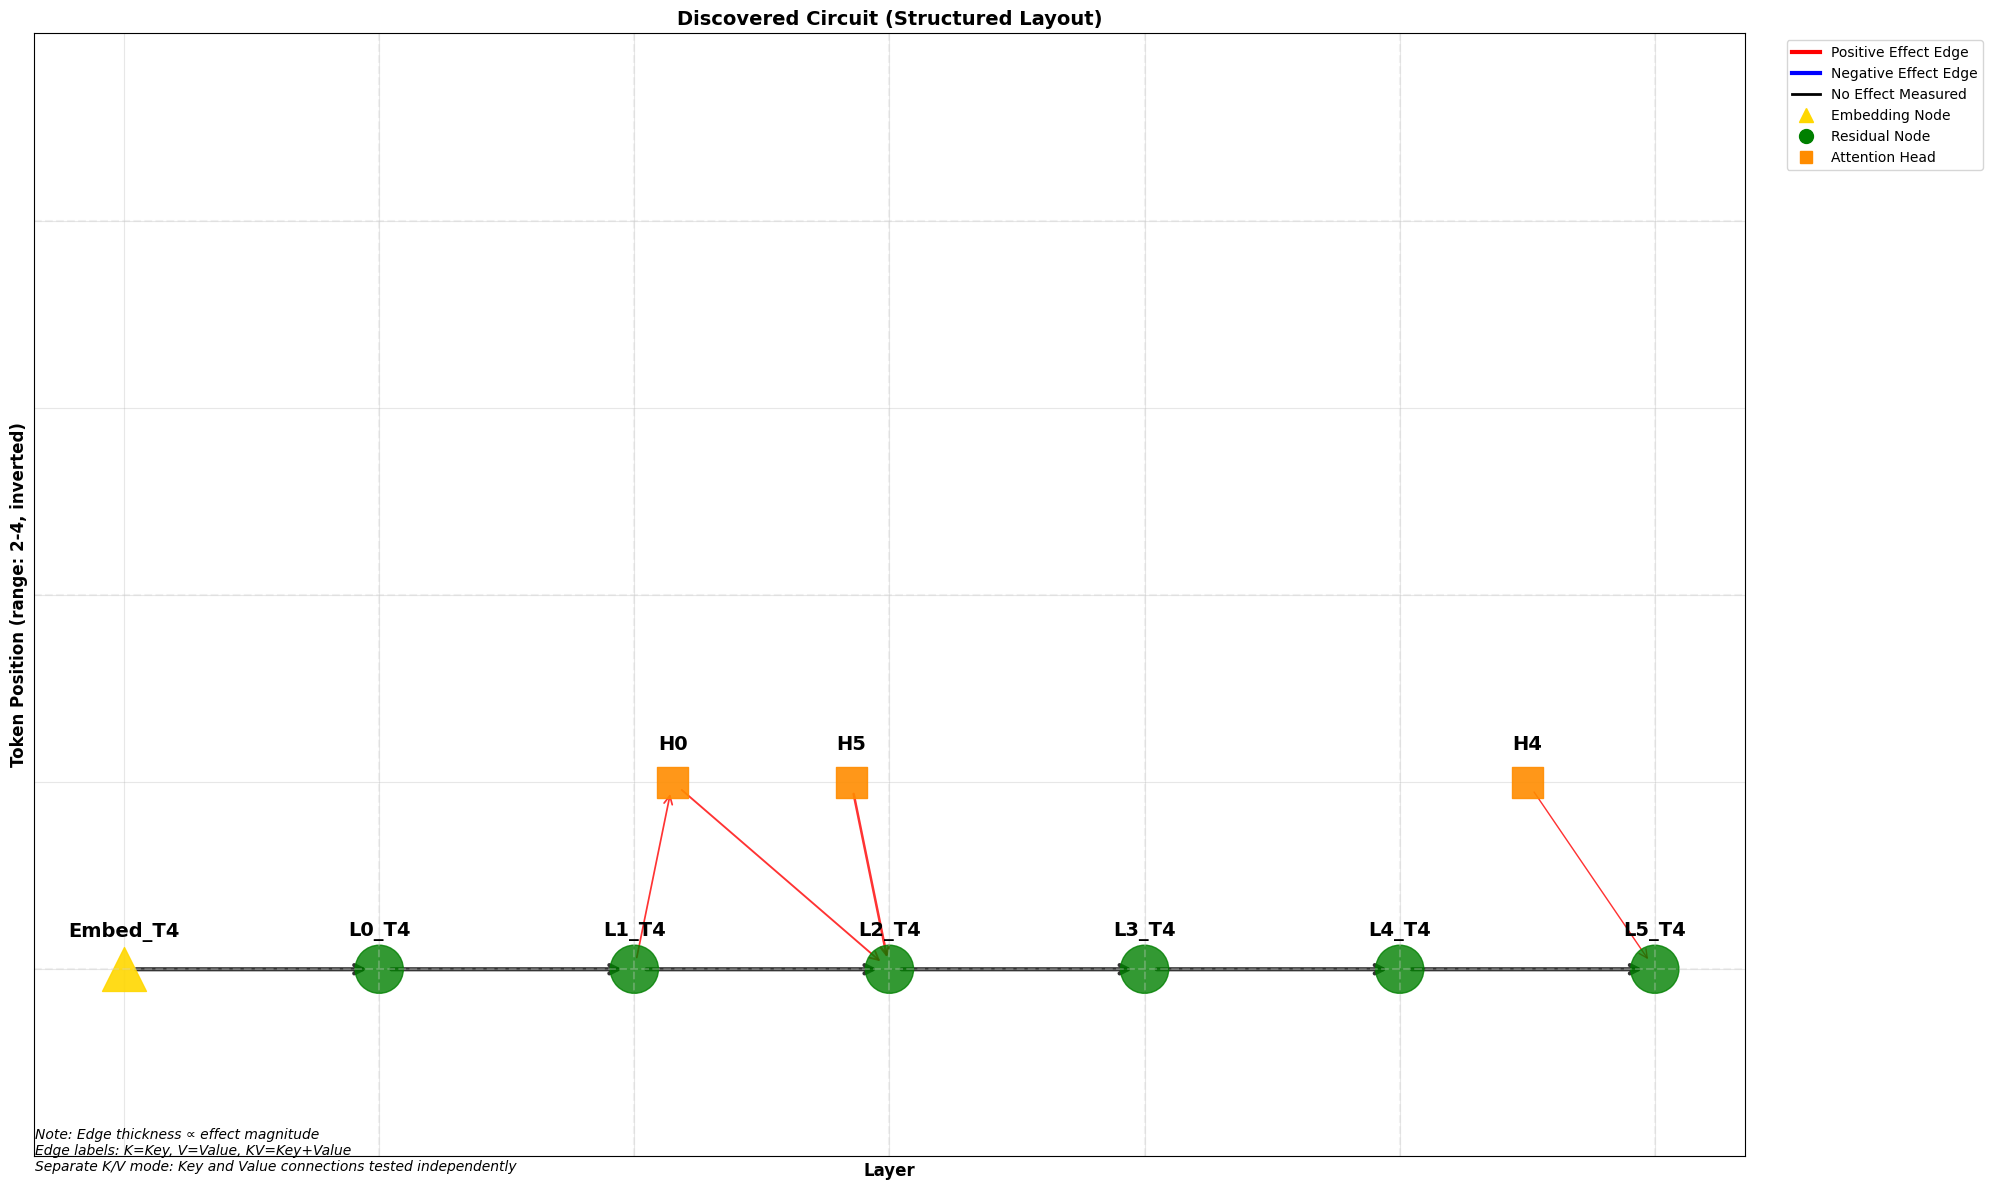

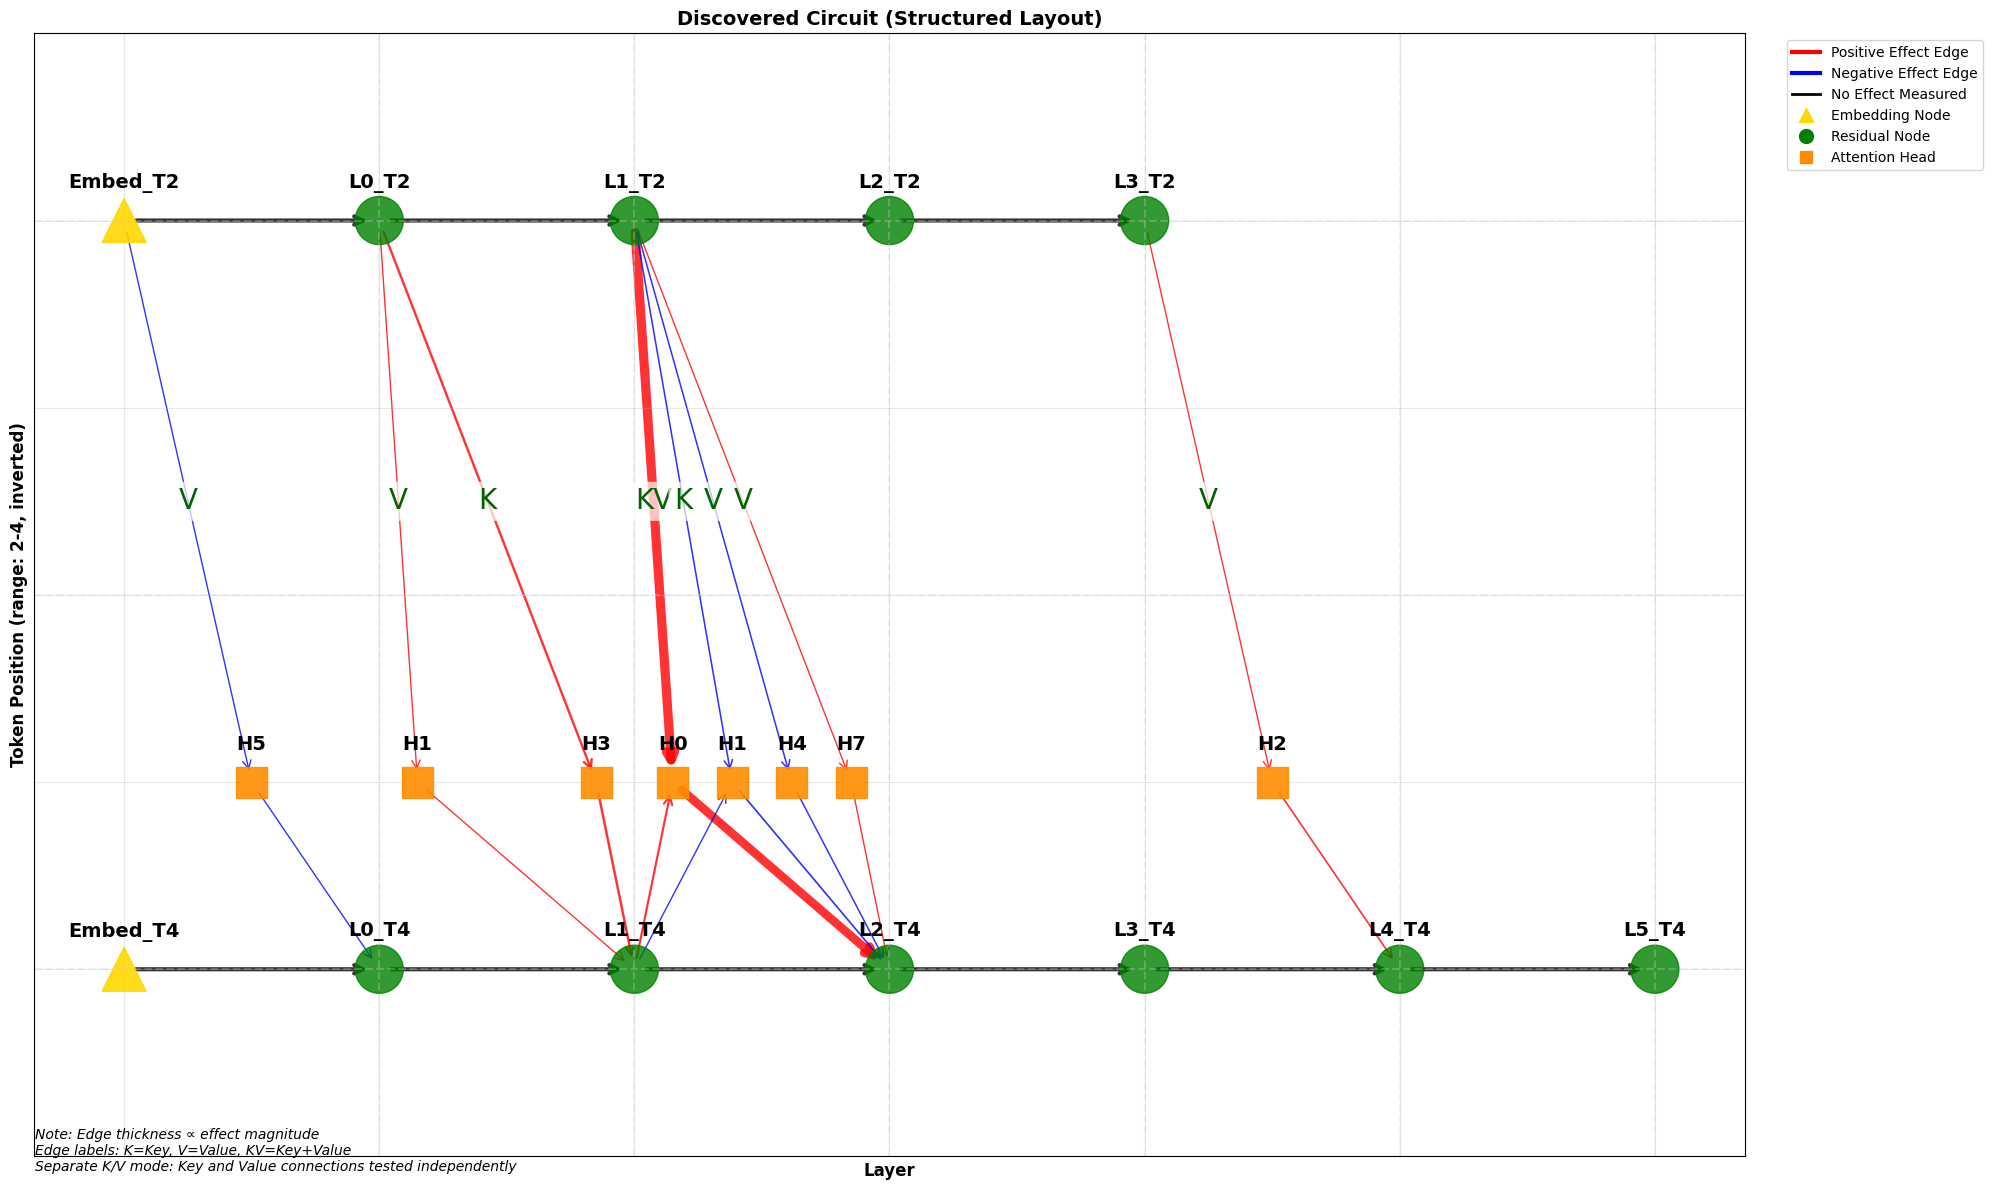


Circuit Summary:
Nodes: 20
Edges: 29

Edges by effect size:
  L1_T2 → L2H0_T4 (key): 0.1488
  L2H0_T4 → L2_T4 (attn_out): 0.1356
  L1_T2 → L2H0_T4 (value): 0.0401
  L1H3_T4 → L1_T4 (attn_out): 0.0226
  L0_T2 → L1H3_T4 (key): 0.0217
  L1_T4 → L2H0_T4 (query): 0.0191
  L2H1_T4 → L2_T4 (attn_out): -0.0135
  L4H2_T4 → L4_T4 (attn_out): 0.0132
  L1_T2 → L2H1_T4 (key): -0.0120
  L1_T2 → L2H4_T4 (value): -0.0116
  L2H4_T4 → L2_T4 (attn_out): -0.0113
  L0H5_T4 → L0_T4 (attn_out): -0.0099
  Embed_T2 → L0H5_T4 (value): -0.0096
  L2H7_T4 → L2_T4 (attn_out): 0.0088
  L1_T4 → L2H1_T4 (query): -0.0085
  L3_T2 → L4H2_T4 (value): 0.0077
  L1H1_T4 → L1_T4 (attn_out): 0.0068
  L0_T2 → L1H1_T4 (value): 0.0062
  L1_T2 → L2H7_T4 (value): 0.0055


In [ ]:
thresholds = [0.005, 0.007, 0.009, 0.014]

merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=max_layer,
    original_text=original_text,
    corrupted_texts=corrupted_texts,
    target_text=target_text,
    thresholds=thresholds,
    min_token_pos=min_token_pos,
    corrupt_q=True,
    separate_kv=True,
    quiet=True,
    visualize_individual=True
    # save_individual_paths=[
    #     "circuits/individual_circuit_1.png",
    #     "circuits/individual_circuit_2.png"
    # ]
)

acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=max_layer, threshold=min(thresholds), corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=min_token_pos)

In [35]:
all_texts = [original_text] + corrupted_texts
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=4,
    k_index=2  
)

Computing Q-K dot products for Layer 0, Head 5 (Q@4, K@2):
Q token at position 4: ' sack'
K token at position 2: ' hit'
--------------------------------------------------------------------------------
'He hit the sack' -> 44.102135
'He struck the sack' -> 31.175905
'He shot the sack' -> 49.194000
'He hit the sacks' -> 36.436073
'He hit the bag' -> 28.622847
--------------------------------------------------------------------------------


# Call it a Day (not great...)

In [19]:
original_text = "Let's call it a day"
min_token_pos = 4
# target_text="Let's stop working"
target_text="Let's give up"
print(f"Original text tokens: {gemma_utils.detokenize(model, original_text)}")
print(f"Token at position {min_token_pos}: '{gemma_utils.detokenize(model, original_text)[min_token_pos]}'")

_ = gemma_utils.find_similar_tokens_by_embedding(model, ' call', top_k=50)
_ = gemma_utils.find_similar_tokens_by_embedding(model, ' day', top_k=50)

Original text tokens: ['<bos>', 'Let', "'", 's', ' call', ' it', ' a', ' day']
Token at position 4: ' call'
Target token: ' call' (ID: 2409)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 50 tokens most similar to ' call':
------------------------------------------------------------
 1. Token ID   2409: ' call' (similarity: 1.0000)
 2. Token ID  10342: ' Call' (similarity: 0.8126)
 3. Token ID   4925: 'call' (similarity: 0.8124)
 4. Token ID   5337: 'Call' (similarity: 0.7636)
 5. Token ID  41439: ' CALL' (similarity: 0.7059)
 6. Token ID   9712: ' calls' (similarity: 0.7057)
 7. Token ID  27799: 'CALL' (similarity: 0.6188)
 8. Token ID  11816: ' calling' (similarity: 0.6099)
 9. Token ID  51292: 'calls' (similarity: 0.5024)
10. Token ID  66781: ' Calls' (similarity: 0.4874)
11. Token ID   3151: ' called' (similarity: 0.4773)
12. Token ID  66084: 'Calls' (similarity: 0.4521)
13. Token ID  48049: '调用' (similarity: 0.4326)
14. Token ID 

Analyzing similarities to target sentence: 'Let's give up'
Comparing 6 sentences across layers...


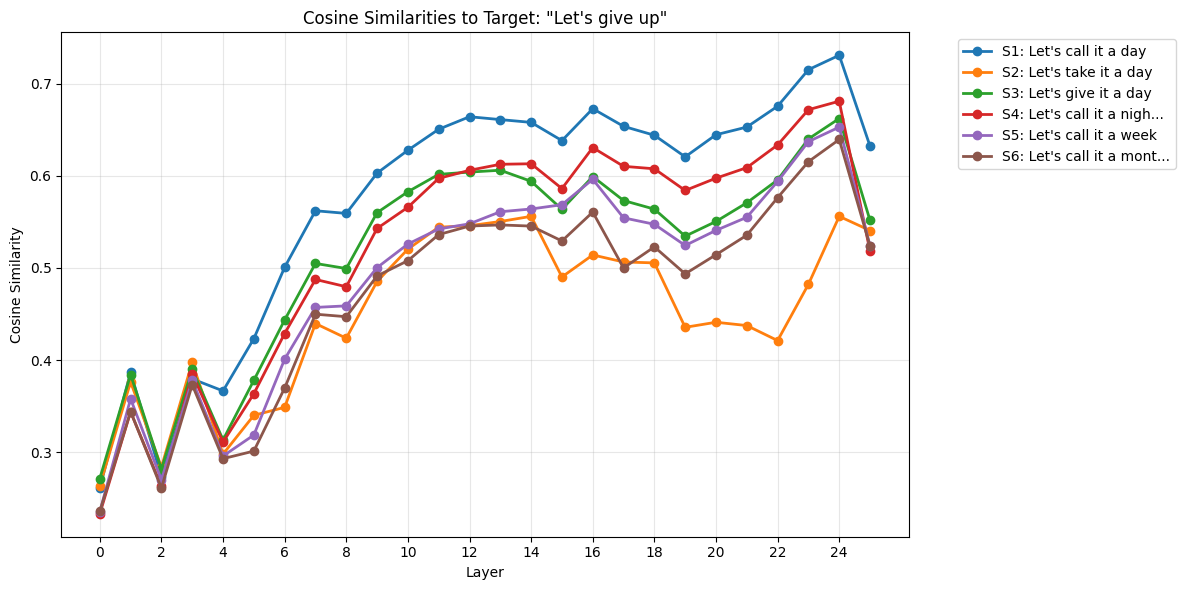

In [20]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["Let's call it a day", "Let's take it a day", "Let's give it a day", "Let's call it a night", "Let's call it a week", "Let's call it a month"],
                                     target_sentence=target_text)

In [39]:
max_layer = 4
corrupted_texts = ["Let's take it a day", "Let's give it a day", "Let's call it a night", "Let's call it a week"]

Threshold Sweep: 100%|██████████| 20/20 [01:49<00:00,  5.49s/it]


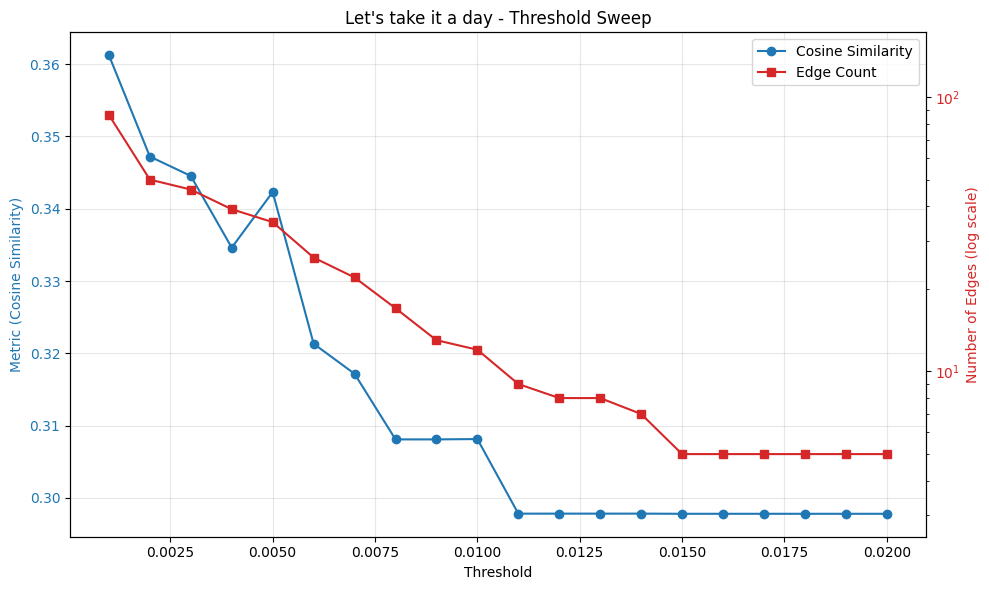

Threshold Sweep: 100%|██████████| 20/20 [01:55<00:00,  5.75s/it]


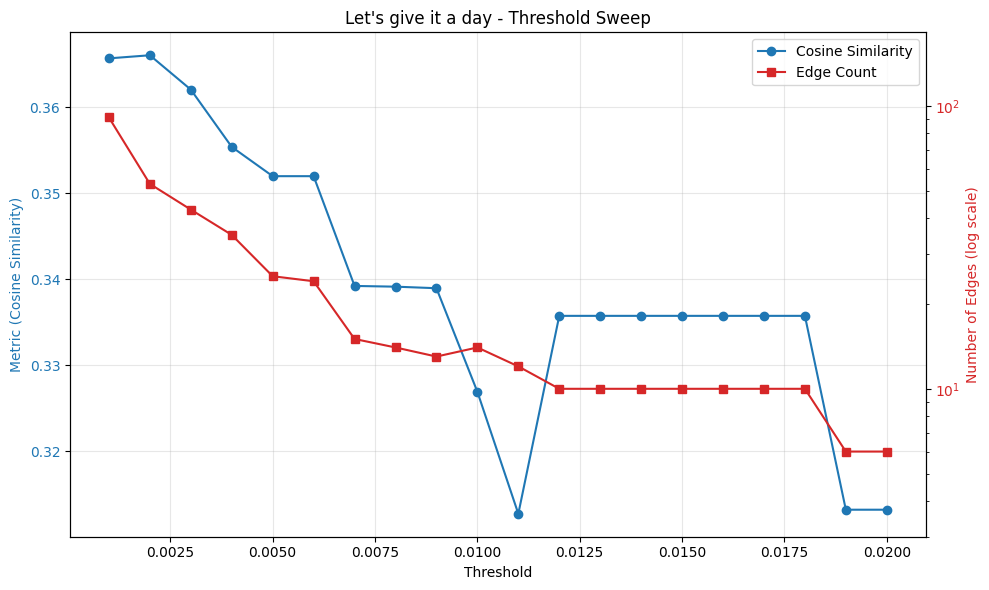

Threshold Sweep: 100%|██████████| 20/20 [00:55<00:00,  2.78s/it]


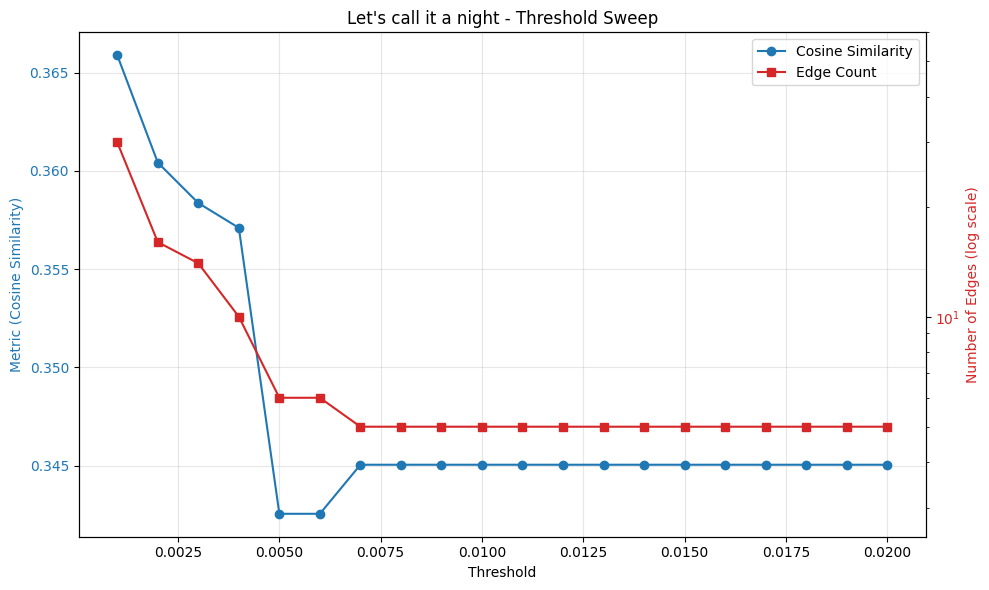

Threshold Sweep: 100%|██████████| 20/20 [01:00<00:00,  3.04s/it]


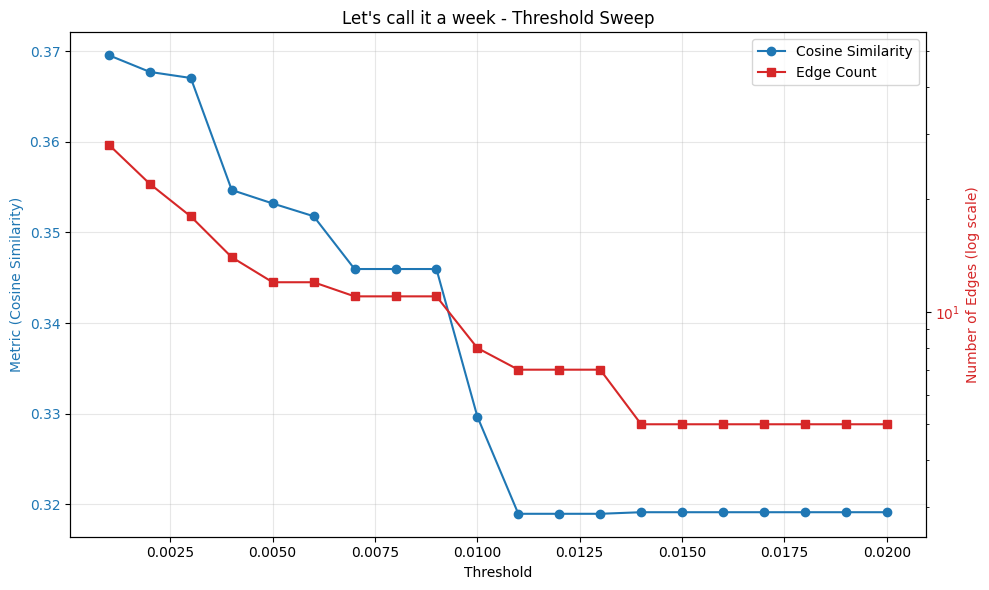

In [ ]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=max_layer,
                                      original_text=original_text,
                                      corrupted_texts=corrupted_texts,
                                      target_text=target_text,
                                      min_token_pos=min_token_pos,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

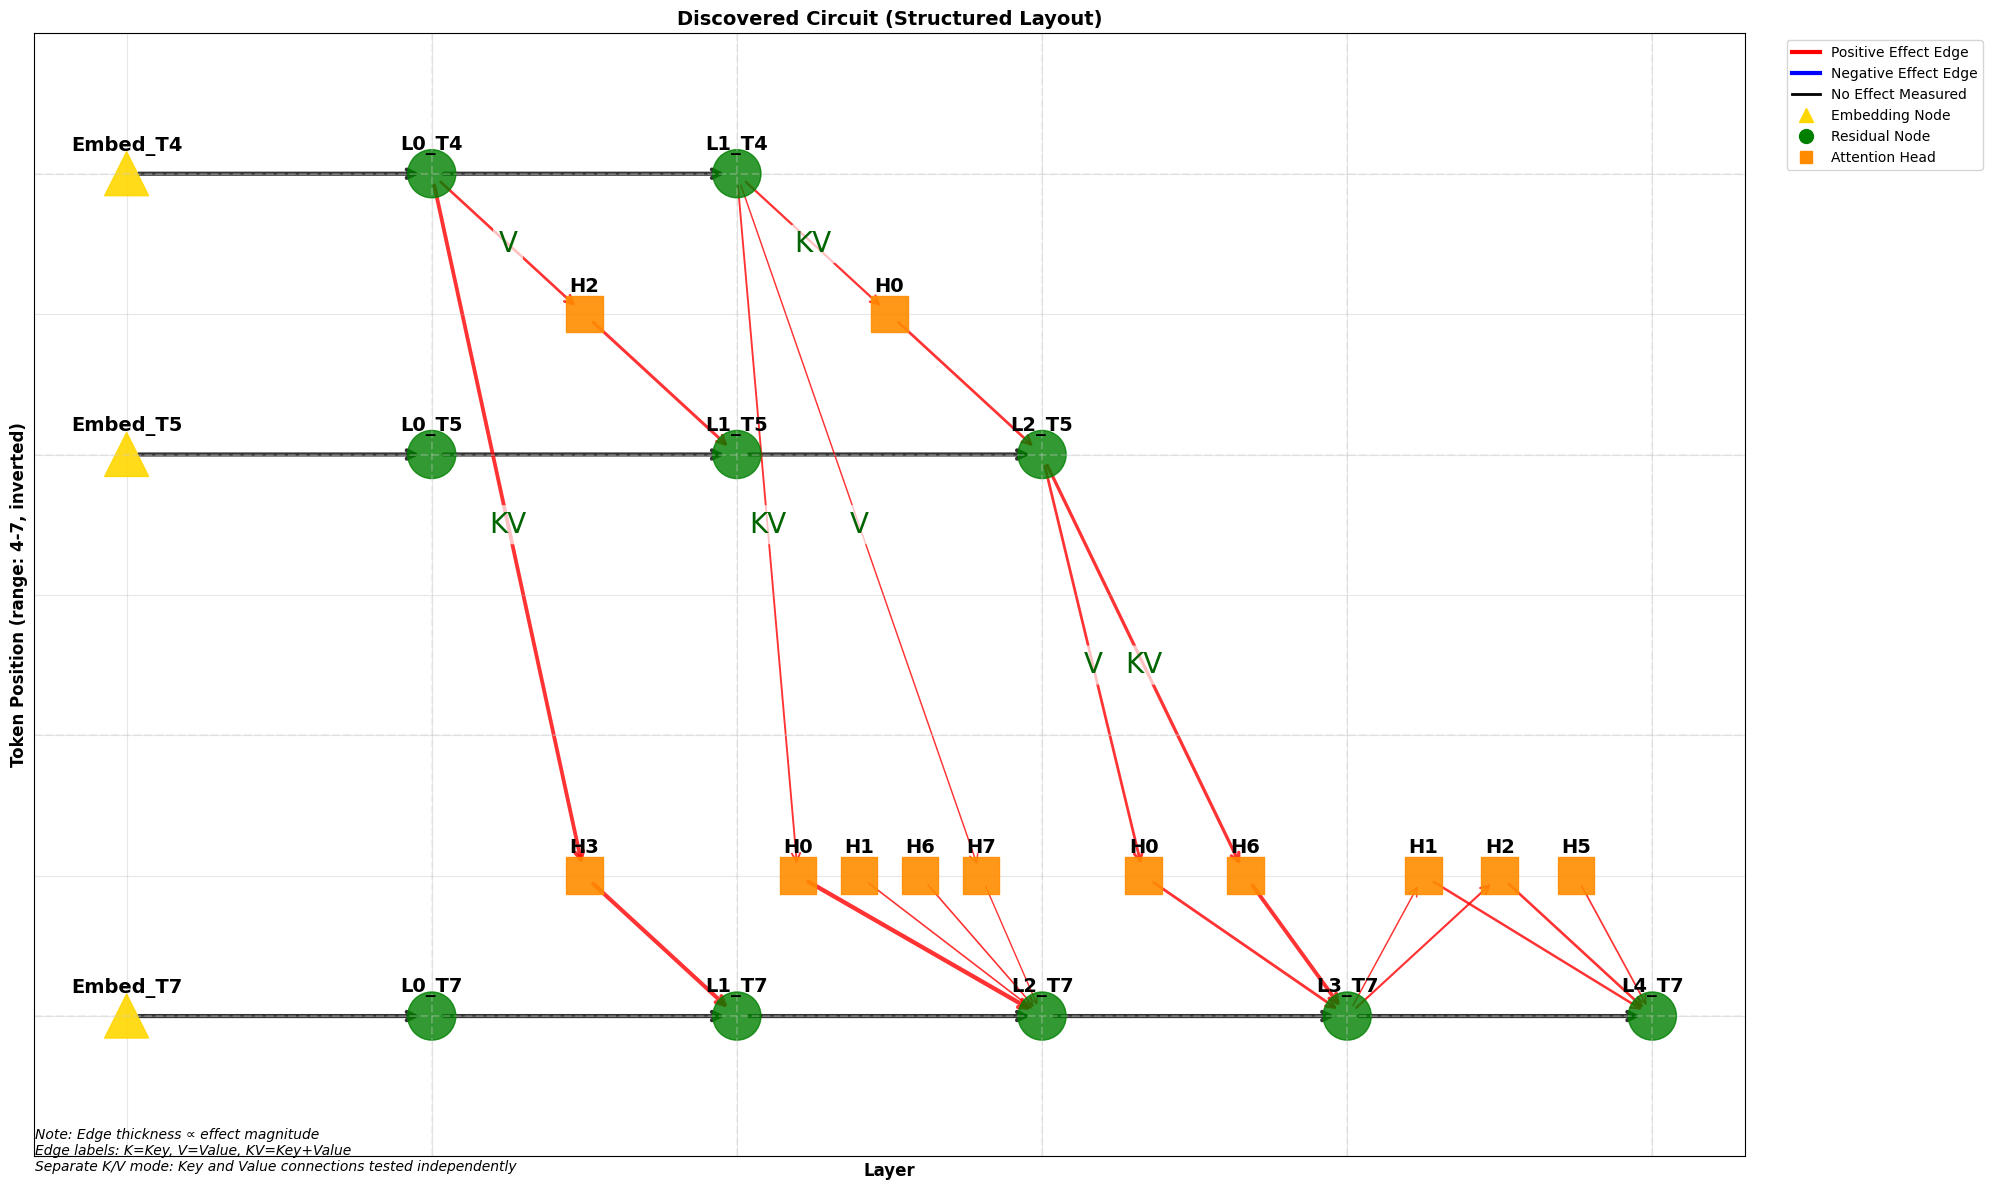

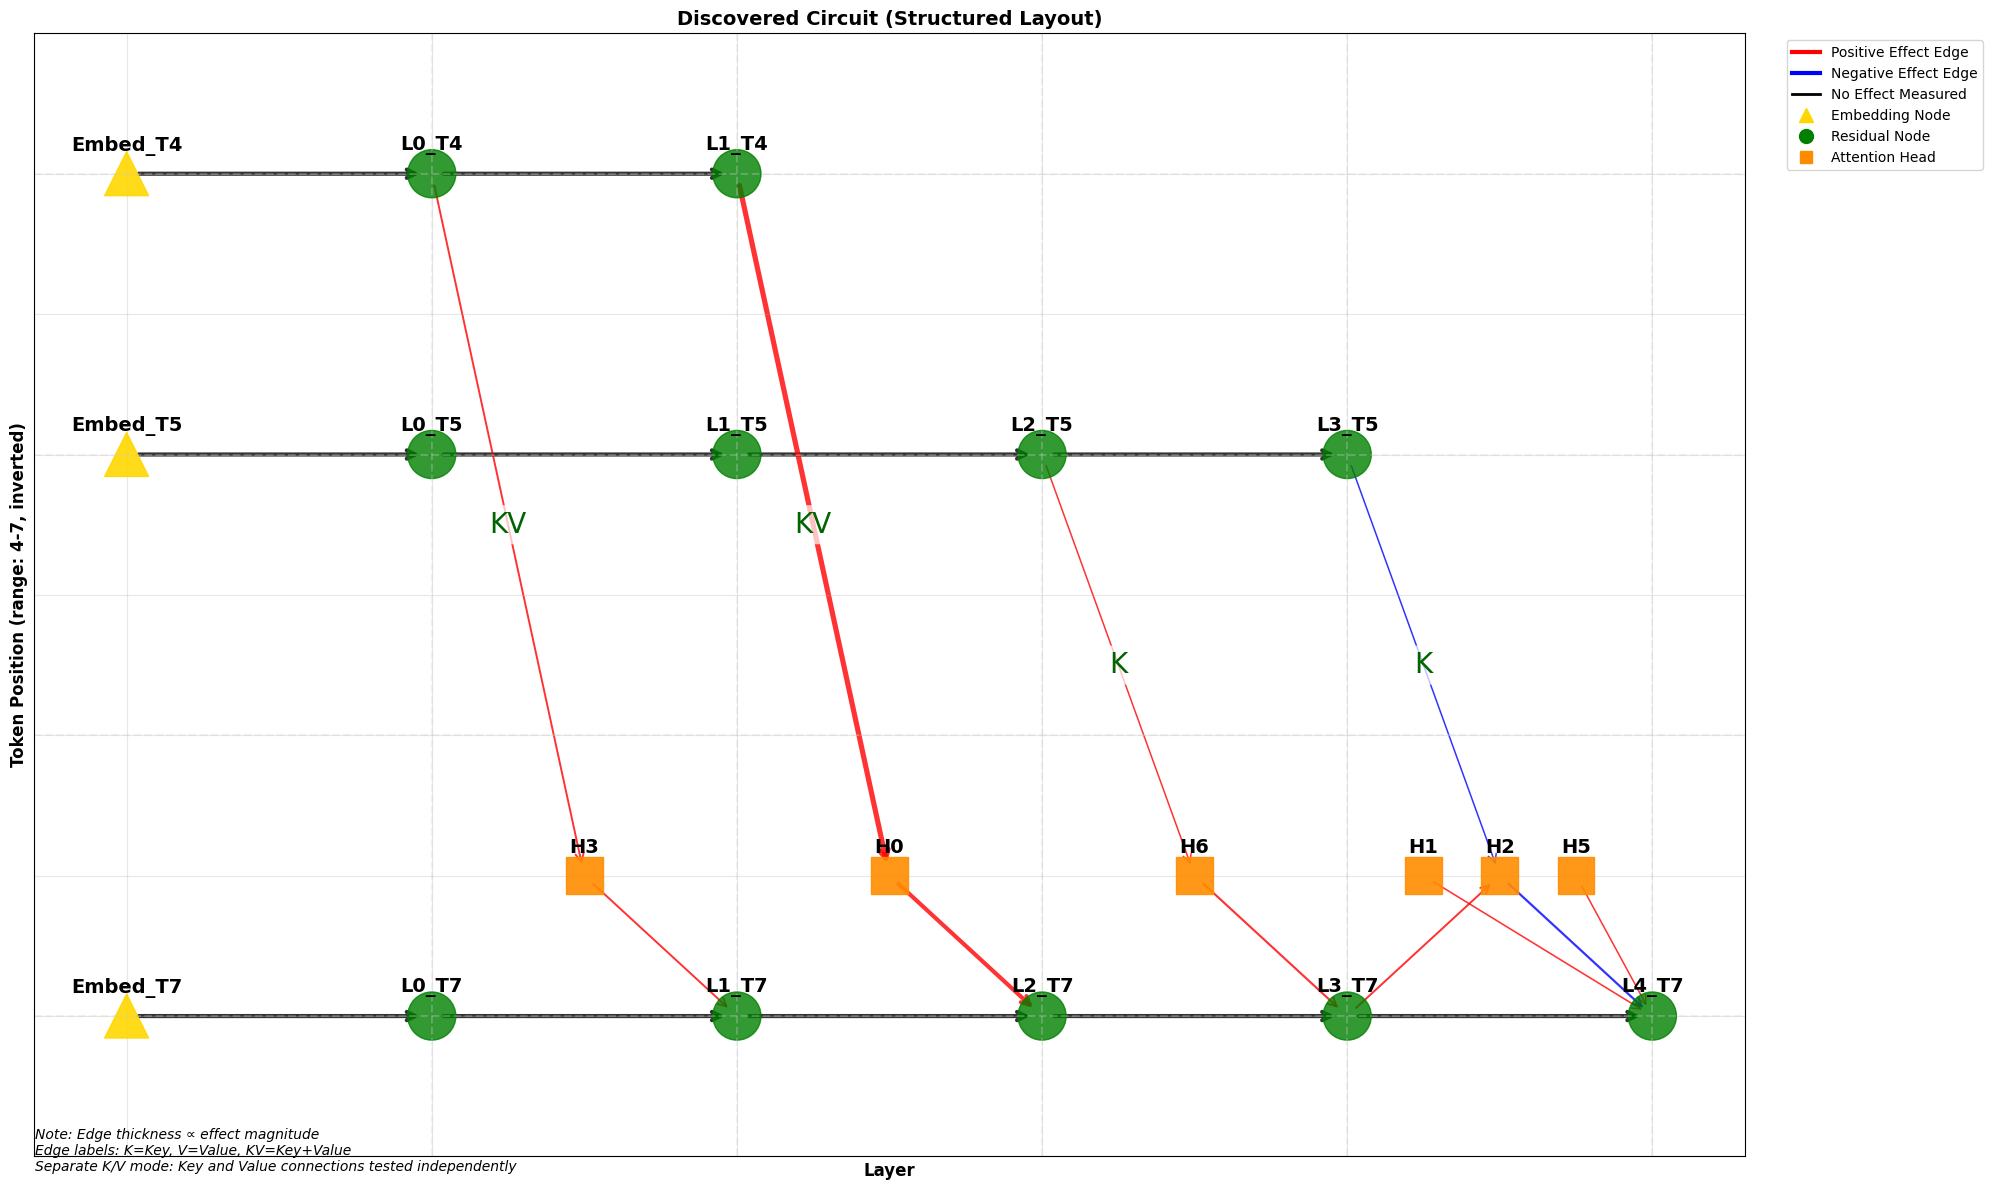

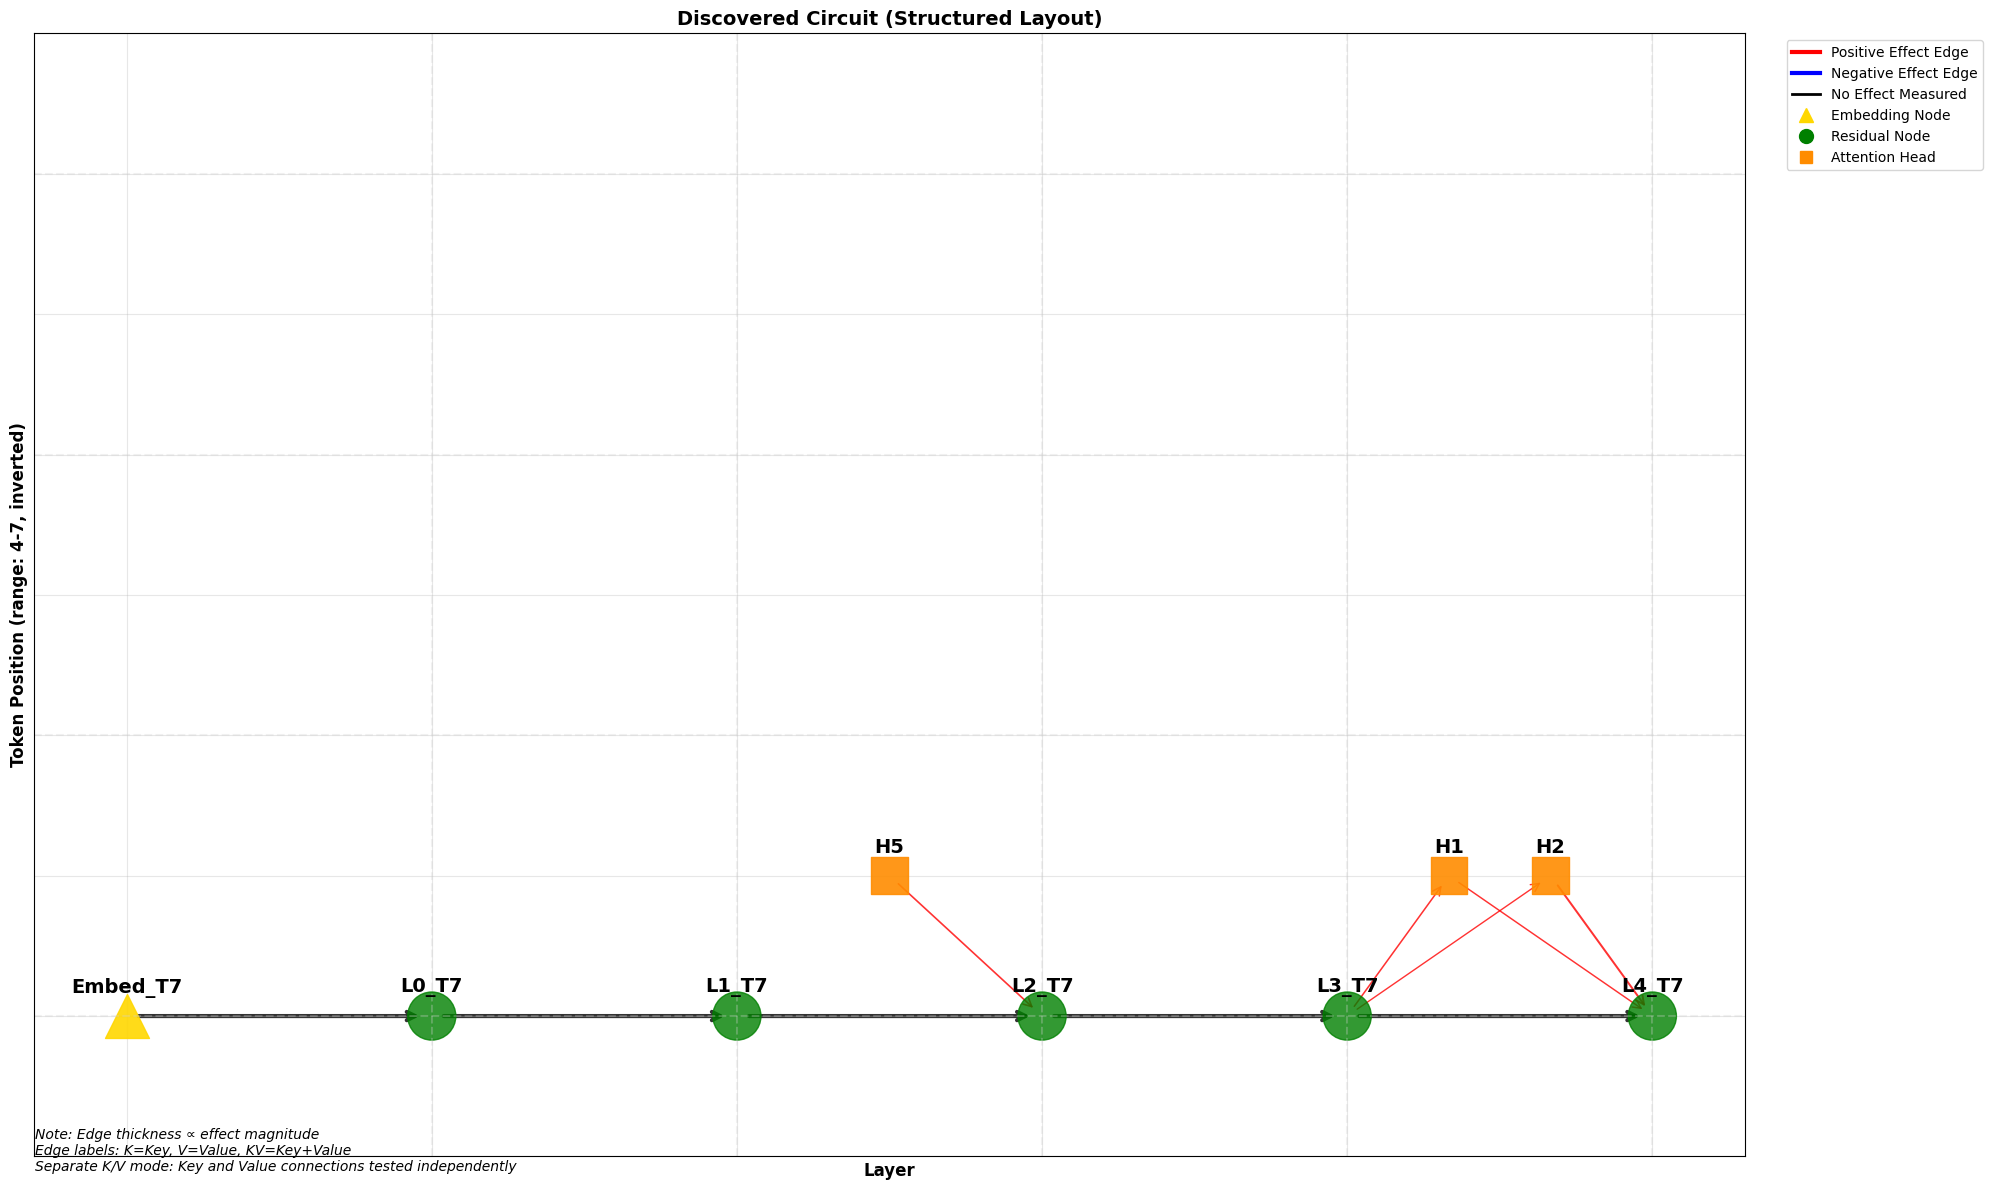

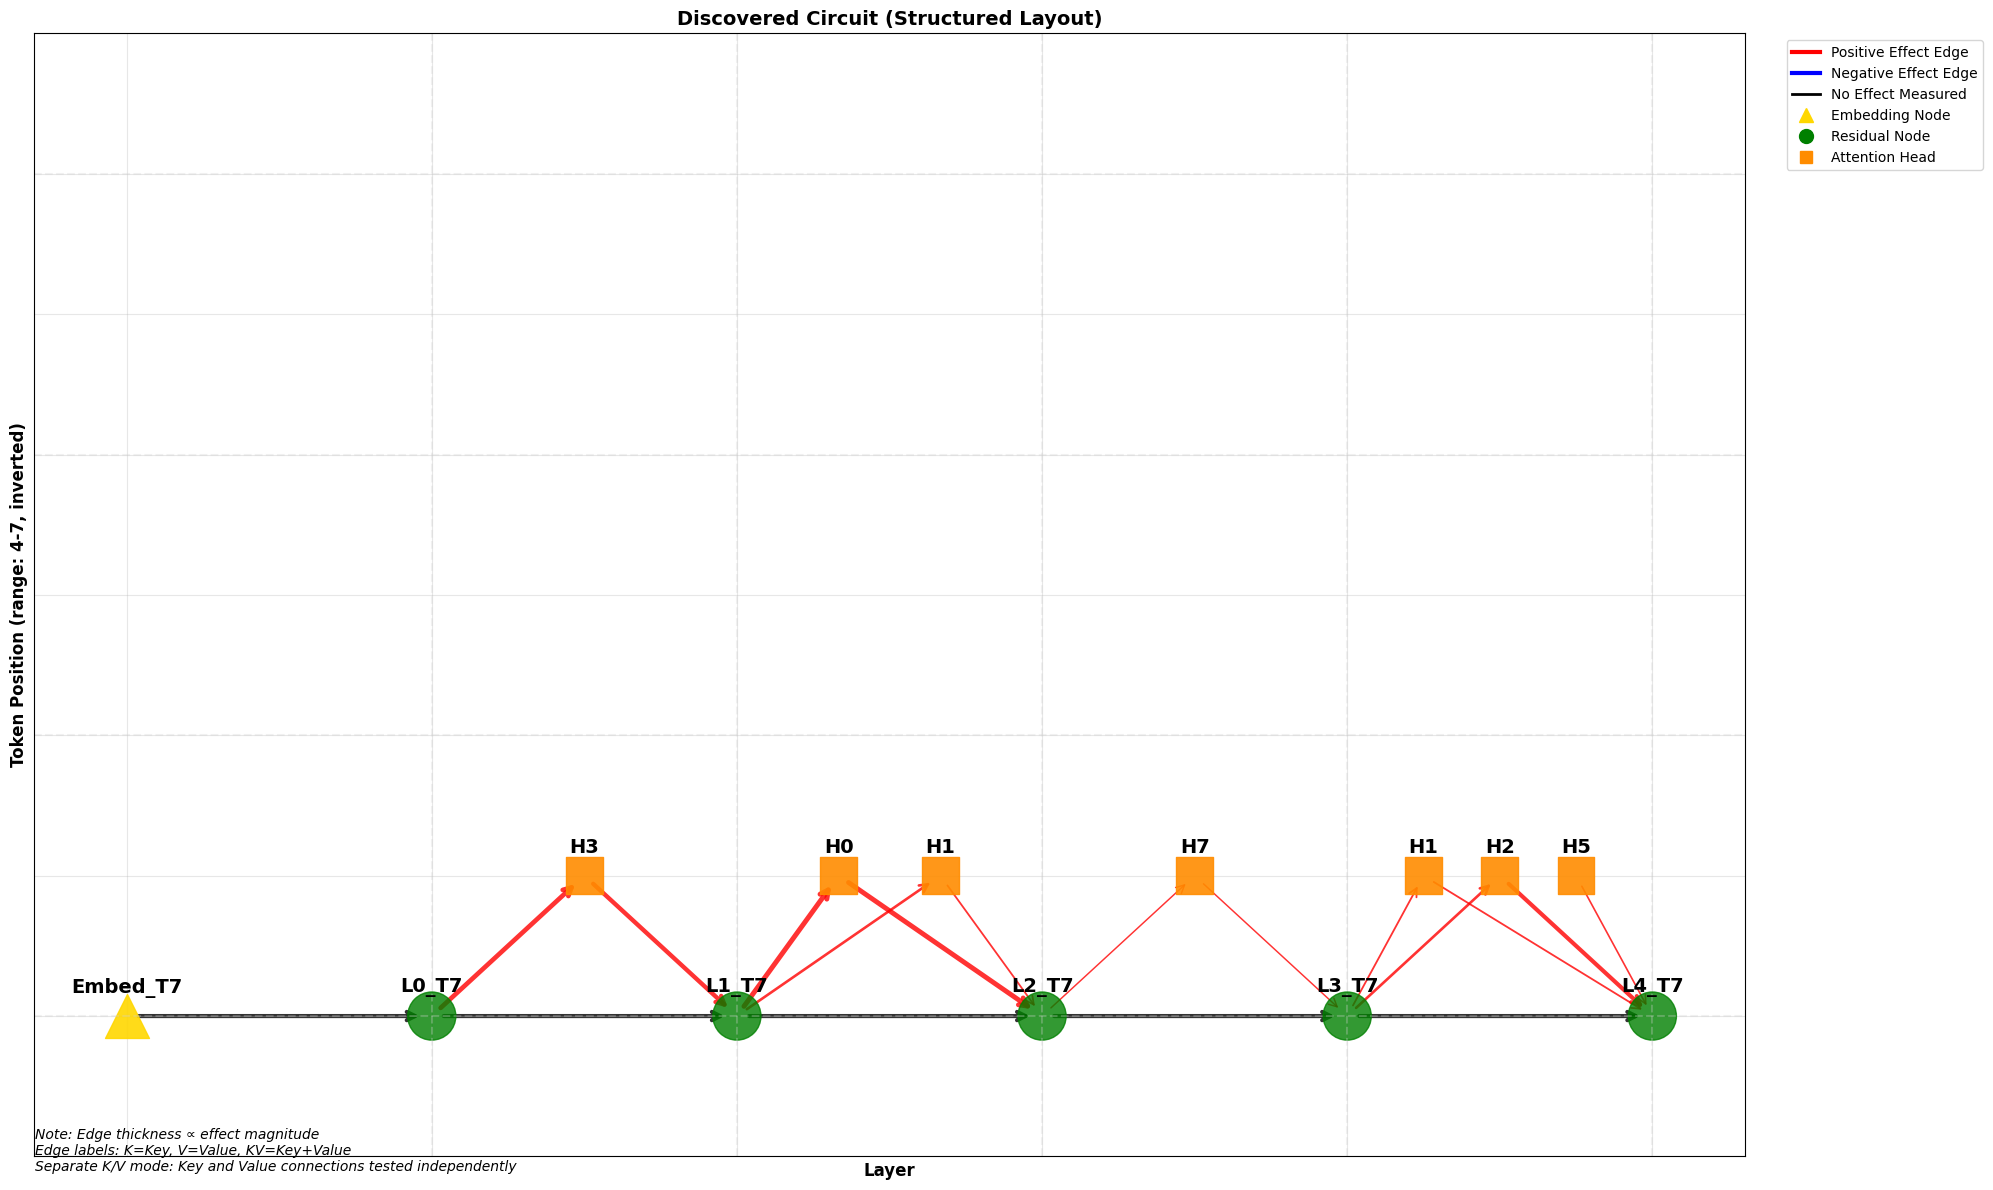

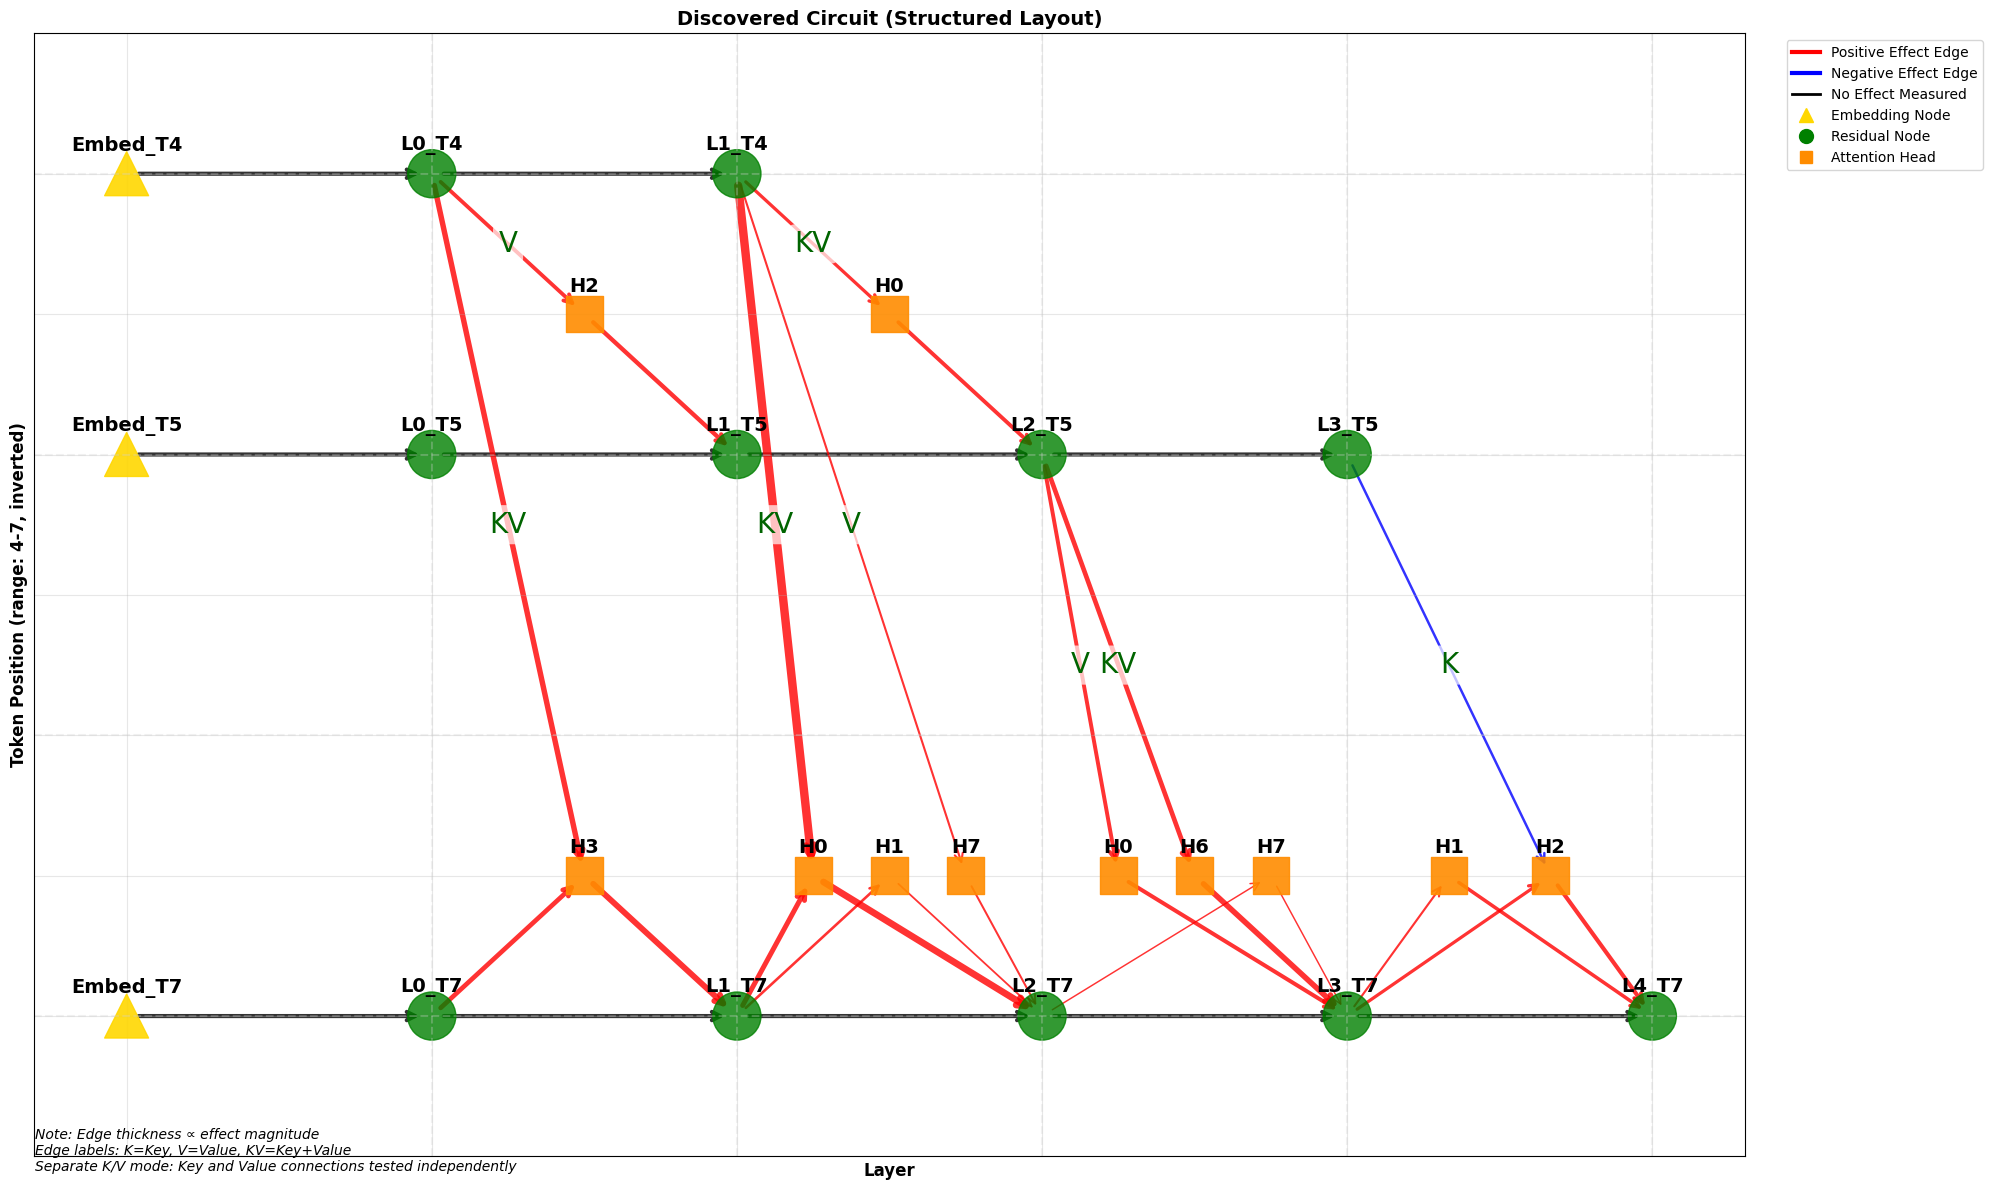


Circuit Summary:
Nodes: 25
Edges: 40

Edges by effect size:
  L1_T4 → L2H0_T7 (value): 0.0393
  L2H0_T7 → L2_T7 (attn_out): 0.0285
  L1H3_T7 → L1_T7 (attn_out): 0.0234
  L3H6_T7 → L3_T7 (attn_out): 0.0218
  L0_T4 → L1H3_T7 (key): 0.0211
  L1_T4 → L2H0_T7 (key): 0.0204
  L1_T7 → L2H0_T7 (query): 0.0185
  L0_T7 → L1H3_T7 (query): 0.0170
  L2_T5 → L3H6_T7 (value): 0.0168
  L1H2_T5 → L1_T5 (attn_out): 0.0153
  L4H2_T7 → L4_T7 (attn_out): 0.0143
  L3H0_T7 → L3_T7 (attn_out): 0.0137
  L2_T5 → L3H0_T7 (value): 0.0132
  L2H0_T5 → L2_T5 (attn_out): 0.0130
  L0_T4 → L1H2_T5 (value): 0.0127
  L4H1_T7 → L4_T7 (attn_out): 0.0114
  L2_T5 → L3H6_T7 (key): 0.0109
  L1_T4 → L2H0_T5 (key): 0.0101
  L3_T7 → L4H2_T7 (query): 0.0100
  L0_T4 → L1H3_T7 (value): 0.0097
  L1_T7 → L2H1_T7 (query): 0.0074
  L1_T4 → L2H0_T5 (value): 0.0069
  L3_T5 → L4H2_T7 (key): -0.0069
  L3_T7 → L4H1_T7 (query): 0.0055
  L1_T4 → L2H7_T7 (value): 0.0054
  L2H7_T7 → L2_T7 (attn_out): 0.0050
  L2H1_T7 → L2_T7 (attn_out): 0.0043


In [40]:
thresholds = [0.005, 0.006, 0.004, 0.003]

merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=max_layer,
    original_text=original_text,
    corrupted_texts=corrupted_texts,
    target_text=target_text,
    thresholds=thresholds,  # Individual thresholds for each
    min_token_pos=min_token_pos,
    corrupt_q=True,
    separate_kv=True,
    quiet=True,
    visualize_individual=True
    # save_individual_paths=[
    #     "circuits/individual_circuit_1.png",
    #     "circuits/individual_circuit_2.png"
    # ]
)

acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=max_layer, threshold=min(thresholds), corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=min_token_pos)

In [ ]:
all_texts = [original_text] + corrupted_texts
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=7,
    k_index=4
)

Computing Q-K dot products for Layer 0, Head 5 (Q@7, K@4):
Q token at position 7: ' day'
K token at position 4: ' call'
--------------------------------------------------------------------------------
'Let's call it a day' -> -14.092974
'Let's take it a day' -> -35.577454
'Let's give it a day' -> 19.124693
'Let's call it a night' -> -6.982931
'Let's call it a week' -> -17.907391
--------------------------------------------------------------------------------


# Rocket Science

In [4]:
original_text = "It's not rocket science"
min_token_pos = 5
# target_text="Let's stop"
target_text="It's not difficult"
print(f"Original text tokens: {gemma_utils.detokenize(model, original_text)}")
print(f"Token at position {min_token_pos}: '{gemma_utils.detokenize(model, original_text)[min_token_pos]}'")

_ = gemma_utils.find_similar_tokens_by_embedding(model, ' rocket', top_k=50)
_ = gemma_utils.find_similar_tokens_by_embedding(model, ' science', top_k=50)

Original text tokens: ['<bos>', 'It', "'", 's', ' not', ' rocket', ' science']
Token at position 5: ' rocket'
Target token: ' rocket' (ID: 33756)
Embedding matrix shape: torch.Size([256000, 2304])
Target embedding shape: torch.Size([2304])

Top 50 tokens most similar to ' rocket':
------------------------------------------------------------
 1. Token ID  33756: ' rocket' (similarity: 1.0000)
 2. Token ID  60810: 'rocket' (similarity: 0.7688)
 3. Token ID  51214: ' Rocket' (similarity: 0.7653)
 4. Token ID  86691: ' rockets' (similarity: 0.7533)
 5. Token ID  68699: 'Rocket' (similarity: 0.7325)
 6. Token ID 169998: '火箭' (similarity: 0.5630)
 7. Token ID 112085: ' Rockets' (similarity: 0.5448)
 8. Token ID  48814: ' missile' (similarity: 0.4828)
 9. Token ID 164332: ' ракет' (similarity: 0.4191)
10. Token ID 119086: ' Missile' (similarity: 0.4187)
11. Token ID  60009: ' missiles' (similarity: 0.4113)
12. Token ID 200164: 'Missile' (similarity: 0.3846)
13. Token ID 140958: ' spaceship' (

Analyzing similarities to target sentence: 'It's not difficult'
Comparing 5 sentences across layers...


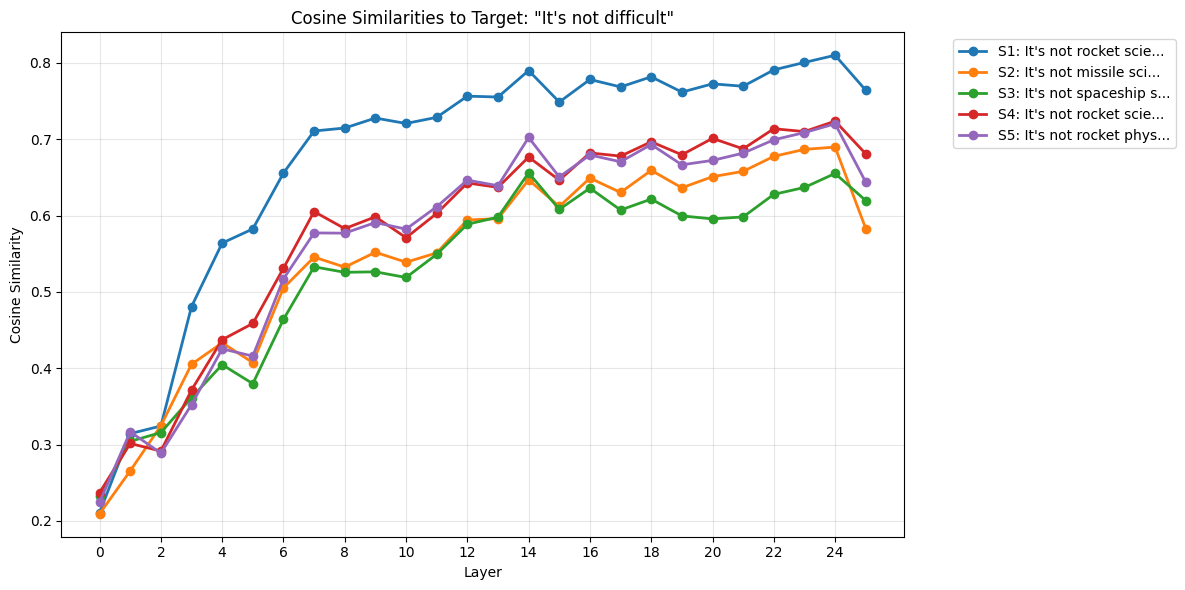

In [5]:
gemma_utils.plot_target_similarities(model,
                                     sentences=["It's not rocket science", "It's not missile science", "It's not spaceship science", "It's not rocket scientist", "It's not rocket physics"],
                                     target_sentence=target_text)

In [6]:
max_layer = 4
corrupted_texts = ["It's not missile science", "It's not spaceship science", "It's not rocket scientist", "It's not rocket physics"]

Threshold Sweep: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]


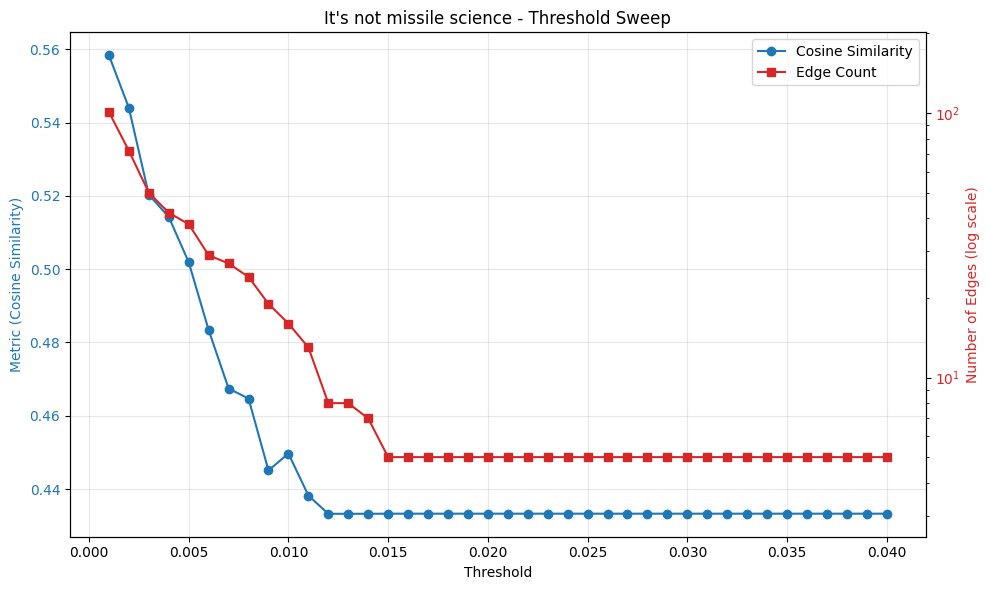

Threshold Sweep: 100%|██████████| 40/40 [02:23<00:00,  3.59s/it]


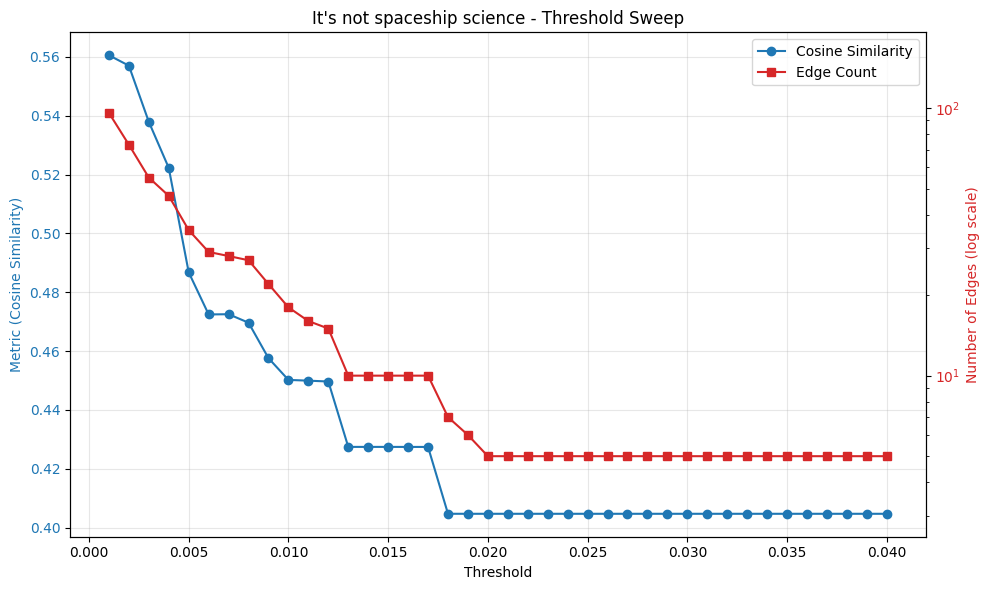

Threshold Sweep: 100%|██████████| 40/40 [01:40<00:00,  2.50s/it]


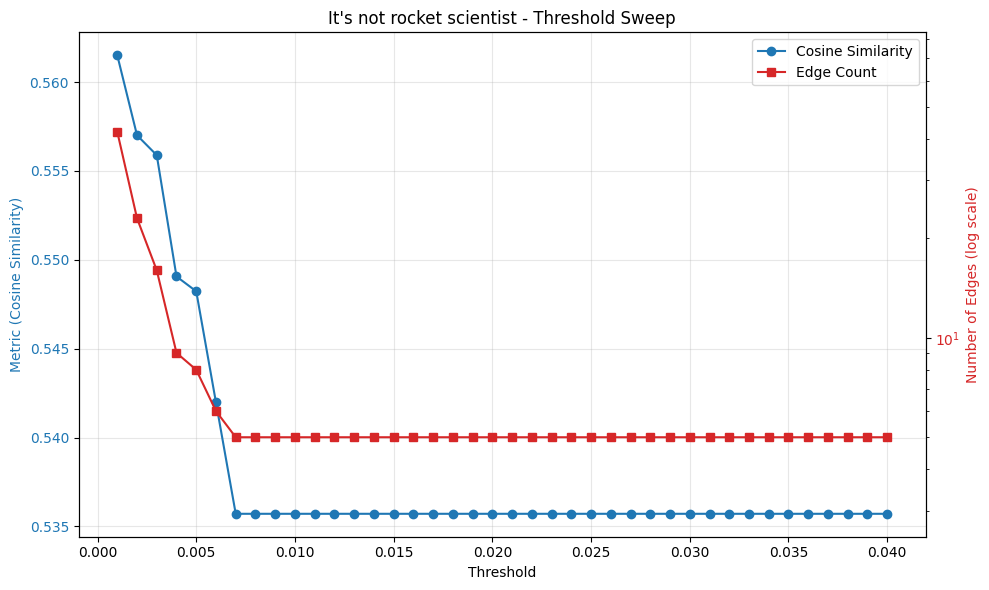

Threshold Sweep: 100%|██████████| 40/40 [01:54<00:00,  2.85s/it]


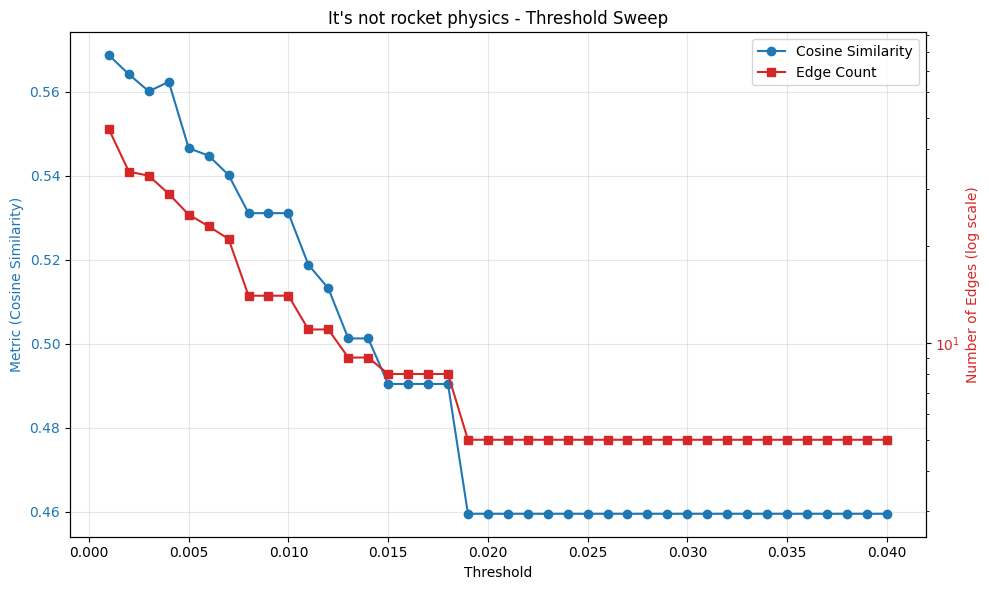

In [45]:
_ = simple_acdc.multi_corrupted_threshold_sweep(model, max_layer=max_layer,
                                      original_text=original_text,
                                      corrupted_texts=corrupted_texts,
                                      target_text=target_text,
                                      min_token_pos=min_token_pos,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

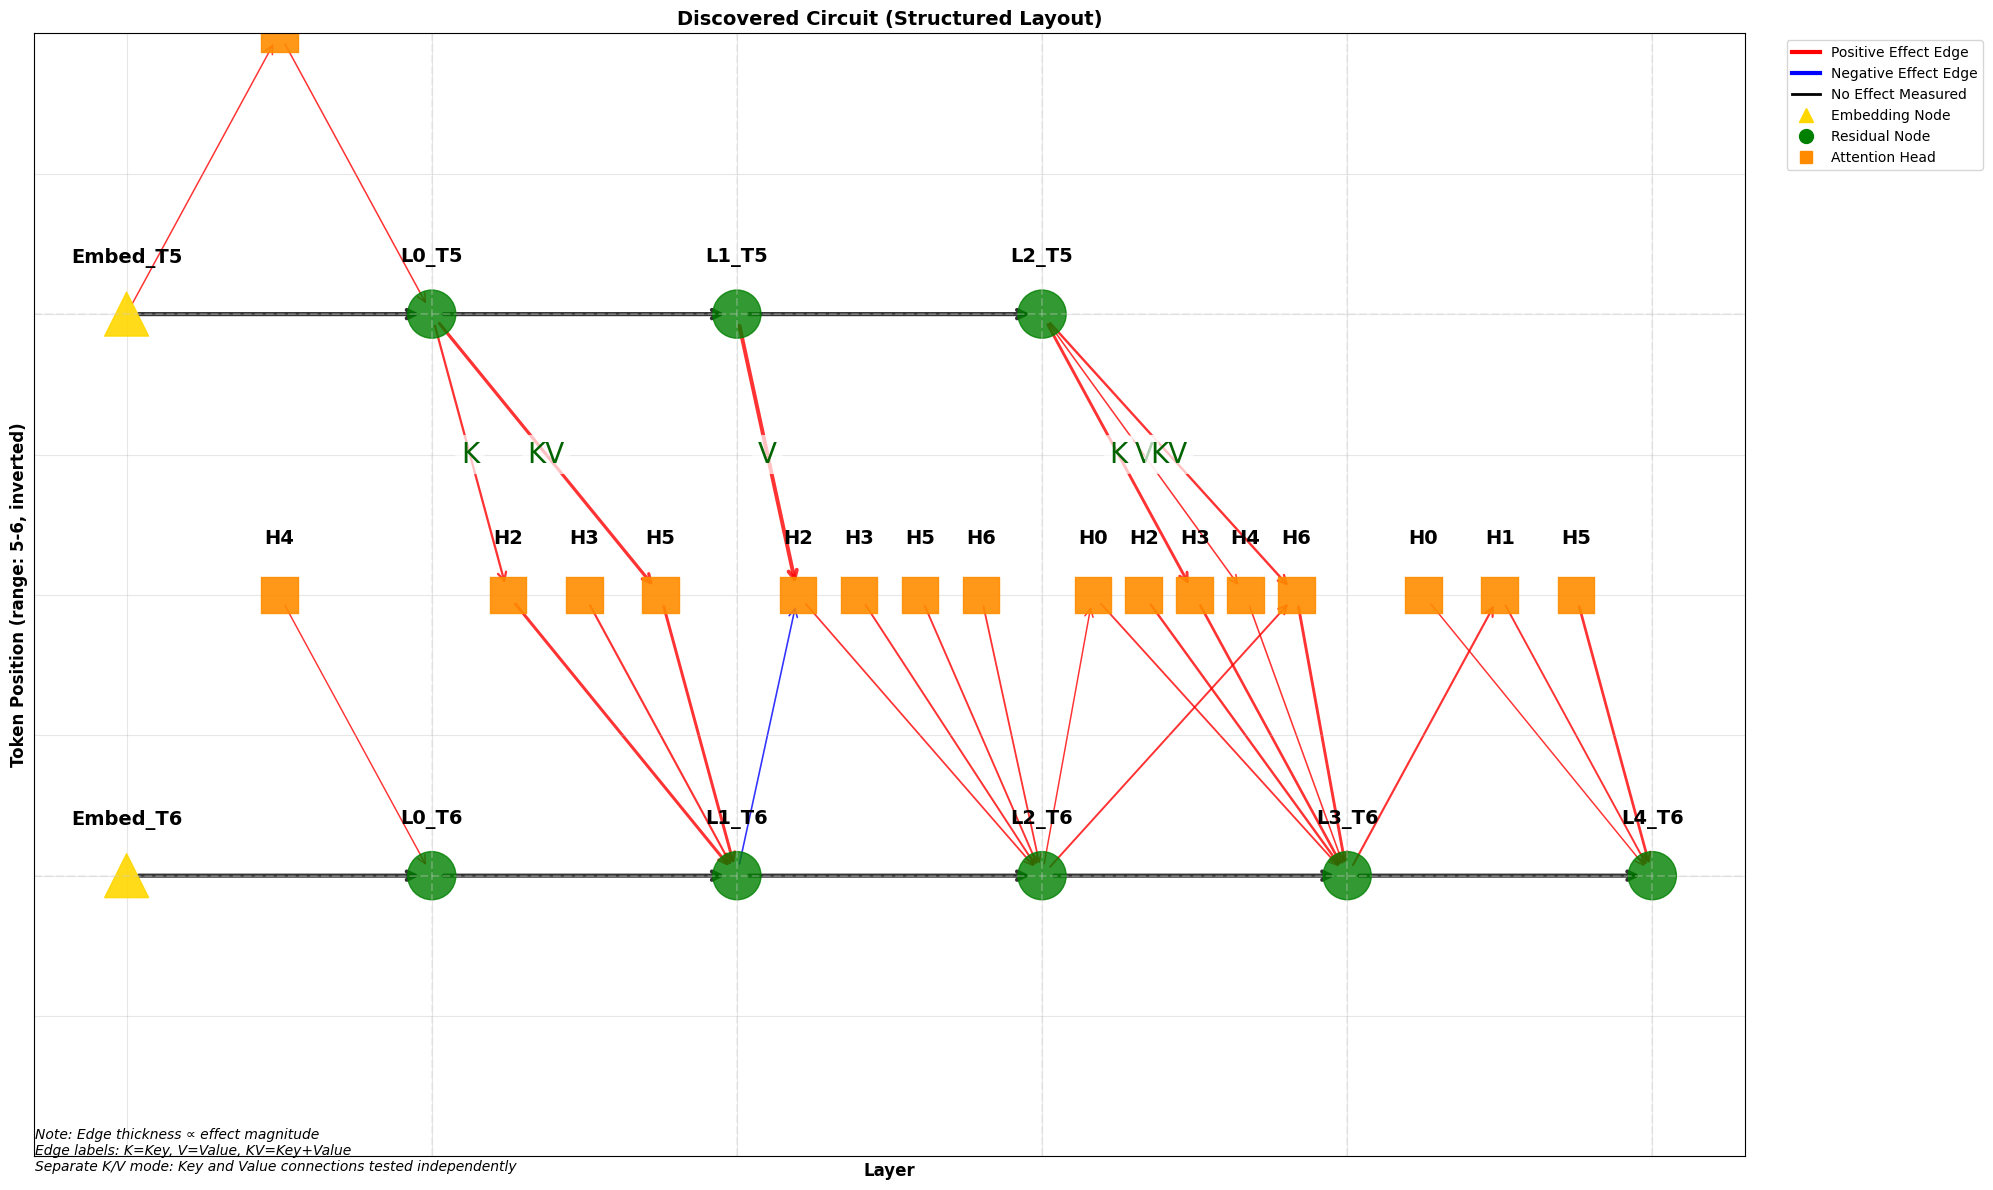

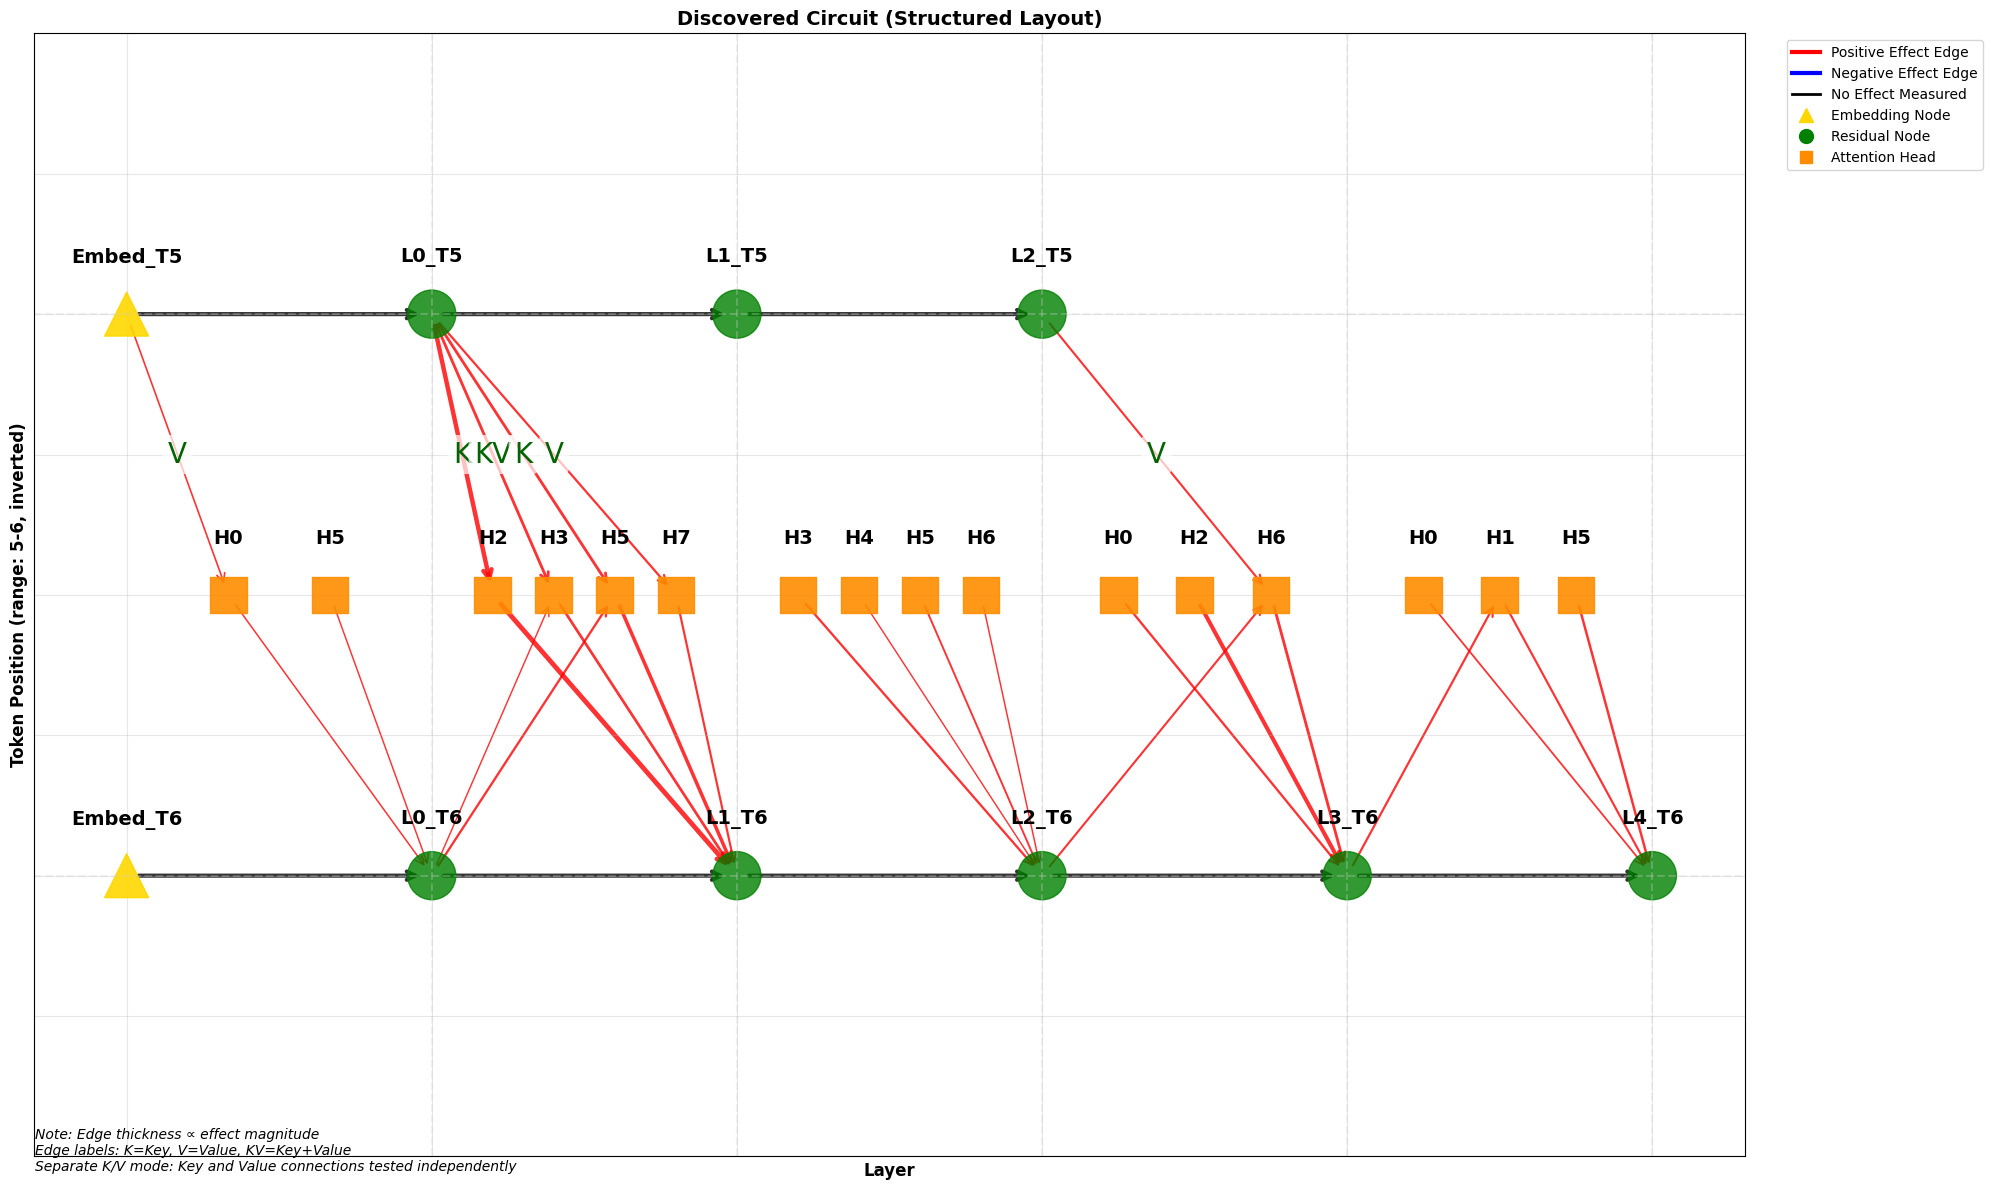

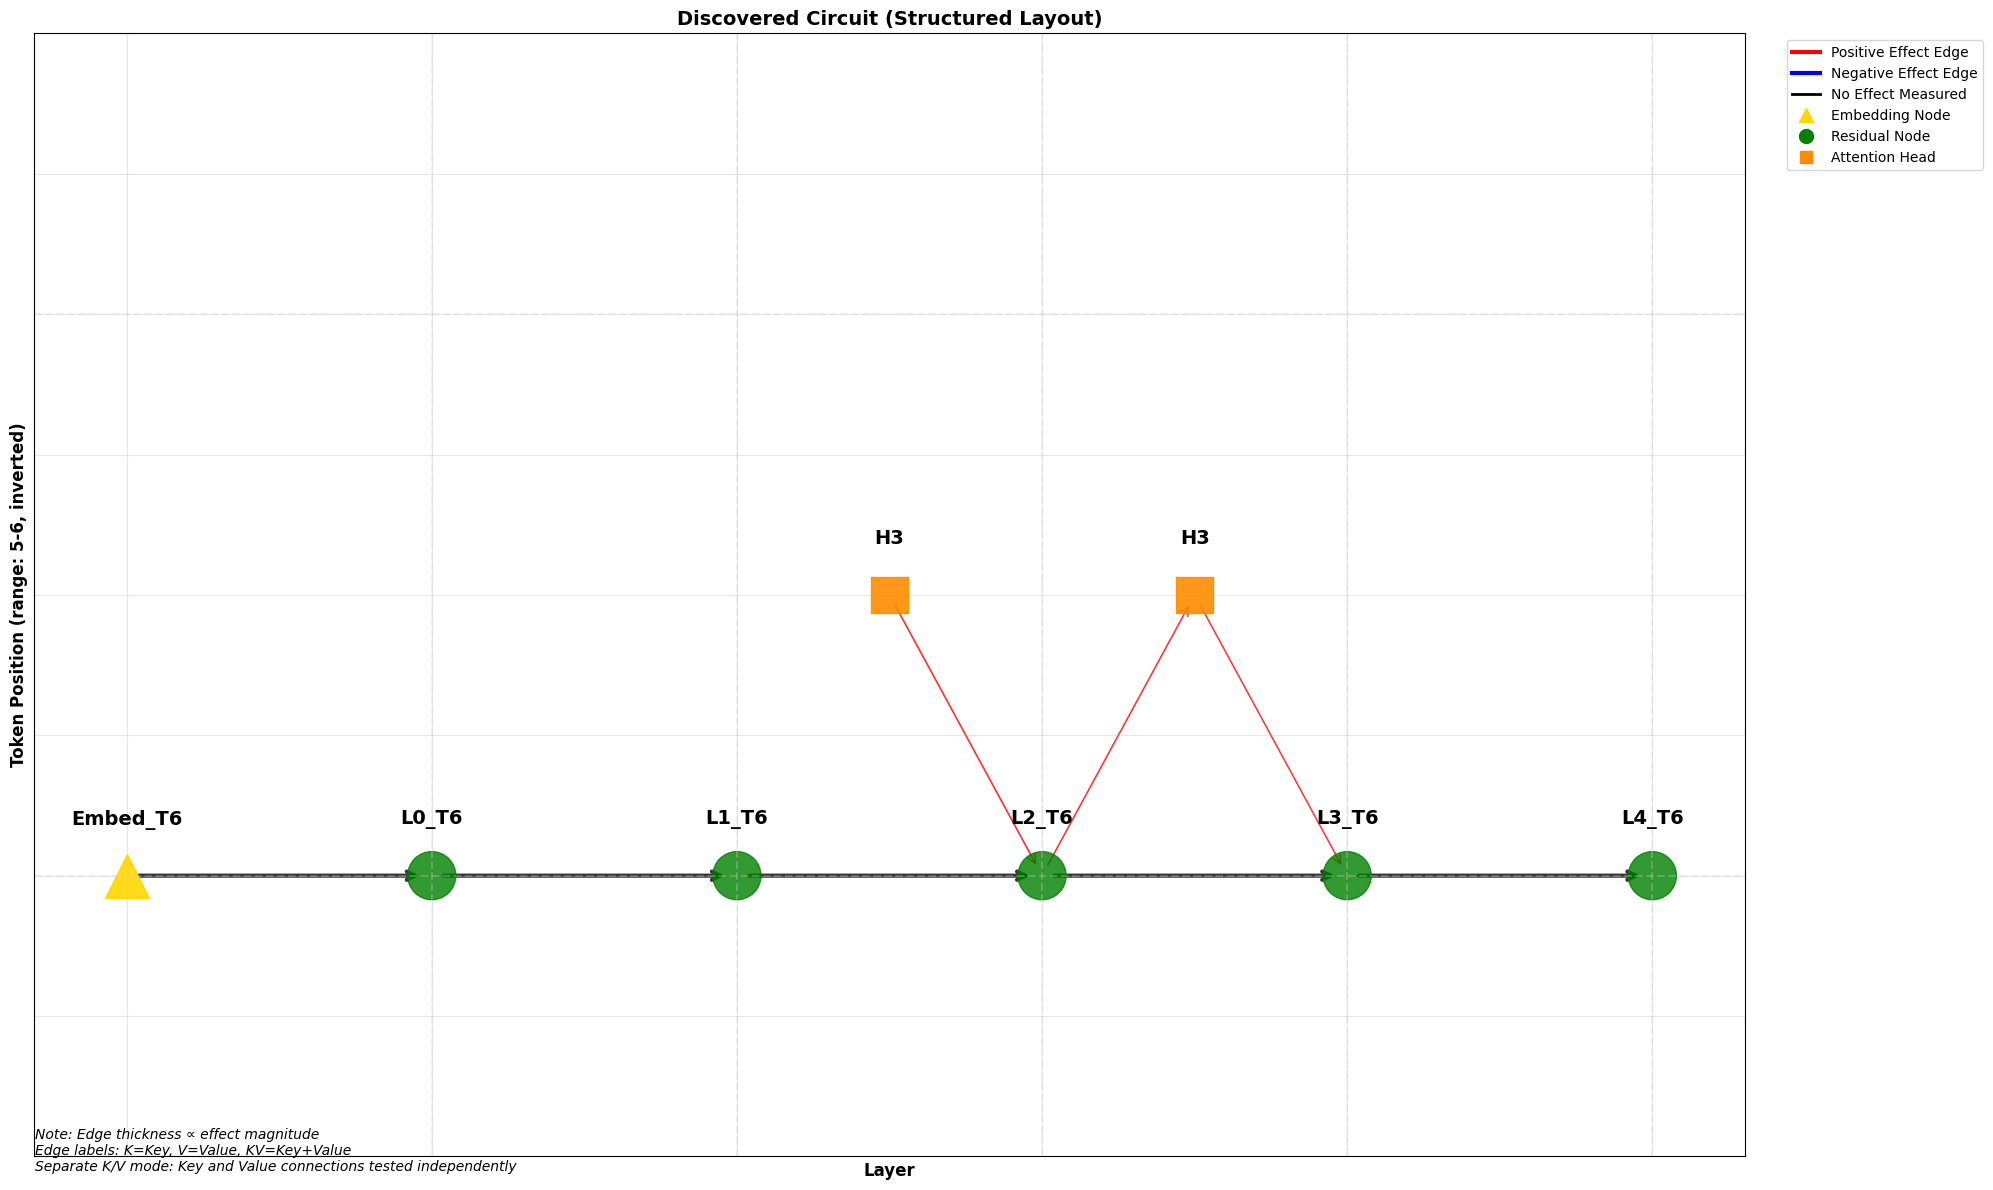

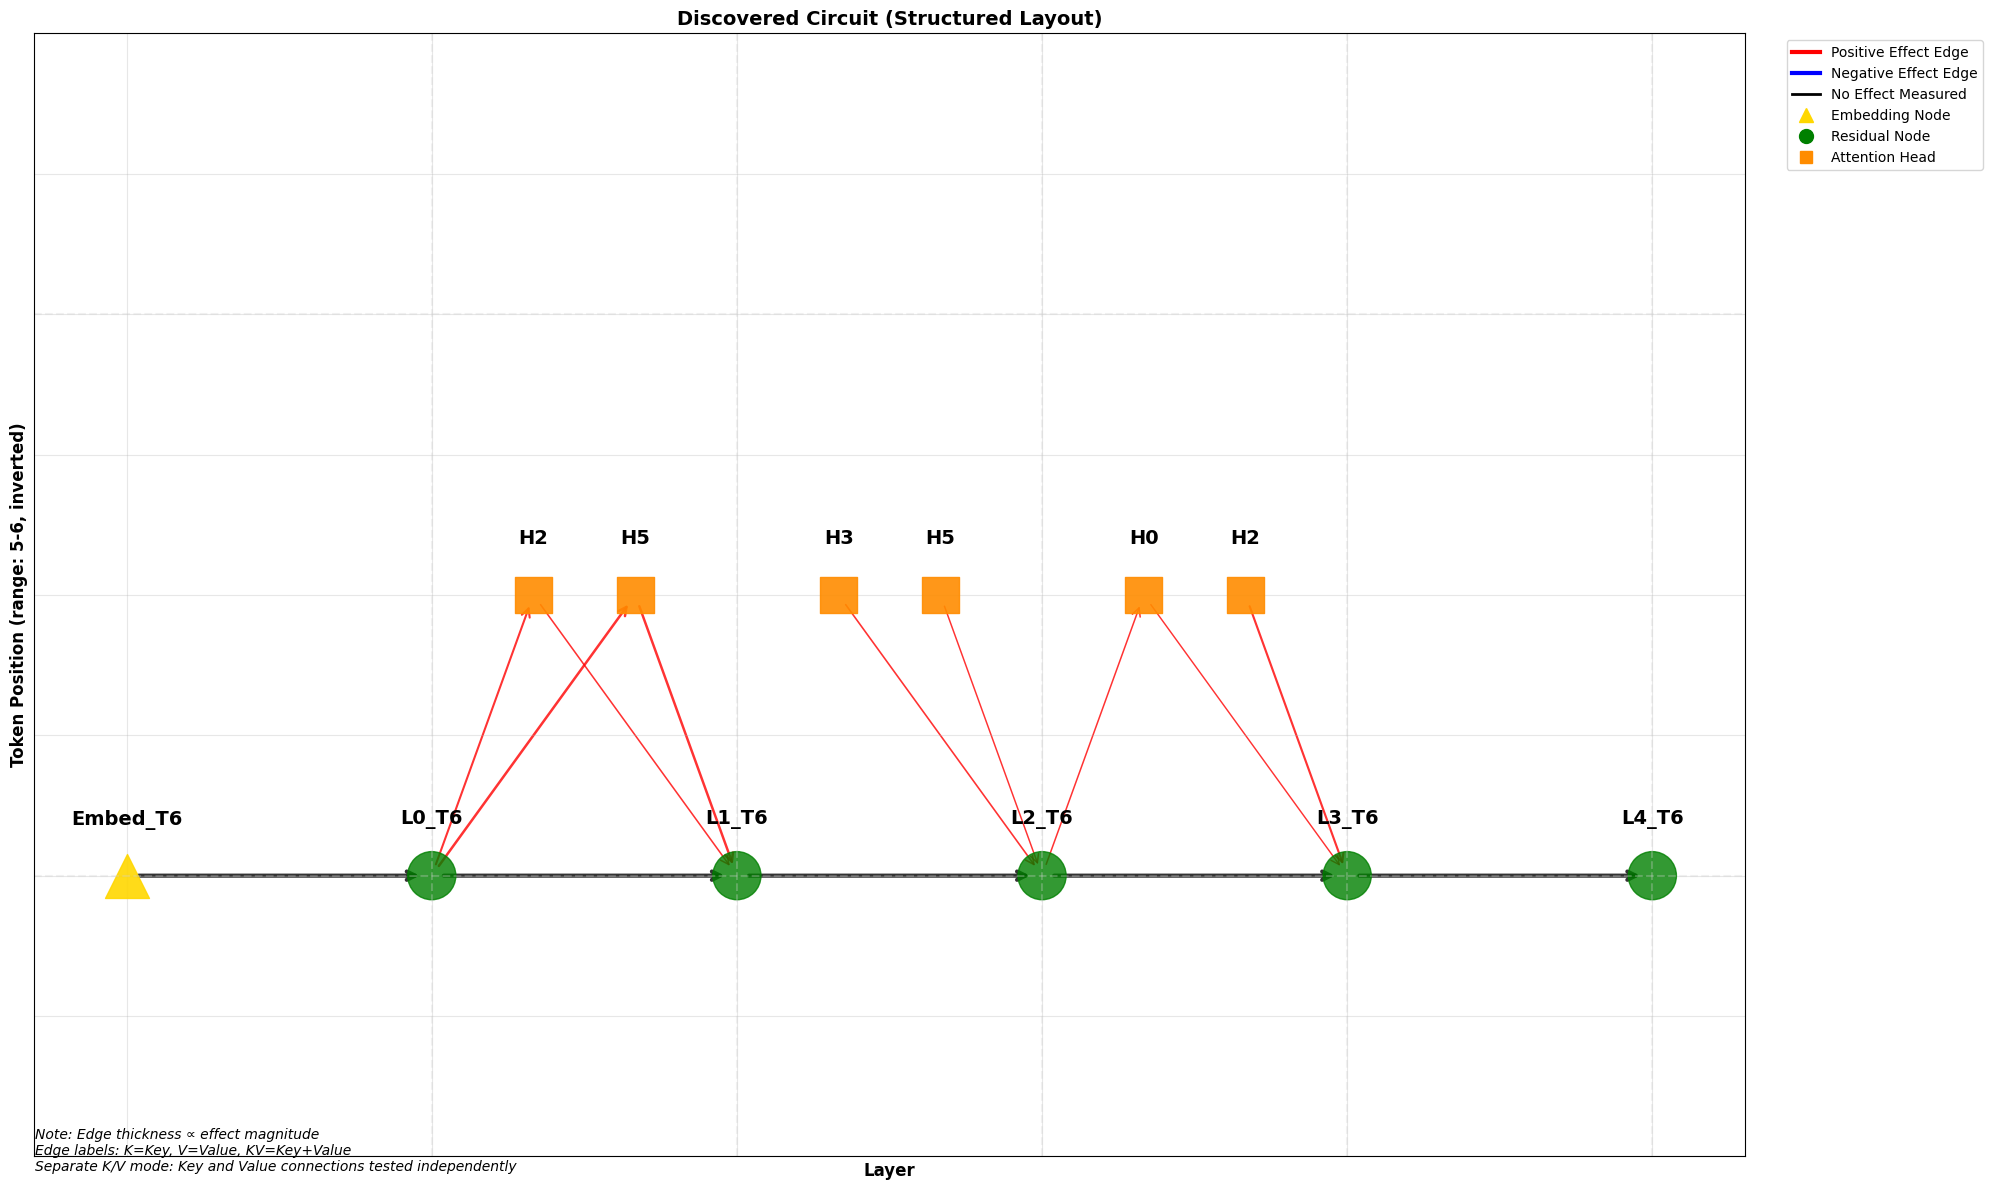

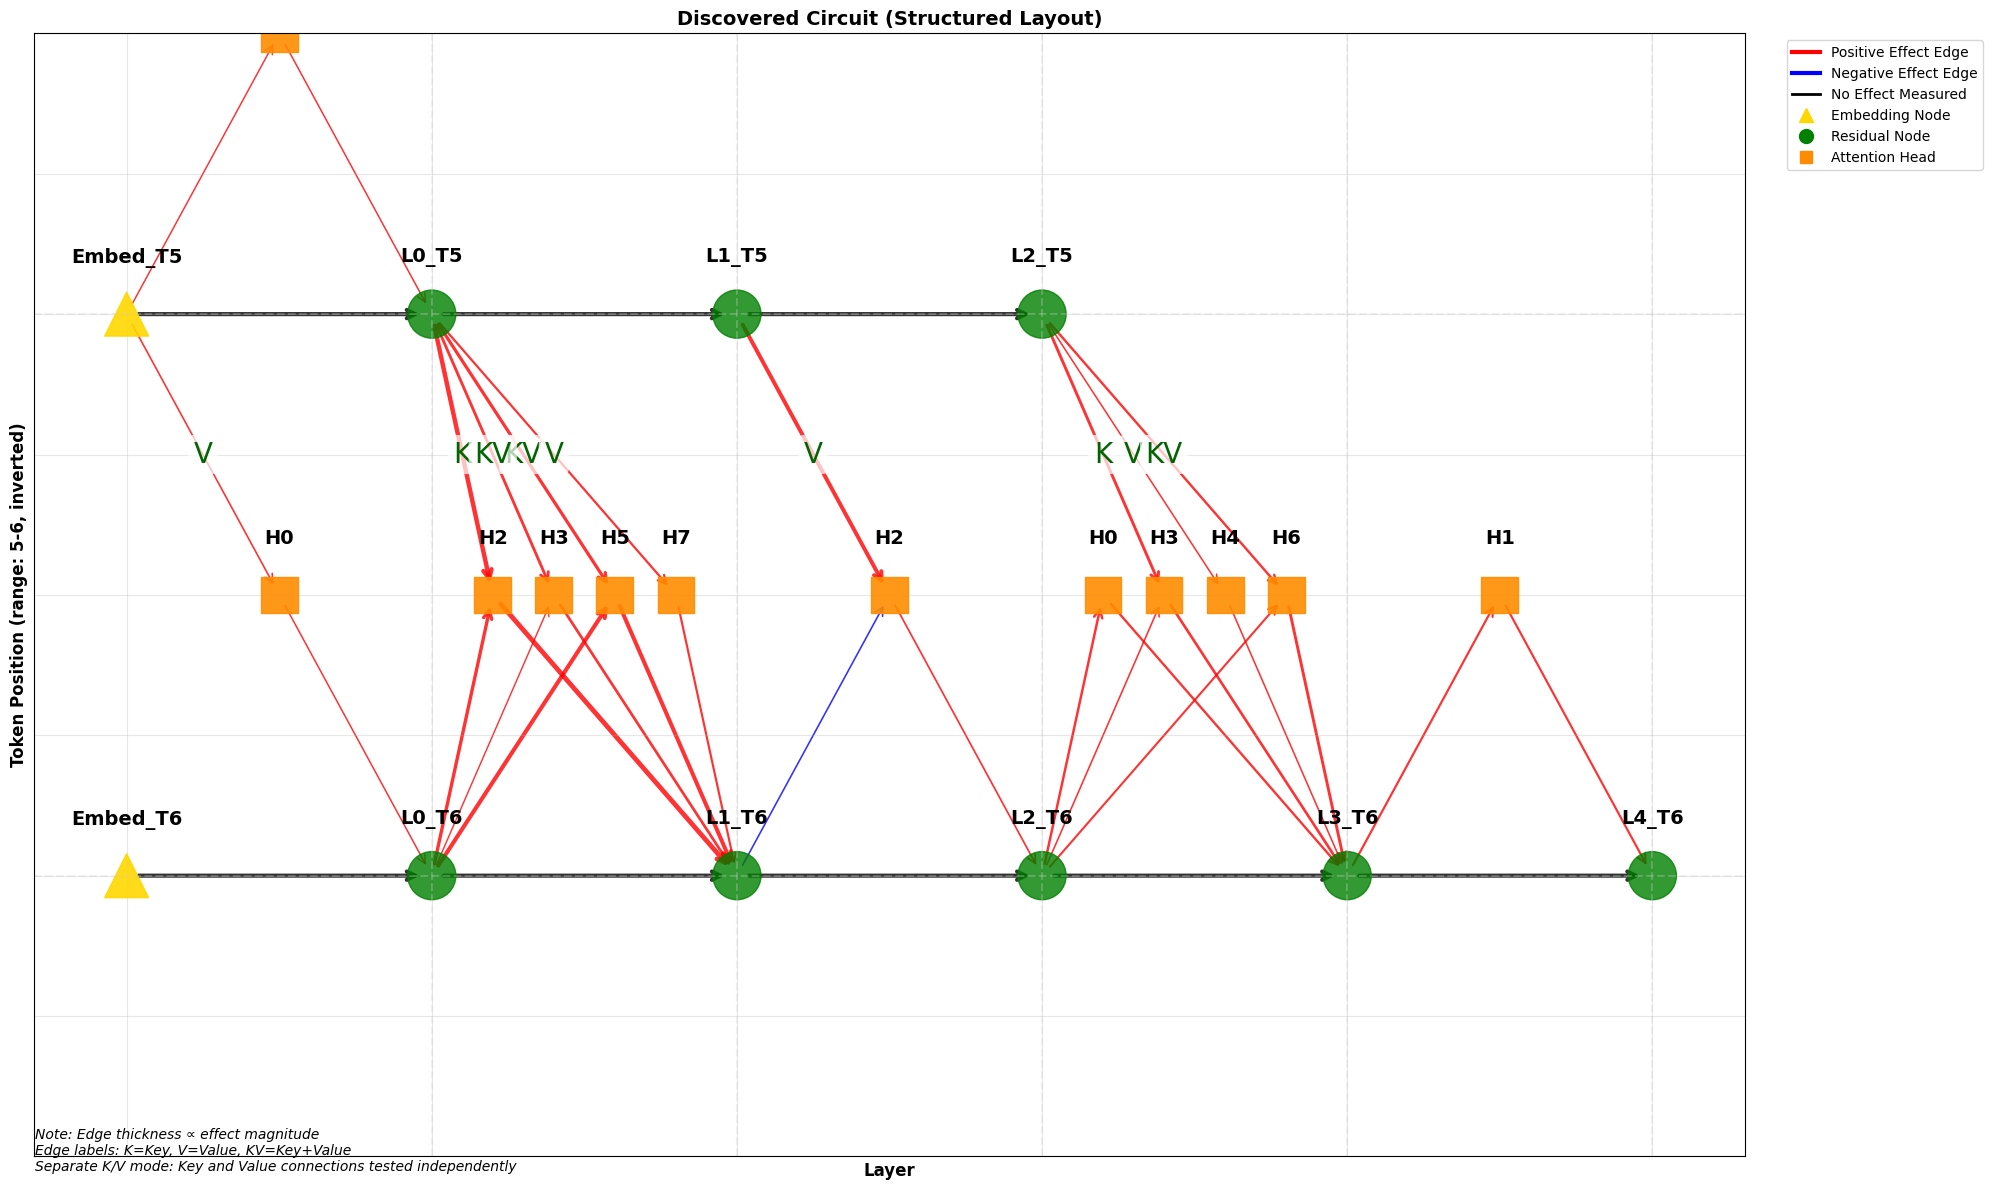


Circuit Summary:
Nodes: 22
Edges: 41

Edges by effect size:
  L1H2_T6 → L1_T6 (attn_out): 0.0293
  L0_T5 → L1H2_T6 (key): 0.0264
  L0_T6 → L1H5_T6 (query): 0.0234
  L1H5_T6 → L1_T6 (attn_out): 0.0229
  L1_T5 → L2H2_T6 (value): 0.0222
  L0_T6 → L1H2_T6 (query): 0.0177
  L0_T5 → L1H5_T6 (key): 0.0166
  L3H6_T6 → L3_T6 (attn_out): 0.0144
  L2_T5 → L3H3_T6 (key): 0.0144
  L0_T5 → L1H3_T6 (value): 0.0139
  L1H3_T6 → L1_T6 (attn_out): 0.0130
  L3H3_T6 → L3_T6 (attn_out): 0.0126
  L2_T6 → L3H0_T6 (query): 0.0115
  L2_T5 → L3H6_T6 (value): 0.0109
  L3H0_T6 → L3_T6 (attn_out): 0.0106
  L0_T5 → L1H7_T6 (value): 0.0099
  L3_T6 → L4H1_T6 (query): 0.0097
  L1H7_T6 → L1_T6 (attn_out): 0.0096
  L4H1_T6 → L4_T6 (attn_out): 0.0095
  L2_T6 → L3H6_T6 (query): 0.0090
  L2_T5 → L3H6_T6 (key): 0.0074
  L0_T5 → L1H5_T6 (value): 0.0070
  L2H2_T6 → L2_T6 (attn_out): 0.0069
  L0_T5 → L1H3_T6 (key): 0.0064
  Embed_T5 → L0H0_T6 (value): 0.0064
  L1_T6 → L2H2_T6 (query): -0.0063
  L2_T6 → L3H3_T6 (query): 0.0062


In [7]:
thresholds = [0.005, 0.005, 0.005, 0.010]

merged_circuit, individual_circuits, metrics = simple_acdc.build_and_merge_circuits(
    model=model,
    max_layer=max_layer,
    original_text=original_text,
    corrupted_texts=corrupted_texts,
    target_text=target_text,
    thresholds=thresholds,  # Individual thresholds for each
    min_token_pos=min_token_pos,
    corrupt_q=True,
    separate_kv=True,
    quiet=True,
    visualize_individual=True
    # save_individual_paths=[
    #     "circuits/individual_circuit_1.png",
    #     "circuits/individual_circuit_2.png"
    # ]
)

acdc_visualizer = simple_acdc.SimpleACDC(model, max_layer=max_layer, threshold=min(thresholds), corrupt_q=True, separate_kv=True)
acdc_visualizer.visualize_circuit(merged_circuit, 
                                #  save_path="circuits/merged_circuit.png",
                                 min_token_pos=min_token_pos)

In [ ]:
all_texts = [original_text] + corrupted_texts
dot_products = simple_acdc.compute_qk_dot_products(
    model=model,
    texts=all_texts,
    layer=0,
    head_idx=5,
    q_index=7,
    k_index=4
)

Computing Q-K dot products for Layer 0, Head 5 (Q@7, K@4):
Q token at position 7: ' day'
K token at position 4: ' call'
--------------------------------------------------------------------------------
'Let's call it a day' -> -14.092974
'Let's take it a day' -> -35.577454
'Let's give it a day' -> 19.124693
'Let's call it a night' -> -6.982931
'Let's call it a week' -> -17.907391
--------------------------------------------------------------------------------
